In [1]:
import numpy as np			
import numpy.linalg as la		
import matplotlib as mp			
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Case 1: Considering h = 0

In [2]:
Nsites = 50
Nprime = 2*Nsites        
e_threshold = 1E-6	 

params_1 = {
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : np.zeros(Nsites)
}

In [3]:
def HOBC(Nsites, params):
    Nprime = 2*Nsites
    Hmat = np.zeros([Nprime,Nprime])		# Declare a 2Nx2N matrix
    Jx = params['J_x'] 
    Jy = params['J_y']
    h = params['h']

    for n in range(Nsites-1):
        Hmat[2*n,2*n+3]   = -(n%2)*Jy[int((n-1)/2)]
        Hmat[2*n+3,2*n]   = (n%2)*Jy[int((n-1)/2)]
        Hmat[2*n+1,2*n+2] = Jx[n]
        Hmat[2*n+2,2*n+1] = -Jx[n]
        
        Hmat[2*n,2*n+1]   = h[n]
        Hmat[2*n+1,2*n]   = -h[n]
    Hmat[2*(Nsites-1),2*(Nsites-1)+1] = h[Nsites-1]
    Hmat[2*(Nsites-1)+1,2*(Nsites-1)] = -h[Nsites-1]
    
    Hmat = 1j*Hmat

    return Hmat

In [4]:
Hmat_1 = HOBC(Nsites,params_1)
# Hmat_1

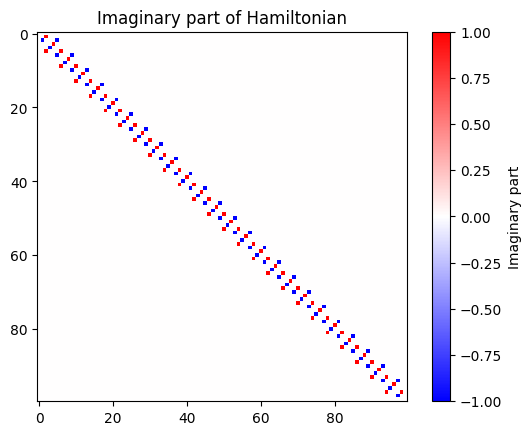

In [5]:
def visualise_mat(Hmat):
    plt.imshow(np.imag(Hmat), cmap='bwr')
    plt.colorbar(label='Imaginary part')
    plt.title('Imaginary part of Hamiltonian')
    plt.show()

visualise_mat(Hmat_1)

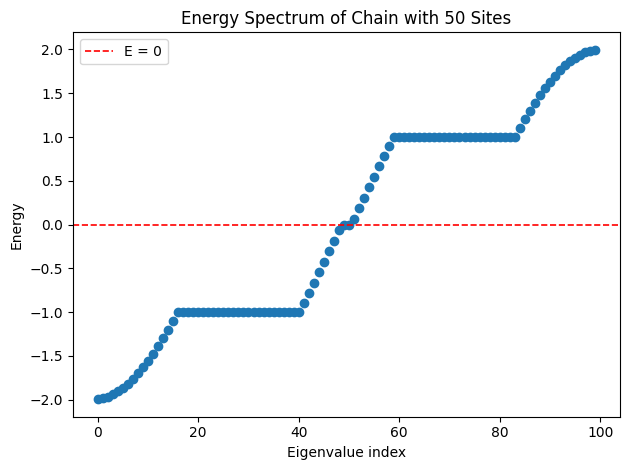

In [6]:
def plot_spectrum(Hmat):
    evals,evecs = la.eigh(Hmat)
    evals = evals.real
    plt.scatter(np.arange(len(evals)),evals)
    plt.axhline(y=0, color='r', linestyle='--', linewidth=1.2, label='E = 0')
    plt.title('Energy Spectrum of Chain with {} Sites'.format(Nsites))
    plt.xlabel('Eigenvalue index')
    # plt.xlim(55,65)
    plt.ylabel('Energy')
    # plt.ylim(-0.02,0.02)
    plt.legend()
    plt.tight_layout()
    plt.show()

plot_spectrum(Hmat_1)

In [7]:
evals_1,evecs_1 = la.eigh(Hmat_1)
evals_1 = evals_1.real
def check_zeromodes(evals, e_threshold):
    zmodes_ind = np.where(abs(evals) <= e_threshold)[0]
    return zmodes_ind,len(zmodes_ind)

check_zeromodes(evals_1,e_threshold)

(array([49, 50]), 2)

In [8]:
zmodes_ind_1 = np.where(abs(evals_1) <= e_threshold)[0]
vec0_1 = evecs_1[:,zmodes_ind_1[0]]
vec1_1 = evecs_1[:,zmodes_ind_1[1]]

<>:14: SyntaxWarning: invalid escape sequence '\p'
<>:14: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\1506915913.py:14: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$\psi$',fontsize=20)
C:\Users\gupt1\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1719: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
C:\Users\gupt1\AppData\Roaming\Python\Python312\site-packages\matplotlib\cbook.py:1355: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


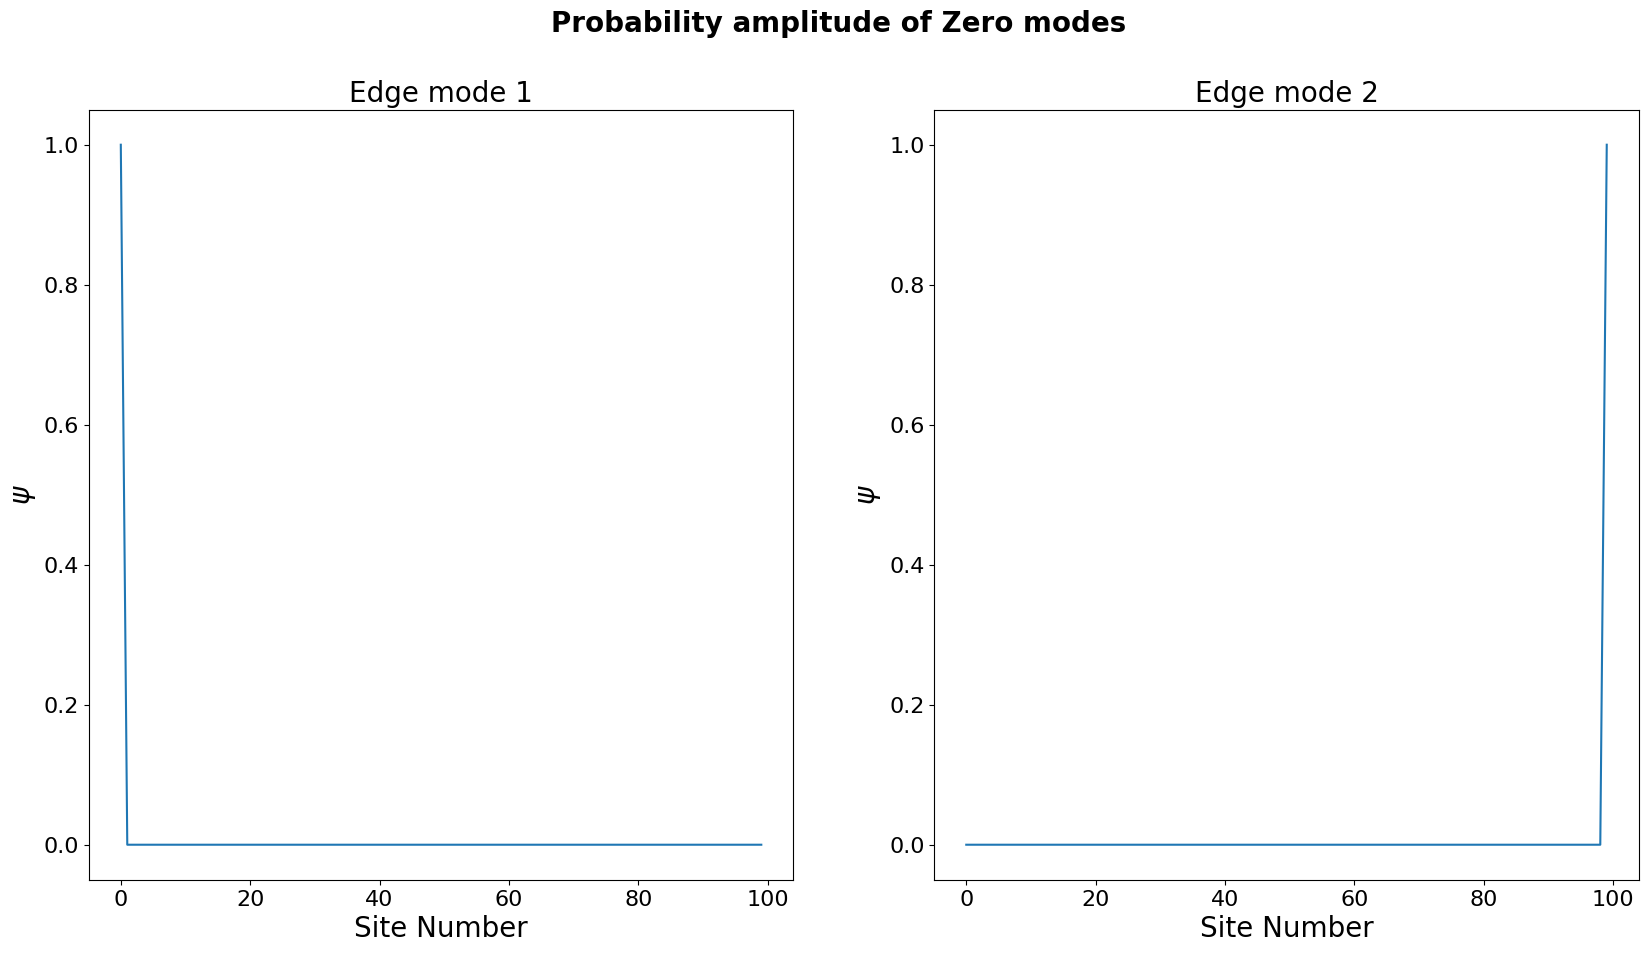

In [9]:
def plot_zeromodes(evals,evecs,params, e_threshold):
    # param_info = f'$h=%.2f$' % (params['h'])

    zmodes_ind,cnt_zmodes = check_zeromodes(evals, e_threshold)
    if cnt_zmodes > 0:
        fig,ax = plt.subplots(1,cnt_zmodes,figsize=(20, 10))
        fig.suptitle('Probability amplitude of Zero modes',fontsize=20, fontweight='bold')
        for cnt in range(cnt_zmodes):
            ax1 = ax[cnt]
            # ax1.plot(np.abs(evecs[:,zmodes_ind[cnt]])**2)
            ax1.plot(evecs[:,zmodes_ind[cnt]])
            ax1.set_title('Edge mode {}'.format(cnt+1),fontsize=20)
            ax1.set_xlabel('Site Number',fontsize=20)
            ax1.set_ylabel('$\psi$',fontsize=20)
            # ax1.text(0.43, 0.95, param_info, transform=ax1.transAxes, fontsize=16,
            # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
            ax1.tick_params(axis='both', which='major', labelsize=16)
        plt.show()

plot_zeromodes(evals_1,evecs_1,params_1,e_threshold)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\458474616.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


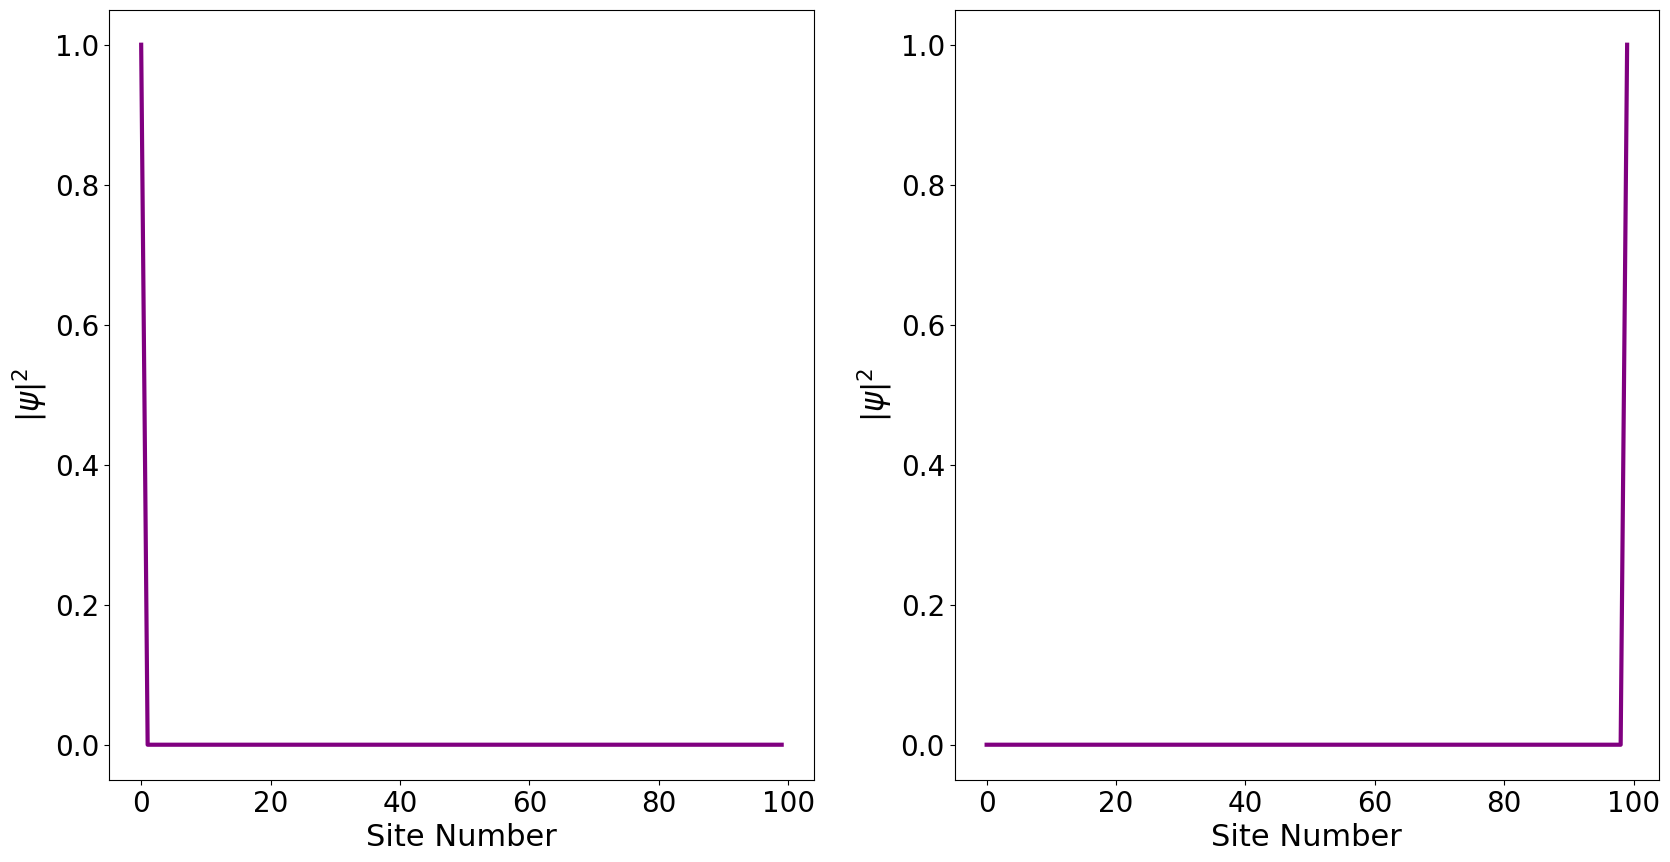

In [10]:
zmodes_ind_1,cnt_zmodes_1 = check_zeromodes(evals_1, e_threshold)
if cnt_zmodes_1 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_1,figsize=(20, 10))
    for cnt in range(cnt_zmodes_1):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_1[:,zmodes_ind_1[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)
    plt.show()

### Considering how energy eigenvalues changes with magnetic field h

In [11]:
def some_ham(Nsites,params):
    Nprime = 2*Nsites
    Hmat = np.zeros([Nprime,Nprime])		# Declare a 2Nx2N matrix
    Jx = params['J_x'] 
    Jy = params['J_y']
    h = np.ones(Nsites)*params['h']
    
    for n in range(Nsites-1):
        Hmat[2*n,2*n+3]   = -(n%2)*Jy
        Hmat[2*n+3,2*n]   = (n%2)*Jy
        Hmat[2*n+1,2*n+2] = Jx
        Hmat[2*n+2,2*n+1] = -Jx
        
        Hmat[2*n,2*n+1]   = -h[n]
        Hmat[2*n+1,2*n]   = h[n]
    Hmat[2*(Nsites-1),2*(Nsites-1)+1] = -h[Nsites-1]
    Hmat[2*(Nsites-1)+1,2*(Nsites-1)] = h[Nsites-1]
    
    Hmat = 1j*Hmat

    return Hmat

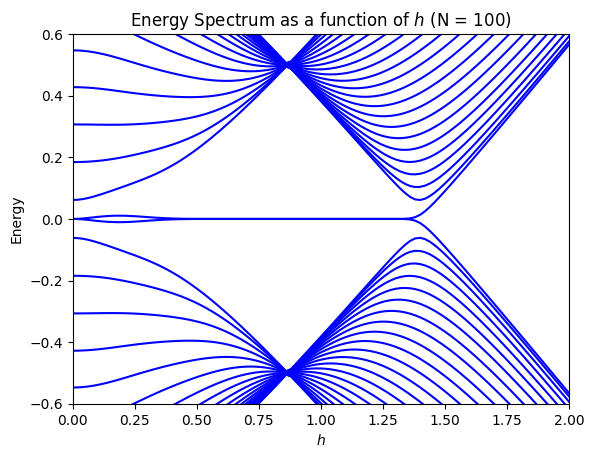

In [12]:
var_h = np.linspace(0.0,2.0,101)
var_energy = np.zeros([len(var_h),Nprime])

for i in range(len(var_h)):
    var_energy[i] = la.eigh(some_ham(Nsites,params = {'J_x' : 1.0,'J_y' : 1.0,'h' : var_h[i]}))[0]    # Nearest neighbor hopping


plt.title("Energy Spectrum as a function of $h$ (N = 100)")
for i in range(Nprime):
    plt.plot(var_h,var_energy[:,i], color = 'blue')
plt.xlim(np.min(var_h),np.max(var_h))
plt.ylim(-0.6,0.6)
plt.ylabel('Energy')
plt.xlabel('$h$')
# plt.vlines(0.865,-0.6,0.6,linestyles='dashed',color='r')
plt.show()

### Considering how energy eigenvalues changes for differnt $J_x = J_y = J$

In [13]:
J_values_1 = np.linspace(0, 2, 100)   # Jx = Jy = J

In [14]:
def HOBC_equal_J_1(Nsites, J, h):
    Nprime = 2 * Nsites
    Hmat = np.zeros((Nprime, Nprime), dtype=complex)

    for n in range(Nsites - 1):
        Hmat[2*n, 2*n+3]   = -(n % 2) * J
        Hmat[2*n+3, 2*n]   =  (n % 2) * J
        Hmat[2*n+1, 2*n+2] =  J
        Hmat[2*n+2, 2*n+1] = -J
        Hmat[2*n, 2*n+1]   = -h[n]
        Hmat[2*n+1, 2*n]   =  h[n]

    Hmat[2*(Nsites-1), 2*(Nsites-1)+1] = -h[Nsites-1]
    Hmat[2*(Nsites-1)+1, 2*(Nsites-1)] =  h[Nsites-1]

    return 1j * Hmat

In [15]:
h_1 = np.zeros(Nsites)

eigvals_all_1 = []

for J in J_values_1:
    Hmat_equal_J_1 = HOBC_equal_J_1(Nsites, J, h_1)
    evals_equal_J_1, _ = np.linalg.eigh(Hmat_equal_J_1)
    eigvals_all_1.append(evals_equal_J_1)


In [16]:
eigvals_all_1 = np.array(eigvals_all_1)  # shape (100, 2*Nsites)

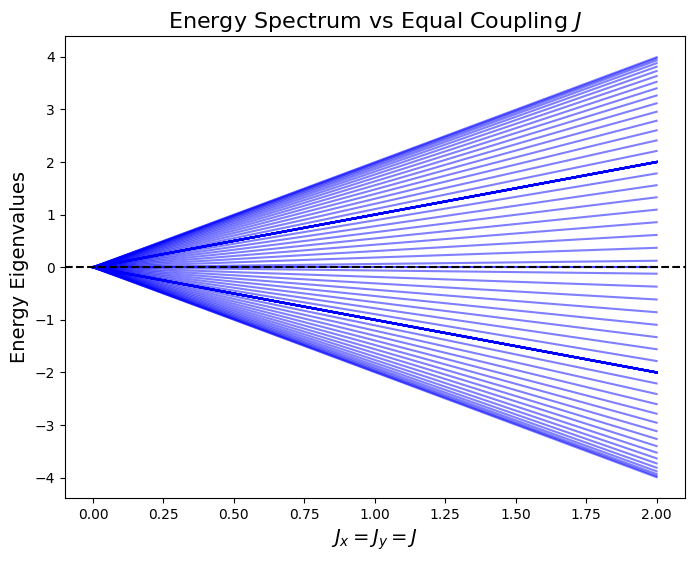

In [17]:
plt.figure(figsize=(8,6))
for n in range(eigvals_all_1.shape[1]):
    plt.plot(J_values_1, eigvals_all_1[:, n], color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('$J_x = J_y = J$', fontsize=14)
plt.ylabel('Energy Eigenvalues', fontsize=14)
plt.title('Energy Spectrum vs Equal Coupling $J$', fontsize=16)
plt.show()


### Considering how energy eigenvalues changes for differnt $J_x$ and $J_y$

In [18]:
def HOBC_diff_J_1(Nsites, Jx, Jy, h):
    Nprime = 2 * Nsites
    Hmat = np.zeros((Nprime, Nprime), dtype=complex)

    for n in range(Nsites - 1):
        Hmat[2*n, 2*n+3]   = -(n % 2) * Jy
        Hmat[2*n+3, 2*n]   =  (n % 2) * Jy
        Hmat[2*n+1, 2*n+2] =  Jx
        Hmat[2*n+2, 2*n+1] = -Jx
        Hmat[2*n, 2*n+1]   = -h[n]
        Hmat[2*n+1, 2*n]   =  h[n]

    # Last site term
    Hmat[2*(Nsites-1), 2*(Nsites-1)+1] = -h[Nsites-1]
    Hmat[2*(Nsites-1)+1, 2*(Nsites-1)] =  h[Nsites-1]

    return 1j * Hmat

In [19]:
Jx_values_1 = np.linspace(0, 2, 100)
Jy_values_1 = np.linspace(0, 2, 100)

energies_1 = []

for i, Jx in enumerate(Jx_values_1):
    for j, Jy in enumerate(Jy_values_1):
        Hmat_diff_J_1 = HOBC_diff_J_1(Nsites, Jx, Jy, h_1)
        evals_diff_J_1, _ = np.linalg.eigh(Hmat_diff_J_1)
        energies_1.append(evals_diff_J_1)

In [20]:
energies_1 = np.array(energies_1)

In [21]:
Nx = len(Jx_values_1)
Ny = len(Jy_values_1)
energies_1 = energies_1.reshape(Nx, Ny, -1)

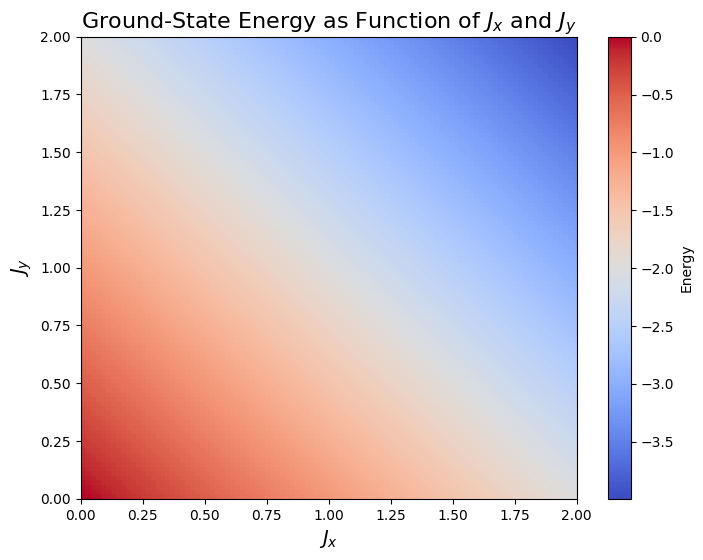

In [22]:
E_min = np.min(energies_1, axis=2)

plt.figure(figsize=(8,6))
plt.imshow(E_min, extent=[Jx_values_1.min(), Jx_values_1.max(),
                          Jy_values_1.min(), Jy_values_1.max()],
           origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label='Energy')
plt.xlabel('$J_x$', fontsize=14)
plt.ylabel('$J_y$', fontsize=14)
plt.title('Ground-State Energy as Function of $J_x$ and $J_y$', fontsize=16)
plt.show()

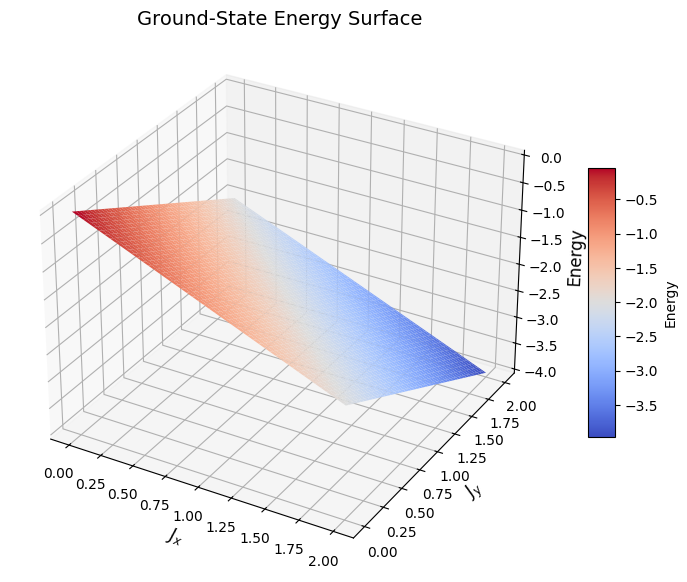

In [23]:
Jx_mesh, Jy_mesh = np.meshgrid(Jx_values_1, Jy_values_1, indexing='ij')
E_plot = np.min(energies_1, axis=2)  # ground state again

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Jx_mesh, Jy_mesh, E_plot, cmap='coolwarm', linewidth=0, antialiased=True)
ax.set_xlabel('$J_x$', fontsize=12)
ax.set_ylabel('$J_y$', fontsize=12)
ax.set_zlabel('Energy', fontsize=12)
ax.set_title('Ground-State Energy Surface', fontsize=14)
fig.colorbar(surf, shrink=0.5, aspect=10, label='Energy')
plt.show()

# Case 2 : Considering h is uniform at all sites

In [24]:
params_2 = {
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : np.ones(Nsites)*1.26
}

In [25]:
Hmat_2 = HOBC(Nsites, params_2)
# Hmat_2

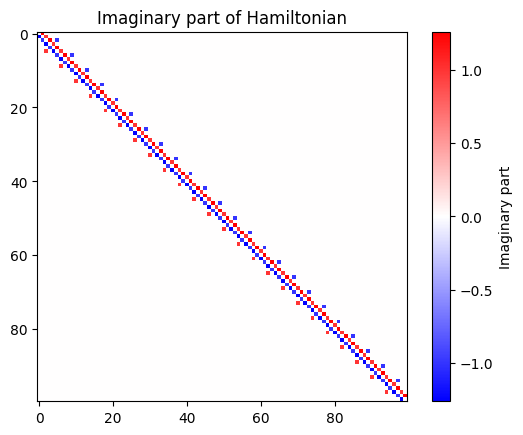

In [26]:
visualise_mat(Hmat_2)

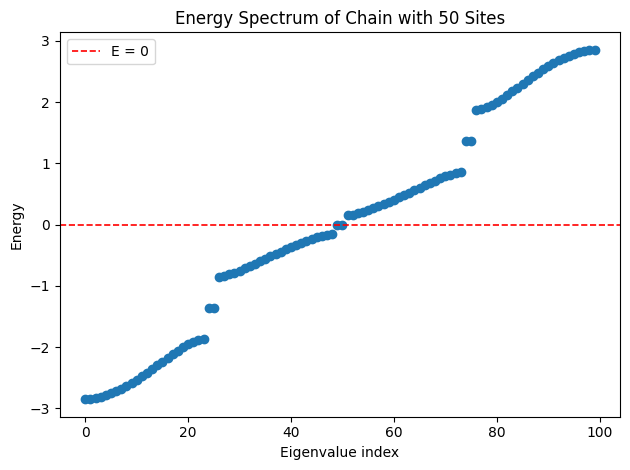

In [27]:
plot_spectrum(Hmat_2)

In [28]:
evals_2,evecs_2 = la.eigh(Hmat_2)
evals_2 = evals_2.real
check_zeromodes(evals_2, e_threshold)

(array([49, 50]), 2)

In [29]:
zmodes_ind_2 = np.where(abs(evals_2) <= e_threshold)[0]
vec0_2 = evecs_2[:,zmodes_ind_2[0]]
vec1_2 = evecs_2[:,zmodes_ind_2[1]]
np.dot(vec0_2,vec1_2)

np.complex128(1.0000000000000007-8.009159352929023e-13j)

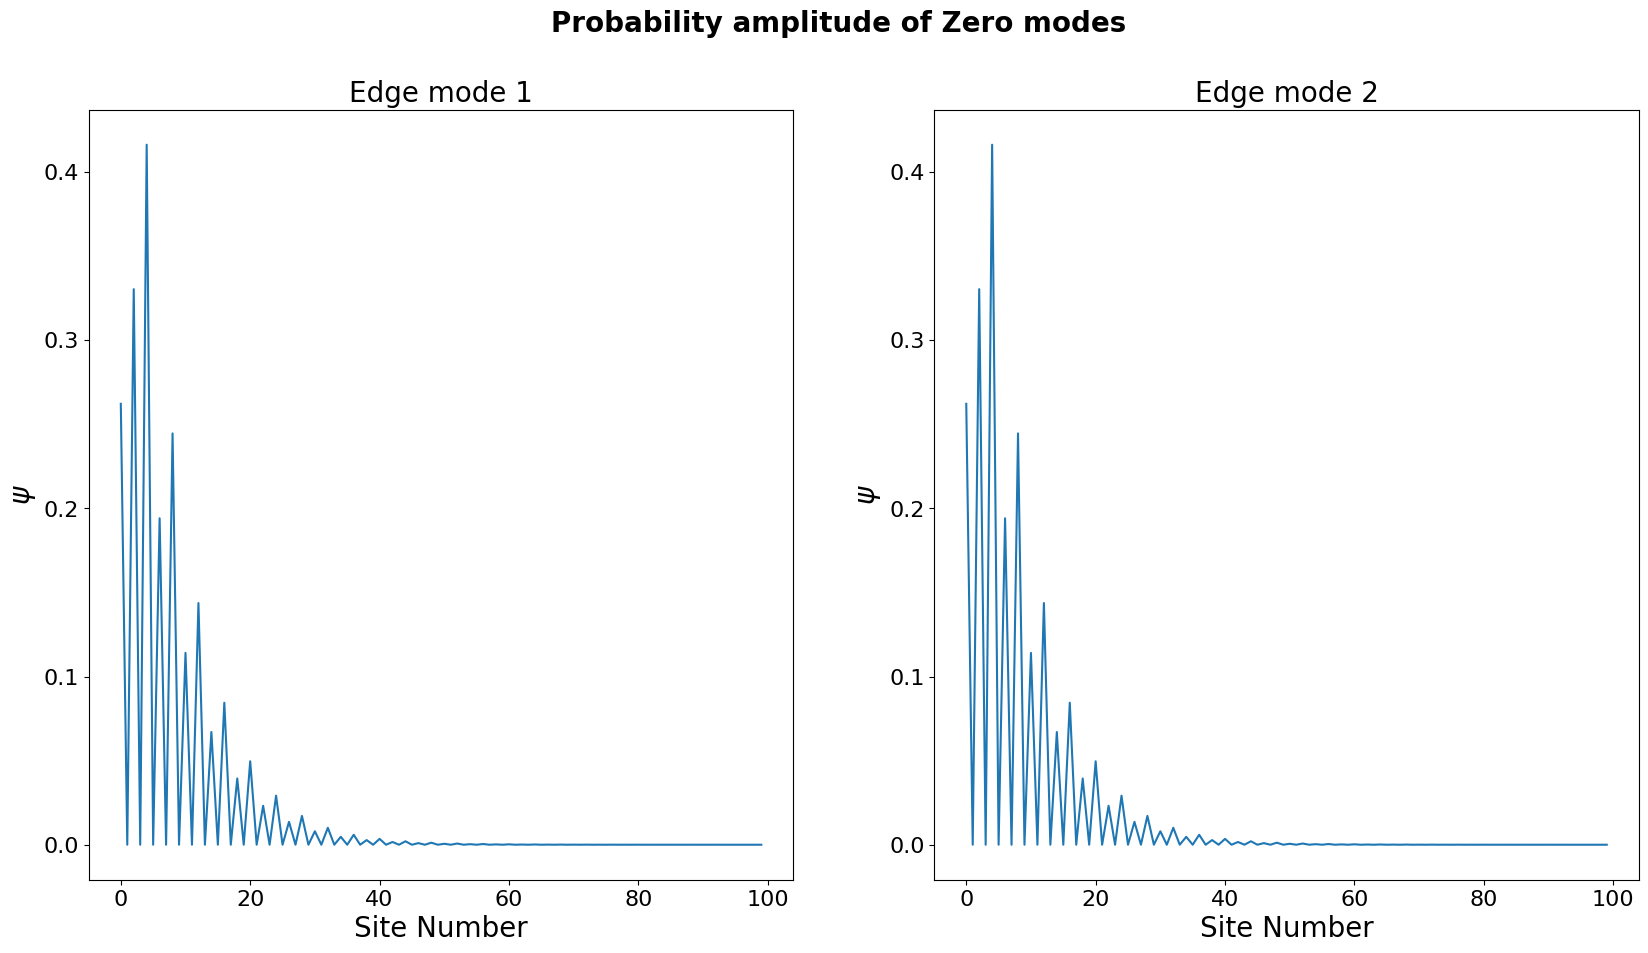

In [30]:
plot_zeromodes(evals_2,evecs_2,params_2, e_threshold)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\658958183.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


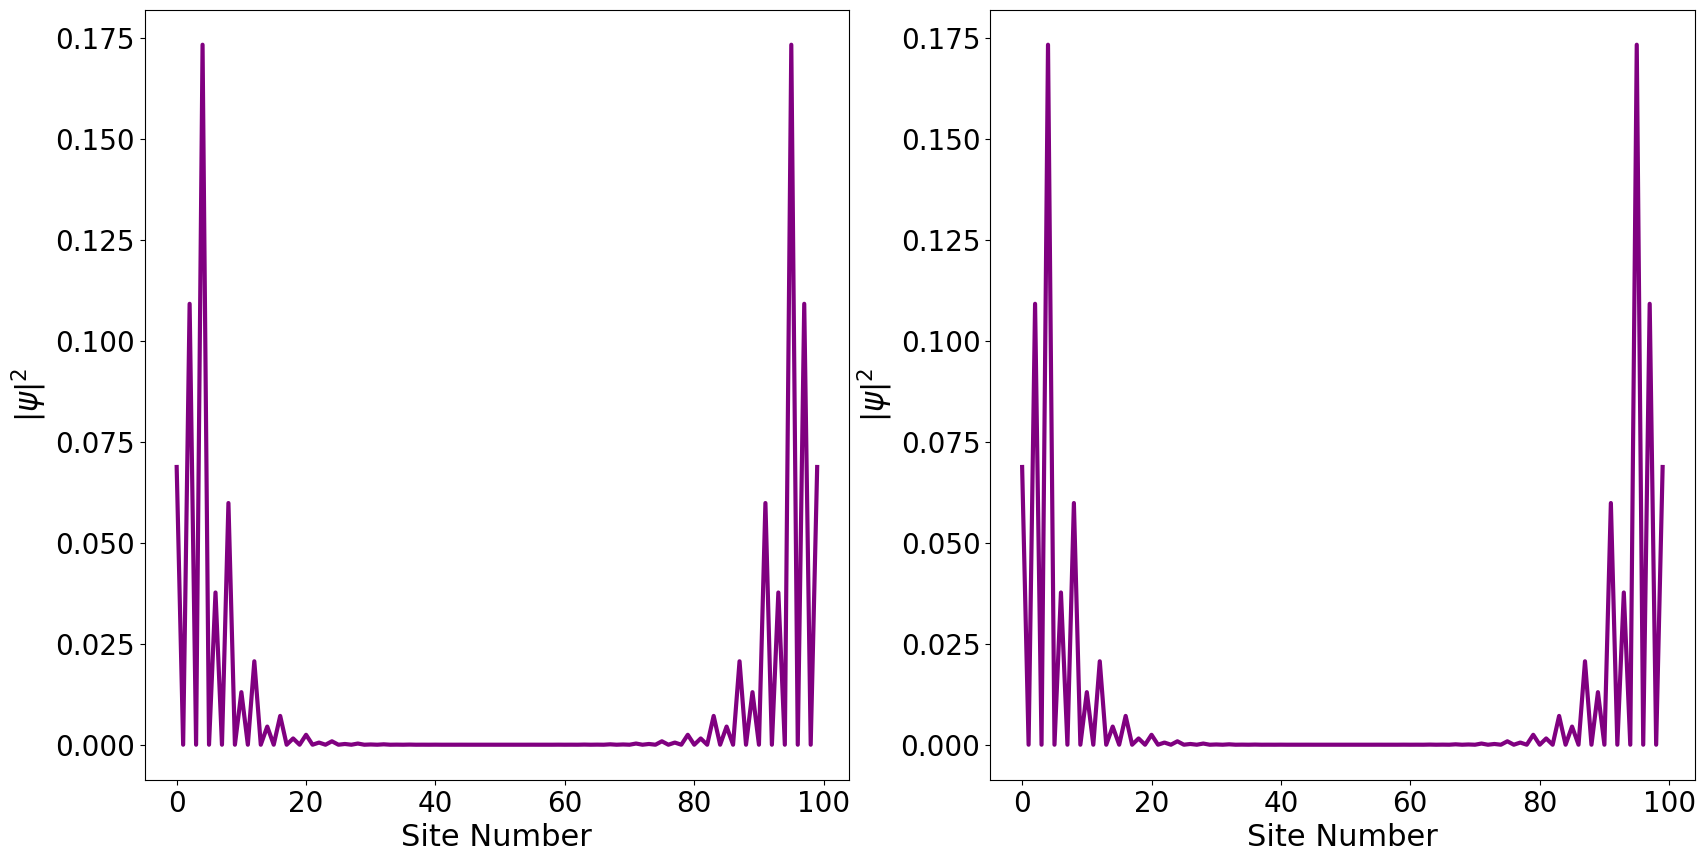

In [31]:
zmodes_ind_2,cnt_zmodes_2 = check_zeromodes(evals_2, e_threshold)
if cnt_zmodes_2 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_2,figsize=(20, 10))
    for cnt in range(cnt_zmodes_2):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_2[:,zmodes_ind_2[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

### Considering how energy eigenvalues changes for differnt $J_x = J_y = J$

In [32]:
J_values_2 = np.linspace(0, 2, 100)   # Jx = Jy = J

In [33]:
def HOBC_equal_J_2(Nsites, J, h):
    Nprime = 2 * Nsites
    Hmat = np.zeros((Nprime, Nprime), dtype=complex)

    for n in range(Nsites - 1):
        Hmat[2*n, 2*n+3]   = -(n % 2) * J
        Hmat[2*n+3, 2*n]   =  (n % 2) * J
        Hmat[2*n+1, 2*n+2] =  J
        Hmat[2*n+2, 2*n+1] = -J
        Hmat[2*n, 2*n+1]   = -h[n]
        Hmat[2*n+1, 2*n]   =  h[n]

    Hmat[2*(Nsites-1), 2*(Nsites-1)+1] = -h[Nsites-1]
    Hmat[2*(Nsites-1)+1, 2*(Nsites-1)] =  h[Nsites-1]

    return 1j * Hmat

In [34]:
h_2 = np.ones(Nsites)

eigvals_all_2 = []

for J in J_values_2:
    Hmat_equal_J_2 = HOBC_equal_J_2(Nsites, J, h_2)
    evals_equal_J_2, _ = np.linalg.eigh(Hmat_equal_J_2)
    eigvals_all_2.append(evals_equal_J_2)

In [35]:
eigvals_all_2 = np.array(eigvals_all_2)  # shape (100, 2*Nsites)

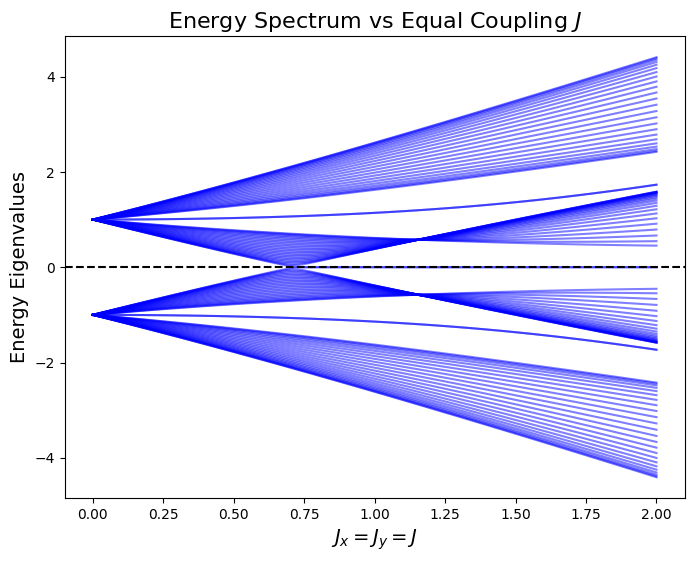

In [36]:
plt.figure(figsize=(8,6))
for n in range(eigvals_all_2.shape[1]):
    plt.plot(J_values_2, eigvals_all_2[:, n], color='blue', alpha=0.5)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('$J_x = J_y = J$', fontsize=14)
plt.ylabel('Energy Eigenvalues', fontsize=14)
plt.title('Energy Spectrum vs Equal Coupling $J$', fontsize=16)
plt.show()

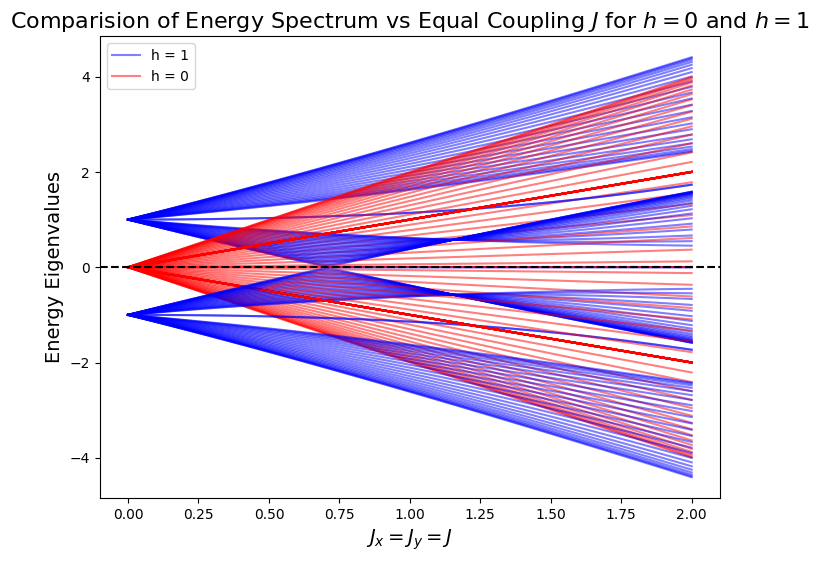

In [37]:
plt.figure(figsize=(8,6))
for n in range(eigvals_all_2.shape[1]):
    plt.plot(J_values_2, eigvals_all_2[:, n], color='blue', alpha=0.5, label='h = 1' if n == 0 else "")
    plt.plot(J_values_1, eigvals_all_1[:, n], color='red', alpha=0.5, label='h = 0' if n == 0 else "")
plt.axhline(0, color='black', linestyle='--')
plt.xlabel('$J_x = J_y = J$', fontsize=14)
plt.ylabel('Energy Eigenvalues', fontsize=14)
plt.title('Comparision of Energy Spectrum vs Equal Coupling $J$ for $h = 0$ and $h = 1$', fontsize=16)
plt.legend()
plt.show()

### Considering how energy eigenvalues changes for differnt $J_x$ and $J_y$

In [38]:
def HOBC_diff_J_2(Nsites, Jx, Jy, h):
    Nprime = 2 * Nsites
    Hmat = np.zeros((Nprime, Nprime), dtype=complex)

    for n in range(Nsites - 1):
        Hmat[2*n, 2*n+3]   = -(n % 2) * Jy
        Hmat[2*n+3, 2*n]   =  (n % 2) * Jy
        Hmat[2*n+1, 2*n+2] =  Jx
        Hmat[2*n+2, 2*n+1] = -Jx
        Hmat[2*n, 2*n+1]   = -h[n]
        Hmat[2*n+1, 2*n]   =  h[n]

    # Last site term
    Hmat[2*(Nsites-1), 2*(Nsites-1)+1] = -h[Nsites-1]
    Hmat[2*(Nsites-1)+1, 2*(Nsites-1)] =  h[Nsites-1]

    return 1j * Hmat

In [39]:
Jx_values_2 = np.linspace(0, 2, 100)
Jy_values_2 = np.linspace(0, 2, 100)

energies_2 = []

for i, Jx in enumerate(Jx_values_2):
    for j, Jy in enumerate(Jy_values_2):
        Hmat_diff_J_2 = HOBC_diff_J_2(Nsites, Jx, Jy, h_2)
        evals_diff_J_2, _ = np.linalg.eigh(Hmat_diff_J_2)
        energies_2.append(evals_diff_J_2)

In [40]:
energies_2 = np.array(energies_2)

Nx = len(Jx_values_2)
Ny = len(Jy_values_2)
energies_2 = energies_2.reshape(Nx, Ny, -1)

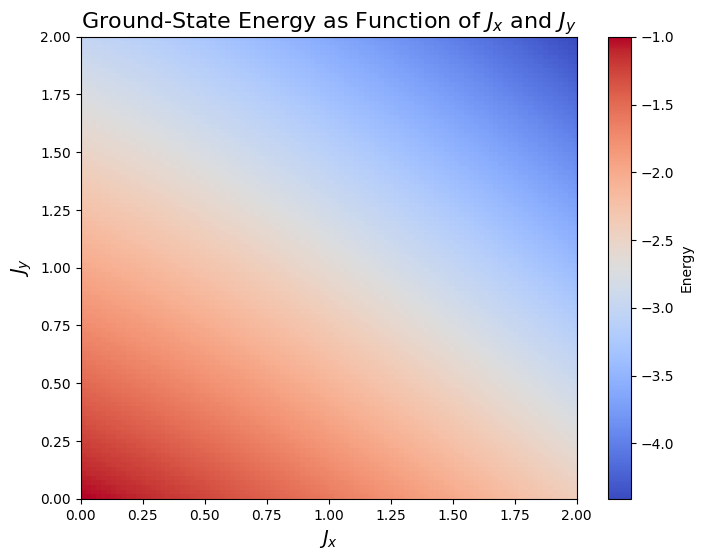

In [41]:
E_min = np.min(energies_2, axis=2)

plt.figure(figsize=(8,6))
plt.imshow(E_min, extent=[Jx_values_2.min(), Jx_values_2.max(),
                          Jy_values_2.min(), Jy_values_2.max()],
           origin='lower', aspect='auto', cmap='coolwarm')
plt.colorbar(label='Energy')
plt.xlabel('$J_x$', fontsize=14)
plt.ylabel('$J_y$', fontsize=14)
plt.title('Ground-State Energy as Function of $J_x$ and $J_y$', fontsize=16)
plt.show()

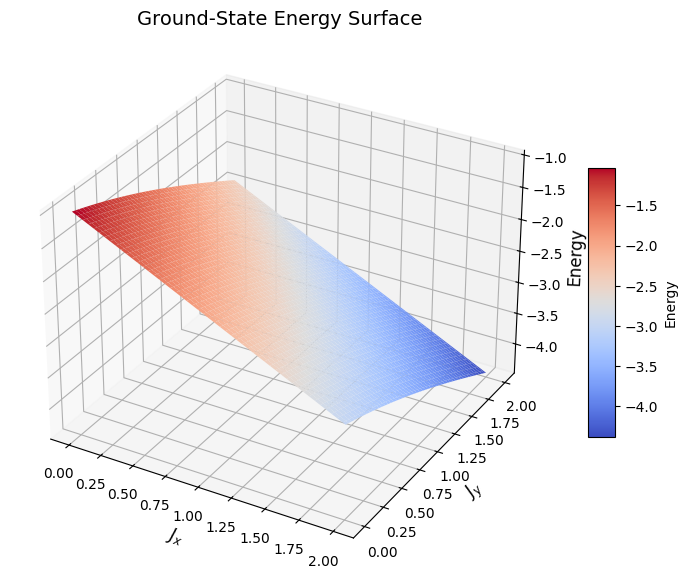

In [42]:
Jx_mesh, Jy_mesh = np.meshgrid(Jx_values_2, Jy_values_2, indexing='ij')
E_plot = np.min(energies_2, axis=2)  # ground state again

fig = plt.figure(figsize=(10,7))
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_surface(Jx_mesh, Jy_mesh, E_plot, cmap='coolwarm', linewidth=0, antialiased=True)
ax.set_xlabel('$J_x$', fontsize=12)
ax.set_ylabel('$J_y$', fontsize=12)
ax.set_zlabel('Energy', fontsize=12)
ax.set_title('Ground-State Energy Surface', fontsize=14)
fig.colorbar(surf, shrink=0.5, aspect=10, label='Energy')
plt.show()

### How number of Majorana zero modes vary with $J_x$ and $J_y$ values

In [43]:
e_threshold_3 = 1e-3
def count_zero_modes(evals, e_threshold):
    return np.sum(np.abs(evals) <= e_threshold)

In [44]:
n = count_zero_modes(evals_1, e_threshold_3)
n

np.int64(2)

In [45]:
def sweep_Jx_Jy(Nsites, Jx_vals, Jy_vals, h_fixed):
    Z_Jx_Jy = np.zeros((len(Jx_vals), len(Jy_vals)))

    for i, Jx in enumerate(Jx_vals):
        for j, Jy in enumerate(Jy_vals):
            params = {
                "J_x": np.ones(Nsites-1) * Jx,
                "J_y": np.ones(int(Nsites/2)-1) * Jy,
                "h":  np.ones(Nsites) * h_fixed
            }
            H = HOBC(Nsites, params)
            evals = la.eigh(H)[0].real
            Z_Jx_Jy[i, j] = count_zero_modes(evals, e_threshold_3)

    return Z_Jx_Jy

In [46]:
def sweep_h2_Jprod(Nsites, h_vals, Jprod_vals):
    Z_h2_Jprod = np.zeros((len(Jprod_vals), len(h_vals)))

    for i, Jprod in enumerate(Jprod_vals):
        # choose Jx = Jy = sqrt(Jprod) — only product matters for you
        J = np.sqrt(Jprod)

        for j, h in enumerate(h_vals):
            params = {
                "J_x": np.ones(Nsites-1) * J,
                "J_y": np.ones(int(Nsites/2)-1) * J,
                "h":  np.ones(Nsites) * h
            }
            H = HOBC(Nsites, params)
            evals = la.eigh(H)[0].real
            Z_h2_Jprod[i, j] = count_zero_modes(evals, e_threshold_3)

    return Z_h2_Jprod

In [47]:
def plot_colormap(X, Y, Z, xlabel, ylabel, title):
    plt.figure(figsize=(8, 6))
    plt.imshow(
        Z,
        origin='lower',
        extent=[X.min(), X.max(), Y.min(), Y.max()],
        aspect='auto',
        cmap='gray'
    )
    plt.colorbar(label='Number of Zero Modes')
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.title(title, fontsize=18)
    plt.tight_layout()
    plt.show()


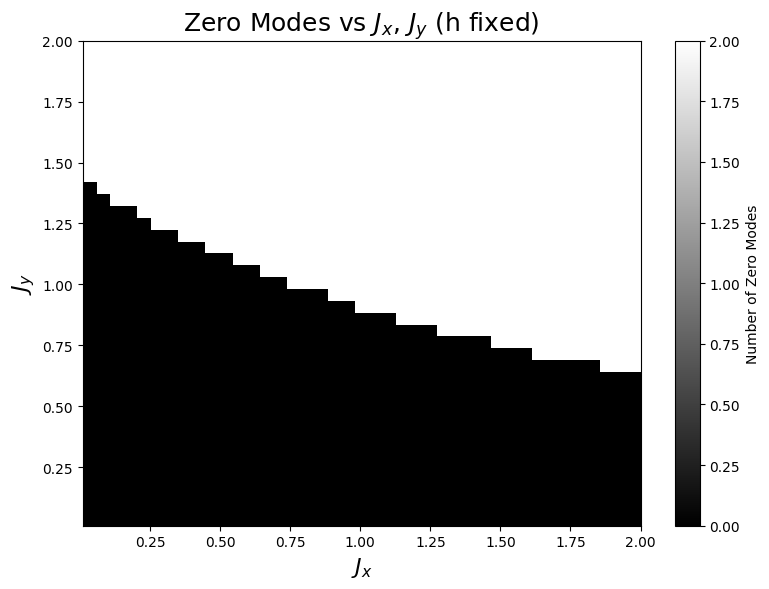

In [48]:
# ranges you may tune
Jx_vals = np.linspace(1e-2, 2, 41)
Jy_vals = np.linspace(1e-2, 2, 41)
h_fixed = 1.26     # or any value you want

Z1 = sweep_Jx_Jy(Nsites, Jx_vals, Jy_vals, h_fixed)

plot_colormap(
    X=Jx_vals,
    Y=Jy_vals,
    Z=Z1,
    xlabel=r"$J_x$",
    ylabel=r"$J_y$",
    title="Zero Modes vs $J_x$, $J_y$ (h fixed)"
)


# Case 3: Considering h is non-uniform across all sites

In [49]:
# l_u = even and v = even

def h(l_u , v):
    h = np.random.rand(Nsites)
    h[l_u-1:l_u + v-1] = 0
    return h

l_u = 20
v = 10
h_1 = h(l_u , v)

params_3_1 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h_1 
}

J_x = params_3_1['J_x']
J_y = params_3_1['J_y']

In [50]:
h_1

array([0.42596752, 0.06144501, 0.7942199 , 0.50572445, 0.17693042,
       0.81083732, 0.33465801, 0.30477322, 0.23373074, 0.54935388,
       0.12608818, 0.92963894, 0.31945187, 0.4581888 , 0.58788534,
       0.19549801, 0.7493512 , 0.4772527 , 0.87083899, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.61496862,
       0.90218616, 0.48153333, 0.15107382, 0.01909251, 0.73653809,
       0.61990474, 0.47247632, 0.22515676, 0.7096445 , 0.78301263,
       0.79430173, 0.99621172, 0.12249968, 0.18182287, 0.61910098,
       0.3589386 , 0.94024402, 0.4134194 , 0.43491157, 0.719939  ])

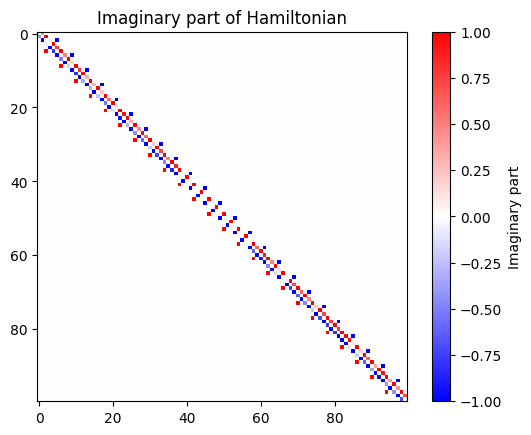

In [51]:
Hmat_3_1 = HOBC(Nsites, params_3_1)
visualise_mat(Hmat_3_1)

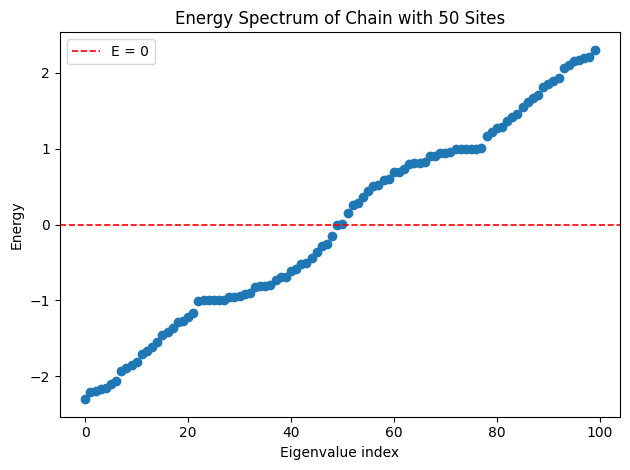

In [52]:
plot_spectrum(Hmat_3_1)

In [53]:
e_threshold_3 = 1e-3
evals_3_1,evecs_3_1 = la.eigh(Hmat_3_1)
evals_3_1 = evals_3_1.real
check_zeromodes(evals_3_1, e_threshold_3)

(array([49, 50]), 2)

In [54]:
np.min(abs(evals_3_1))

np.float64(0.0007061626141623386)

In [55]:
zmodes_ind_3 = np.where(abs(evals_3_1) <= e_threshold_3)[0]
vec0_3_1 = evecs_3_1[:,zmodes_ind_3[0]]
vec1_3_1 = evecs_3_1[:,zmodes_ind_3[1]]
np.dot(vec0_3_1,vec1_3_1)

np.complex128(-1.0000000000000002+2.1720201590789784e-16j)

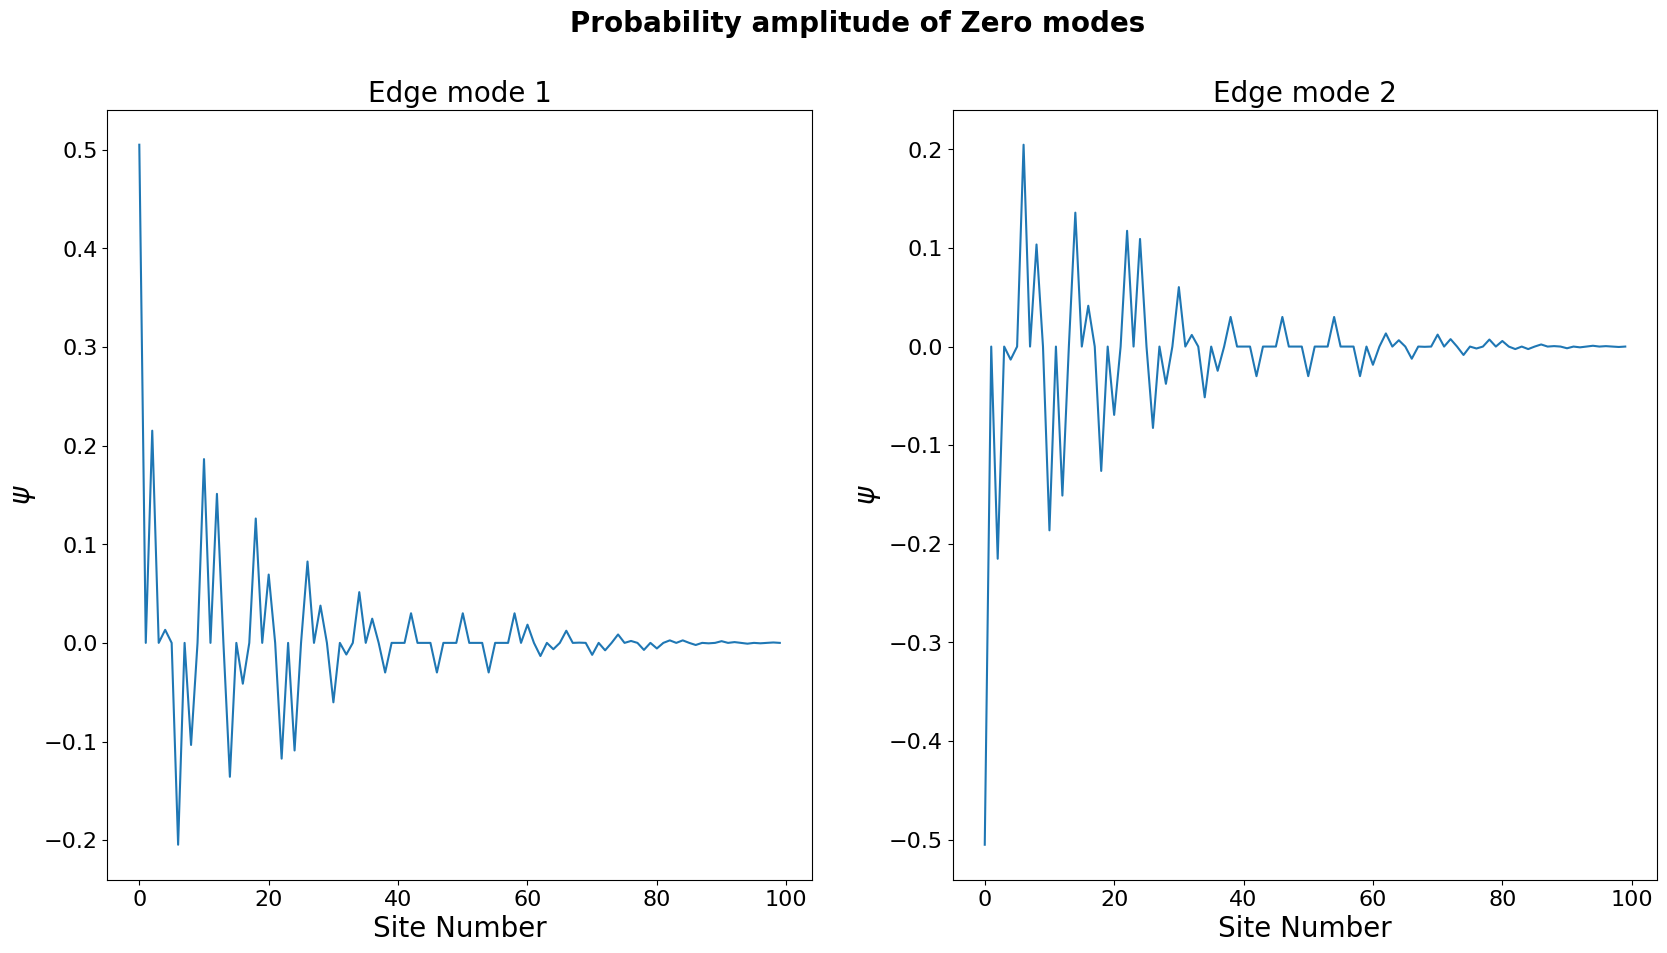

In [56]:
plot_zeromodes(evals_3_1,evecs_3_1,params_3_1, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\2989558415.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


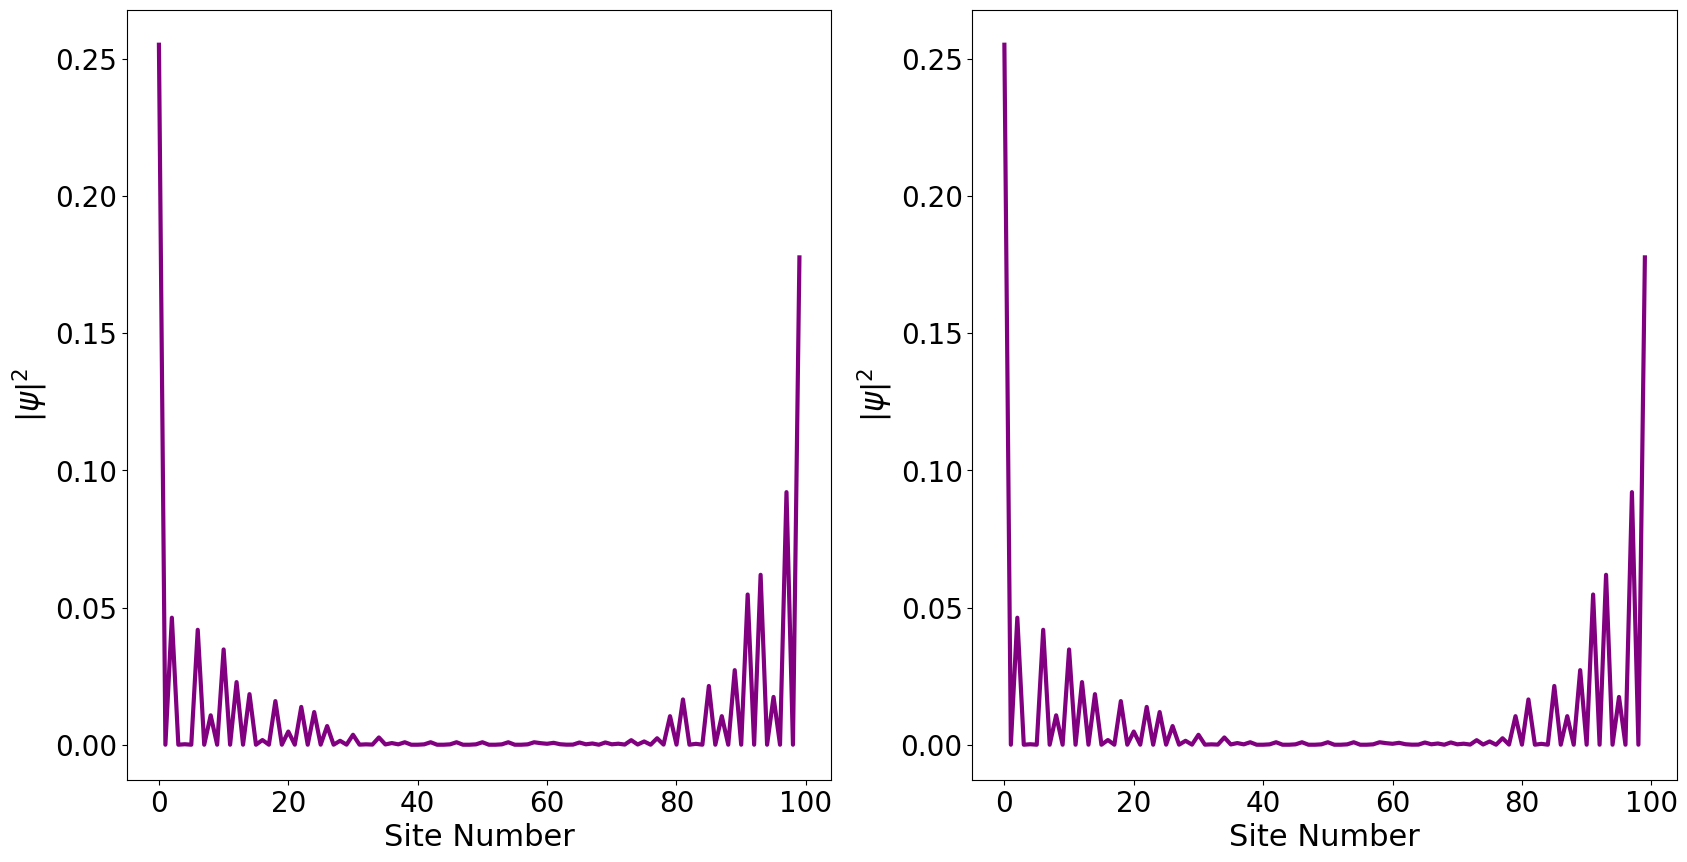

In [57]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals_3_1, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_3_1[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.2)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [58]:
# l_u = even , v = odd (v = 1)

l_u = 20
v = 1
h_2 = h(l_u, v)

params_3_2 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h_2 
}

J_x = params_3_2['J_x']
J_y = params_3_2['J_y']

In [59]:
h_2

array([0.75749193, 0.04614878, 0.00563098, 0.15003524, 0.56681177,
       0.79908588, 0.7891255 , 0.70156909, 0.86428368, 0.63264538,
       0.06175791, 0.81134428, 0.58581016, 0.89115622, 0.47145469,
       0.33385452, 0.119793  , 0.30440878, 0.98493371, 0.        ,
       0.56798198, 0.38022401, 0.6755334 , 0.59013744, 0.61123499,
       0.39726242, 0.23689687, 0.8356808 , 0.69327348, 0.4736282 ,
       0.55434766, 0.75307041, 0.64969437, 0.93297865, 0.18134602,
       0.32703852, 0.95246295, 0.8628681 , 0.36551881, 0.10631866,
       0.94236956, 0.27805636, 0.08859323, 0.00192713, 0.86241213,
       0.70022291, 0.97880634, 0.04345307, 0.23164258, 0.72736657])

In [60]:
Hmat_3_2 = HOBC(Nsites, params_3_2)

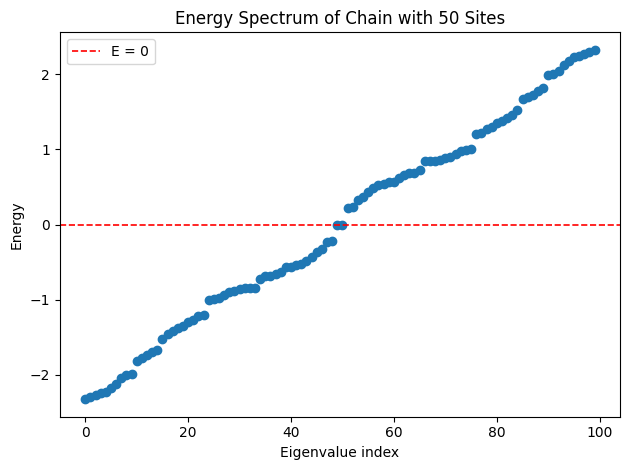

In [61]:
plot_spectrum(Hmat_3_2)

In [62]:
e_threshold_3 = 1e-3
evals_3_2,evecs_3_2 = la.eigh(Hmat_3_2)
evals_3_2 = evals_3_2.real
check_zeromodes(evals_3_2, e_threshold_3)

(array([49, 50]), 2)

In [63]:
np.min(abs(evals_3_2))

np.float64(3.505438507973868e-05)

In [64]:
zmodes_ind_3 = np.where(abs(evals_3_2) <= e_threshold_3)[0]
vec0_3_2 = evecs_3_2[:,zmodes_ind_3[0]]
vec1_3_2 = evecs_3_2[:,zmodes_ind_3[1]]
np.dot(vec0_3_2,vec1_3_2)

np.complex128(-0.9999999999999991-2.582014460168951e-15j)

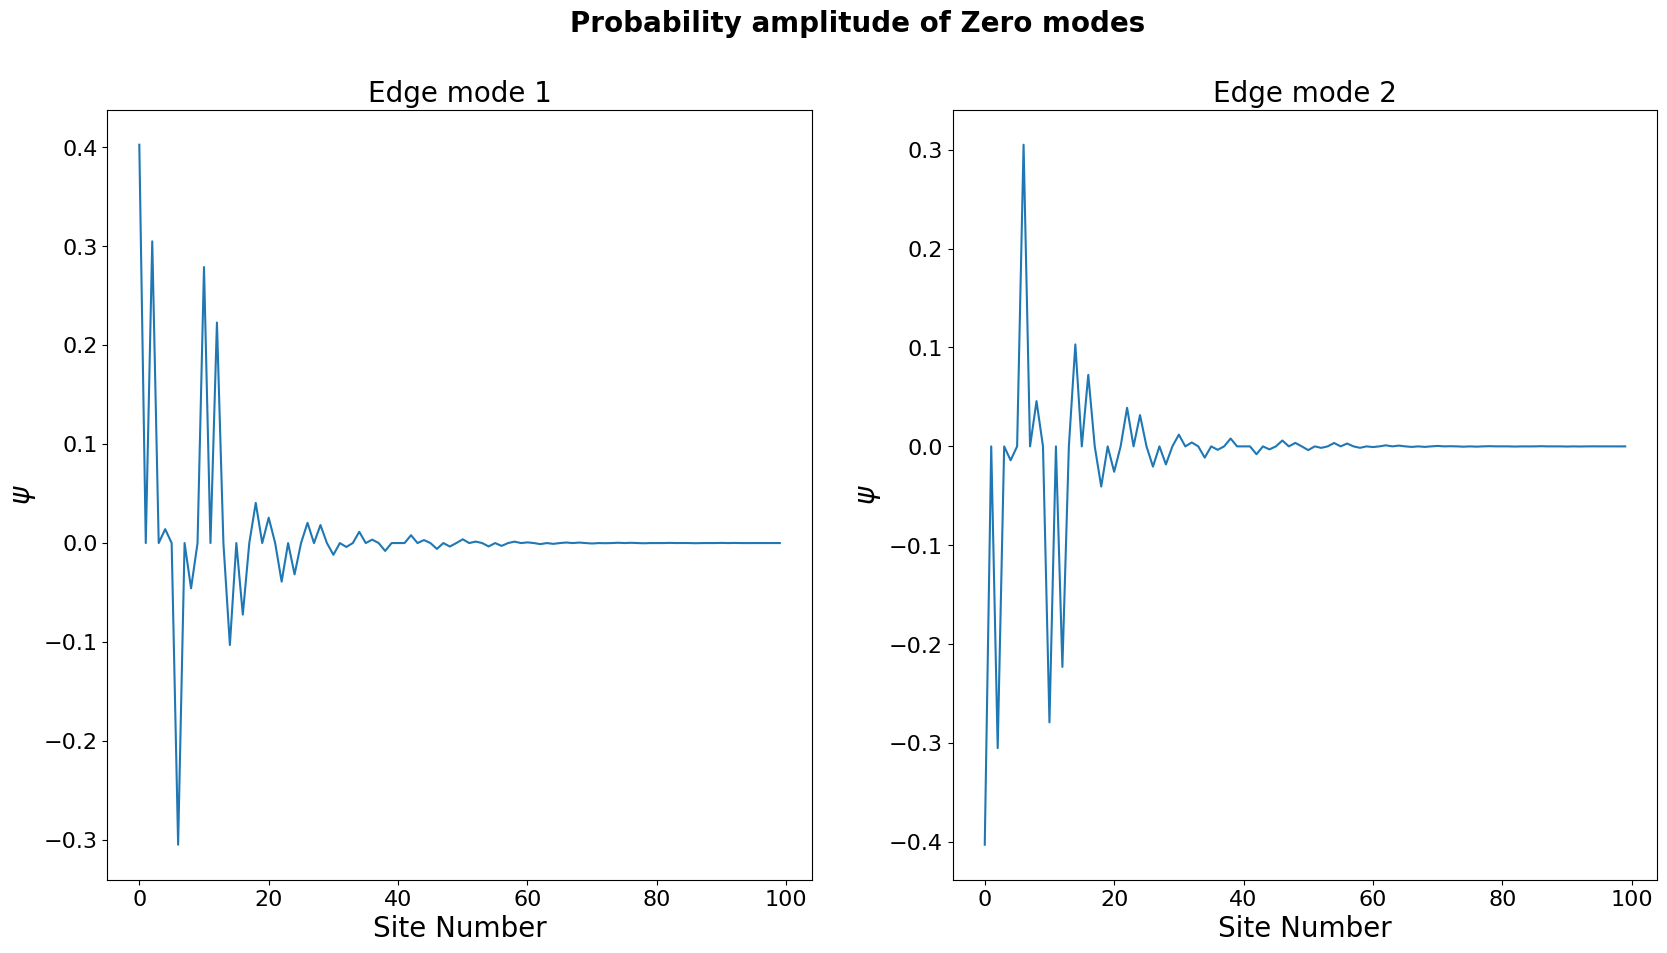

In [65]:
plot_zeromodes(evals_3_2,evecs_3_2,params_3_2, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\2985574705.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


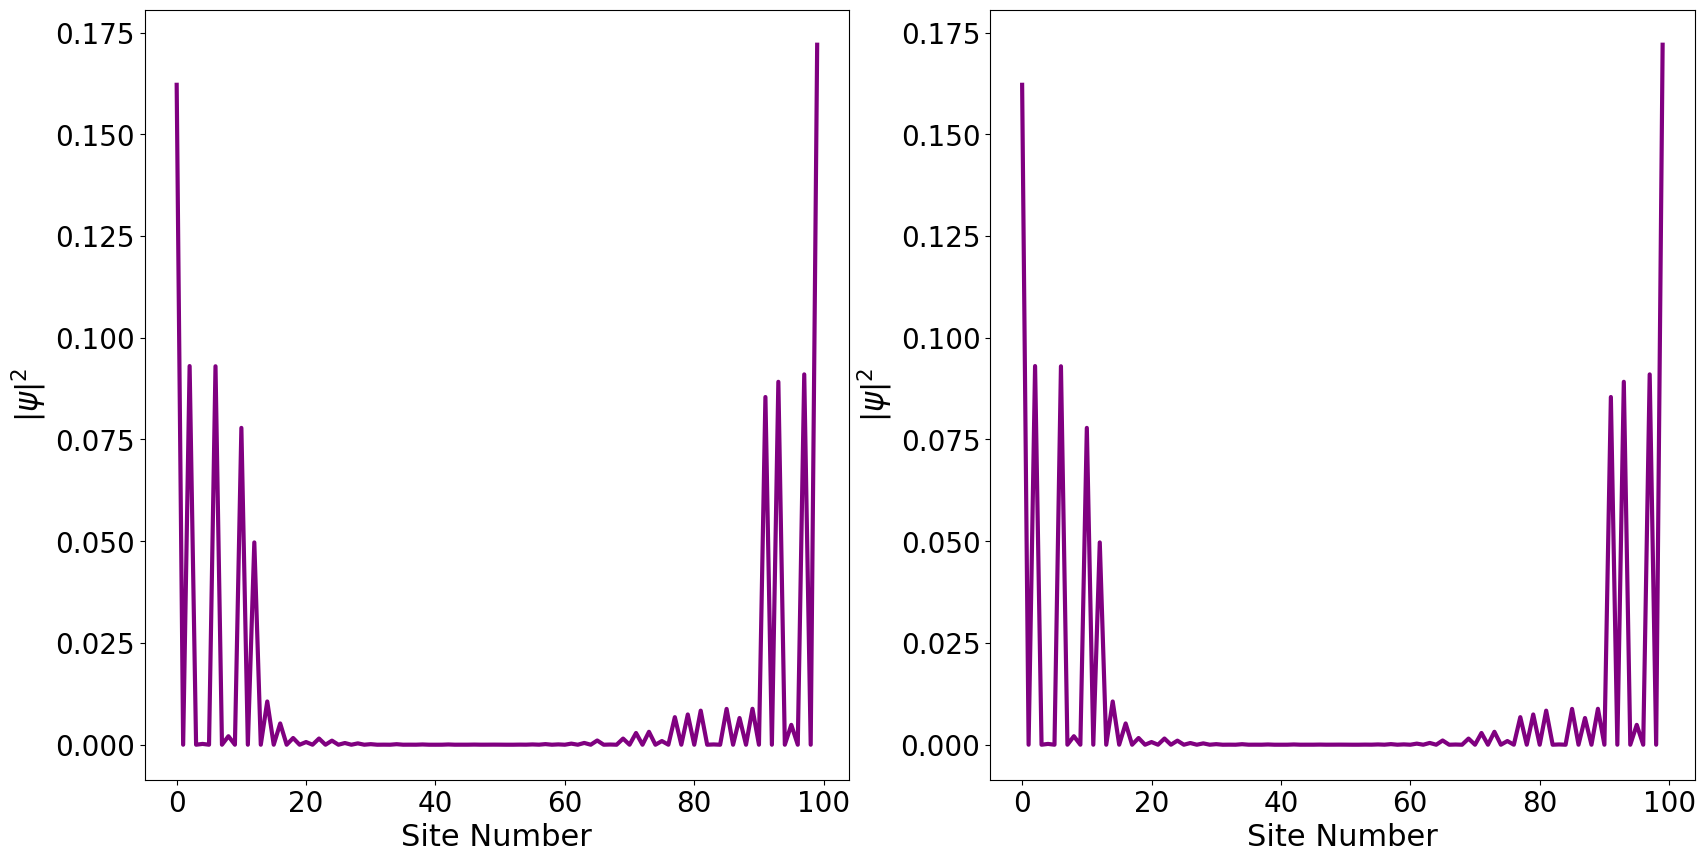

In [66]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals_3_2, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_3_2[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.1)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [67]:
# l_u = even , v = odd 

l_u = 20
v = 17
h_3 = h(l_u, v)

params_3_3 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h_3 
}

J_x = params_3_3['J_x']
J_y = params_3_3['J_y']

In [68]:
h_3

array([0.73204048, 0.37545794, 0.20750839, 0.56220894, 0.66329447,
       0.41403735, 0.93741855, 0.77957379, 0.39490305, 0.63872552,
       0.5919169 , 0.05381641, 0.65458231, 0.19983293, 0.49135989,
       0.2871845 , 0.80657982, 0.57261953, 0.37976338, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.83410784, 0.40958642, 0.68539026, 0.55338633,
       0.99716614, 0.43616003, 0.57892501, 0.6137322 , 0.80674004,
       0.07528874, 0.57624661, 0.16966485, 0.08138615, 0.94454272])

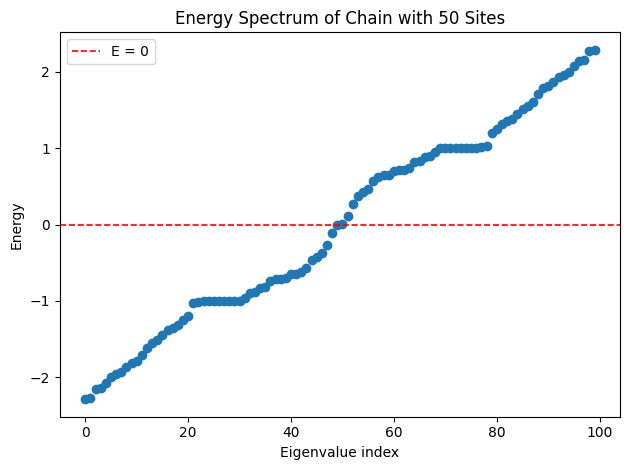

In [69]:
Hmat_3_3 = HOBC(Nsites, params_3_3)
plot_spectrum(Hmat_3_3)

In [70]:
e_threshold_3 = 1e-2
evals_3_3,evecs_3_3 = la.eigh(Hmat_3_3)
evals_3_3 = evals_3_3.real
check_zeromodes(evals_3_3, e_threshold_3)

(array([49, 50]), 2)

In [71]:
np.min(abs(evals_3_3))

np.float64(0.0017276961339635713)

In [72]:
zmodes_ind_3 = np.where(abs(evals_3_3) <= e_threshold_3)[0]
vec0_3_3 = evecs_3_3[:,zmodes_ind_3[0]]
vec1_3_3 = evecs_3_3[:,zmodes_ind_3[1]]
np.dot(vec0_3_3,vec1_3_3)

np.complex128(-1.0000000000000004-3.312076366944641e-16j)

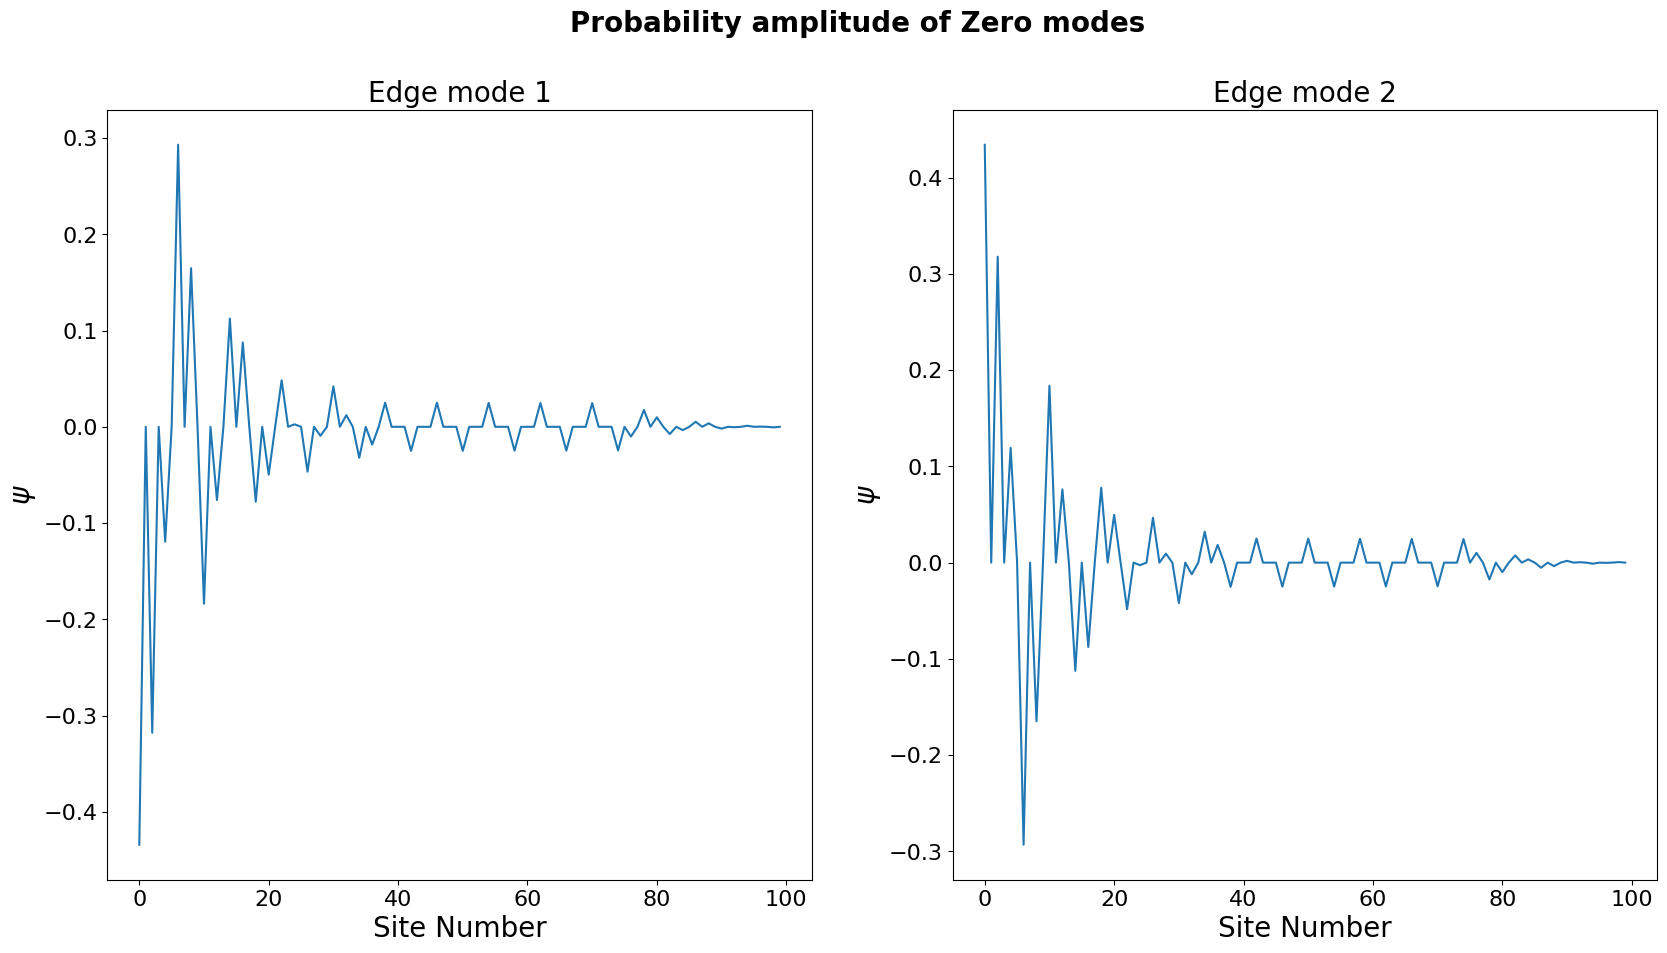

In [73]:
plot_zeromodes(evals_3_3,evecs_3_3,params_3_3, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\1675073803.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


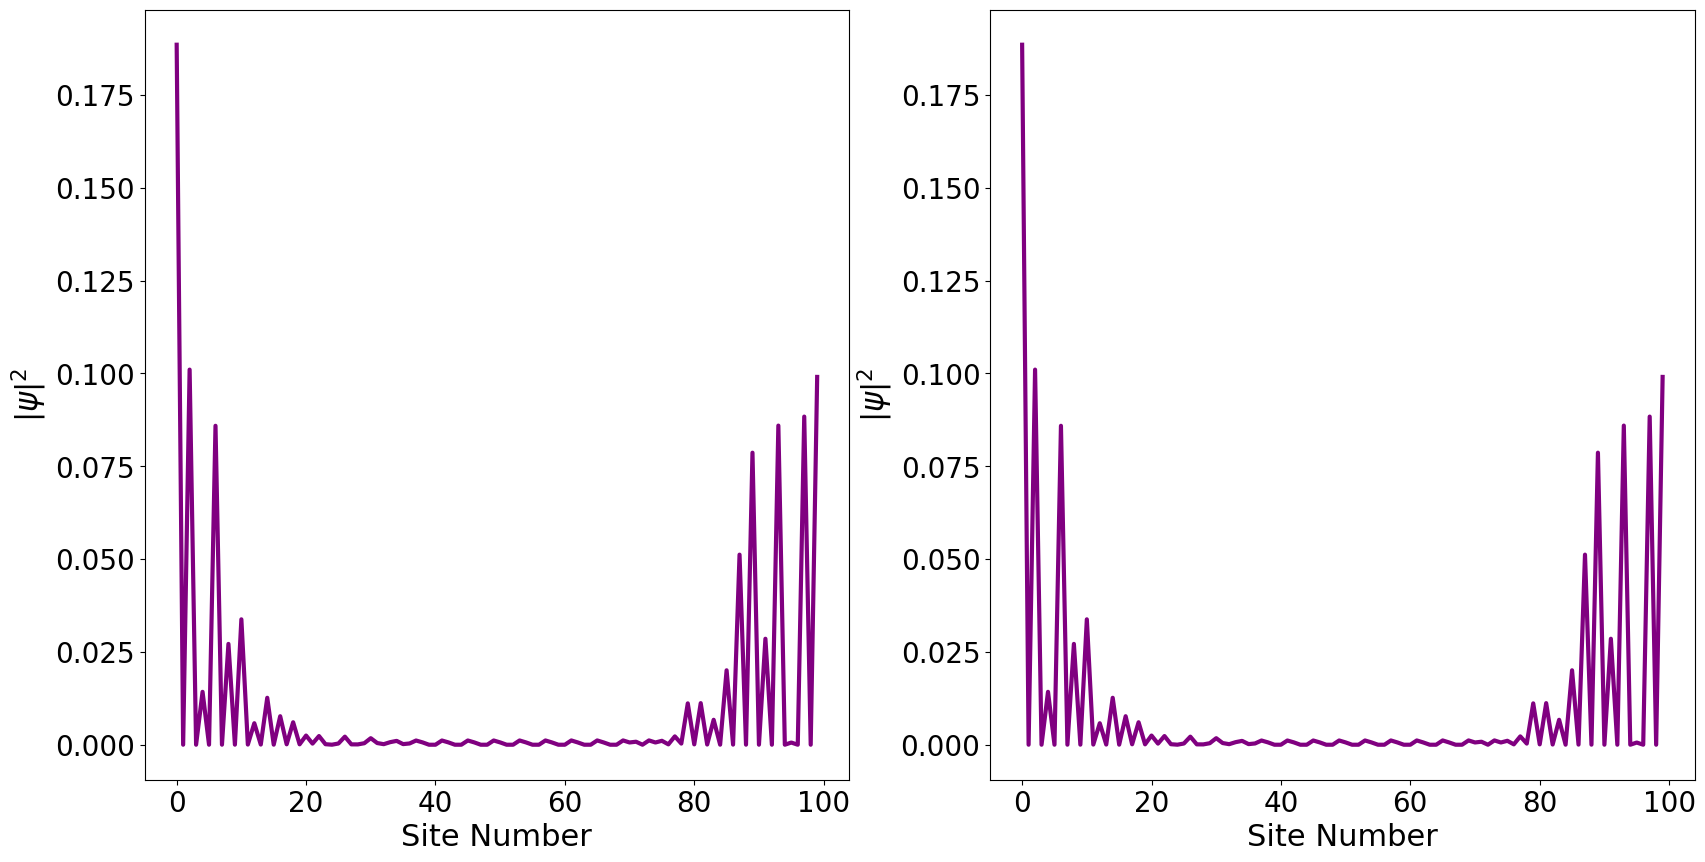

In [74]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals_3_3, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_3_3[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.1)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [75]:
# l_u = odd , v = even 

l_u = 23
v = 10
h_4 = h(l_u, v)

params_3_4 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h_4 
}

J_x = params_3_4['J_x']
J_y = params_3_4['J_y']

In [76]:
h_4

array([0.56575246, 0.26188372, 0.2567655 , 0.41186985, 0.31734115,
       0.12111455, 0.55129727, 0.20692495, 0.21282665, 0.057356  ,
       0.92450415, 0.63873707, 0.36005916, 0.94238717, 0.77903363,
       0.98428135, 0.70731248, 0.6639545 , 0.4536737 , 0.17842295,
       0.63427979, 0.02406699, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.61657177, 0.01410418, 0.08400653,
       0.24229723, 0.8767008 , 0.01973499, 0.58083756, 0.3570299 ,
       0.49797645, 0.30141713, 0.39402848, 0.17125516, 0.34807206,
       0.26374992, 0.62250592, 0.92373001, 0.94307012, 0.6006098 ])

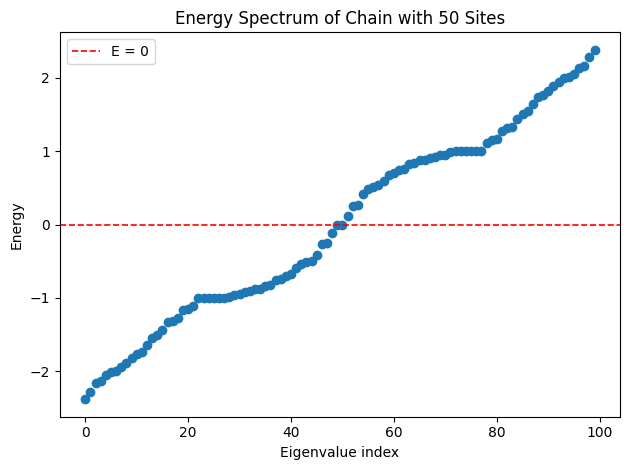

In [77]:
Hmat_3_4 = HOBC(Nsites, params_3_4)
plot_spectrum(Hmat_3_4)

In [78]:
e_threshold_3 = 1e-2
evals_3_4,evecs_3_4 = la.eigh(Hmat_3_4)
evals_3_4 = evals_3_4.real
check_zeromodes(evals_3_4, e_threshold_3)

(array([49, 50]), 2)

In [79]:
np.min(abs(evals_3_4))

np.float64(0.00024038202006913944)

In [80]:
zmodes_ind_3 = np.where(abs(evals_3_4) <= e_threshold_3)[0]
vec0_3_4 = evecs_3_4[:,zmodes_ind_3[0]]
vec1_3_4 = evecs_3_4[:,zmodes_ind_3[1]]
np.dot(vec0_3_4,vec1_3_4)

np.complex128(-0.9999999999999998-8.432655560995777e-16j)

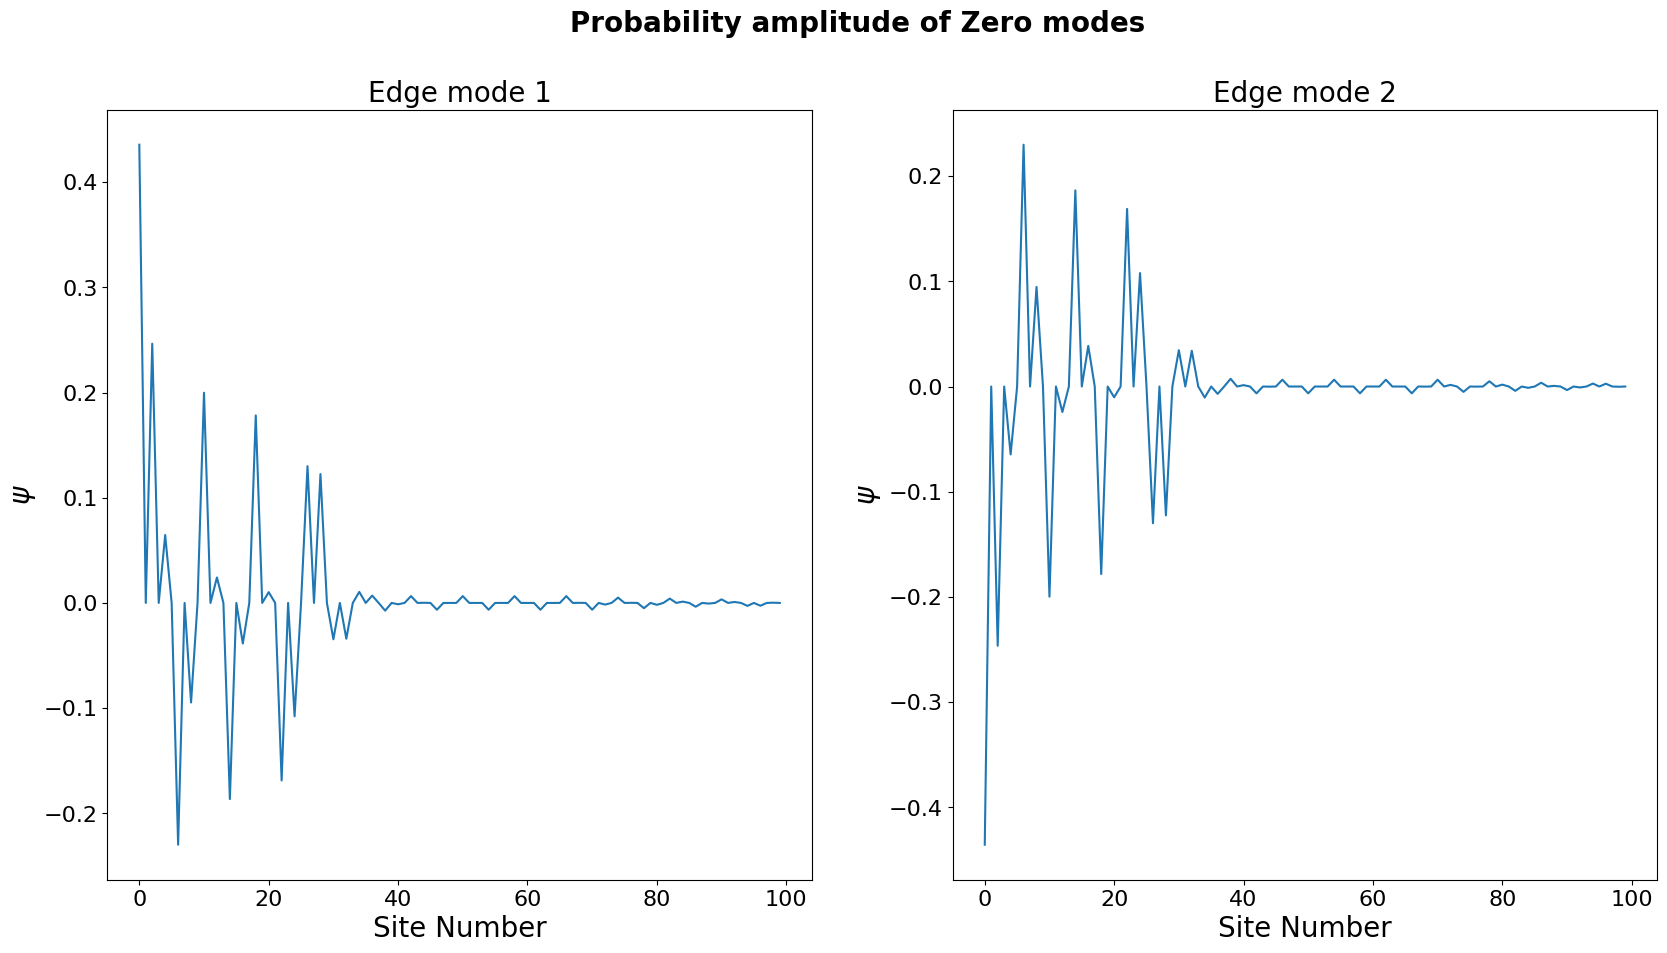

In [81]:
plot_zeromodes(evals_3_4,evecs_3_4,params_3_4, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\3392465422.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


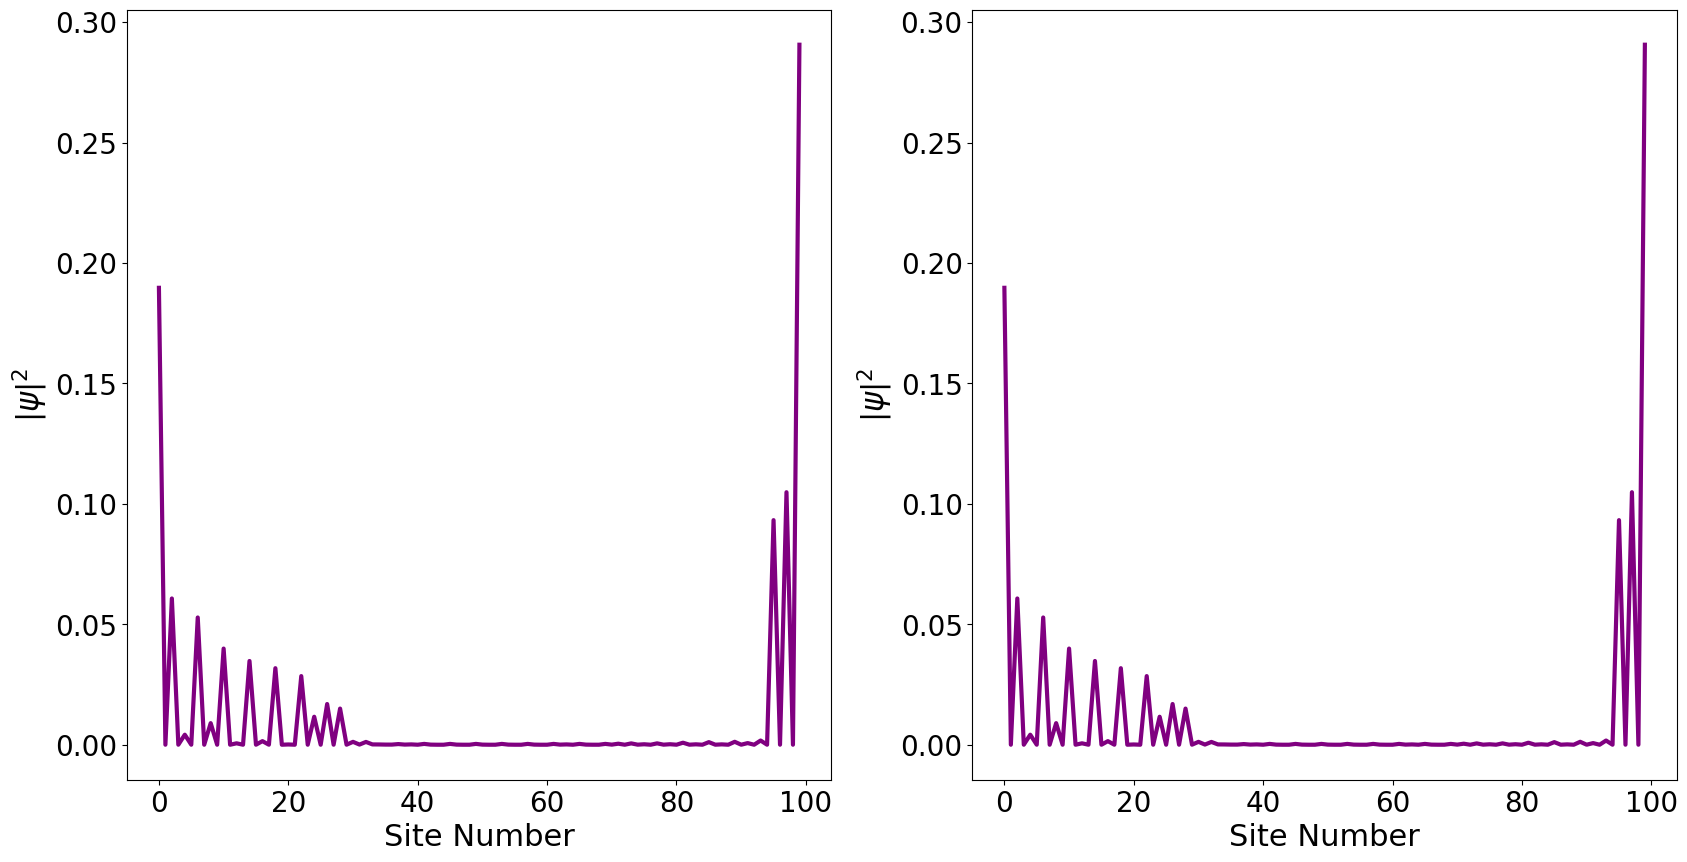

In [82]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals_3_4, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_3_4[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.25)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [83]:
# l_u = odd , v = odd (v = 1) 

l_u = 23
v = 1
h_5 = h(l_u, v)

params_3_5 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h_5 
}

J_x = params_3_5['J_x']
J_y = params_3_5['J_y']

In [84]:
h_5

array([0.96013875, 0.03095614, 0.2419759 , 0.69222857, 0.46334131,
       0.27416724, 0.01961568, 0.44639388, 0.26063789, 0.23604466,
       0.24920342, 0.82207367, 0.79755758, 0.92022504, 0.10374718,
       0.44970976, 0.93892631, 0.82980408, 0.64900159, 0.99310686,
       0.48981563, 0.12119484, 0.        , 0.51040681, 0.61437216,
       0.16707752, 0.05857866, 0.25387617, 0.37471639, 0.16960518,
       0.28498448, 0.77673953, 0.37870451, 0.31626835, 0.60944357,
       0.0327968 , 0.86934594, 0.94061274, 0.62113862, 0.50298931,
       0.15033596, 0.19324959, 0.8585281 , 0.96451487, 0.7395878 ,
       0.98401964, 0.6917261 , 0.94652261, 0.73231156, 0.2013861 ])

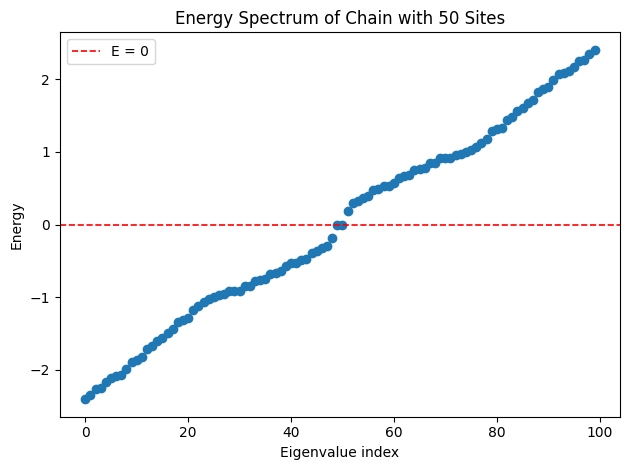

In [85]:
Hmat_3_5 = HOBC(Nsites, params_3_5)
plot_spectrum(Hmat_3_5)

In [86]:
e_threshold_3 = 1e-3
evals_3_5,evecs_3_5 = la.eigh(Hmat_3_5)
evals_3_5 = evals_3_5.real
check_zeromodes(evals_3_5, e_threshold_3)

(array([49, 50]), 2)

In [87]:
np.min(abs(evals_3_5))

np.float64(5.71613310855157e-06)

In [88]:
zmodes_ind_3 = np.where(abs(evals_3_5) <= e_threshold_3)[0]
vec0_3_5 = evecs_3_5[:,zmodes_ind_3[0]]
vec1_3_5 = evecs_3_5[:,zmodes_ind_3[1]]
np.dot(vec0_3_5,vec1_3_5)

np.complex128(1+3.3039101512840136e-15j)

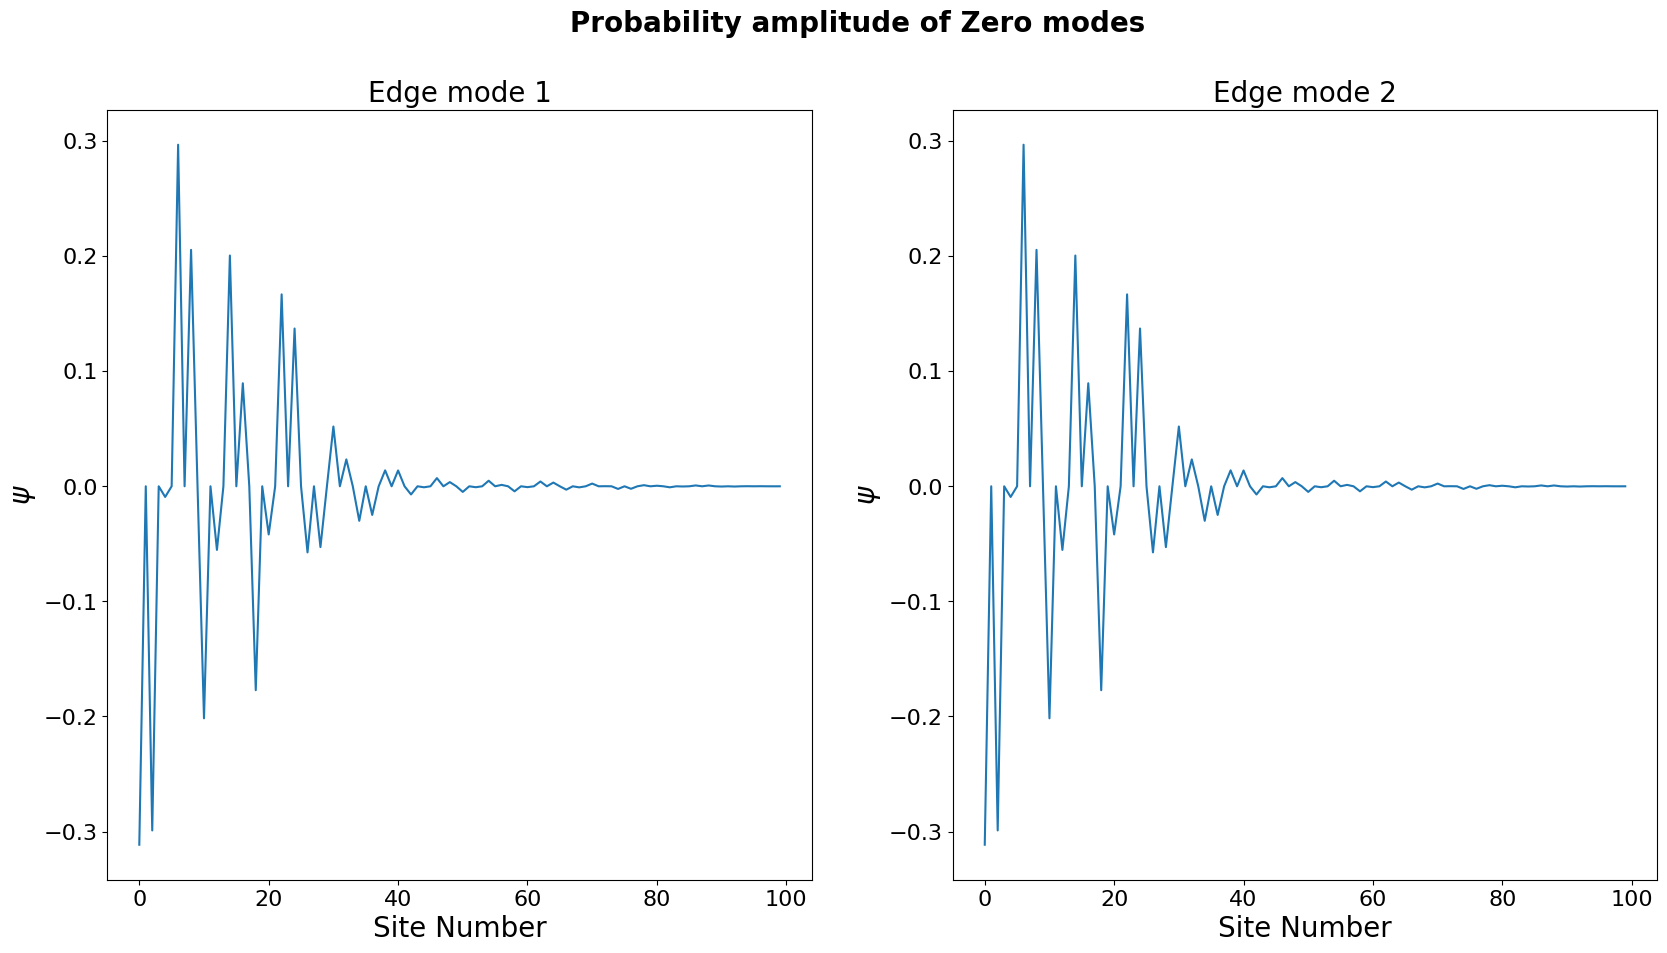

In [89]:
plot_zeromodes(evals_3_5,evecs_3_5,params_3_5, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\690145886.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


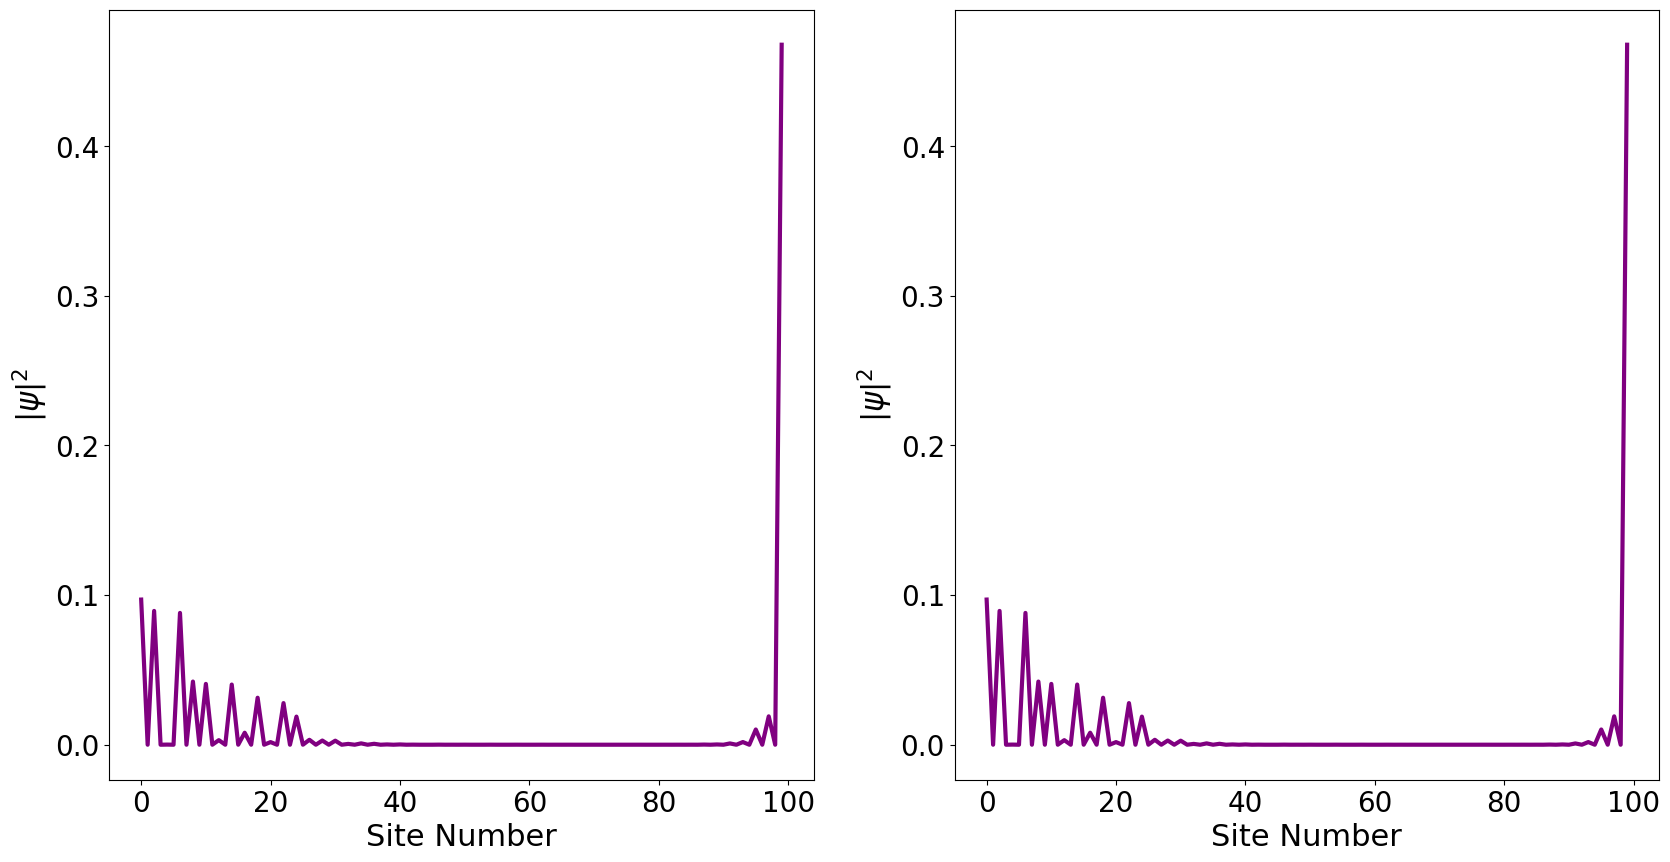

In [90]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals_3_5, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_3_5[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.25)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [91]:
# l_u = odd , v = odd 

l_u = 23
v = 17
h_6 = h(l_u, v)

params_3_6 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h_6 
}

J_x = params_3_6['J_x']
J_y = params_3_6['J_y']

In [92]:
h_6

array([1.82848659e-01, 2.13793721e-01, 2.33704490e-01, 5.47693214e-01,
       8.26392016e-01, 8.22699973e-01, 7.06520888e-04, 9.66785614e-01,
       9.89462695e-01, 9.72854988e-01, 1.33494451e-01, 6.28137311e-01,
       1.56233836e-01, 7.57021185e-02, 1.25732393e-02, 2.32163447e-01,
       7.55588236e-01, 1.89938743e-01, 5.30592477e-01, 8.02652686e-01,
       9.20408134e-02, 4.37148336e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.27132584e-01,
       9.36890488e-01, 5.17787148e-01, 9.83191315e-01, 6.69971530e-01,
       2.07017398e-01, 9.15810281e-01, 7.41253880e-01, 5.47368789e-01,
       5.93932721e-01, 8.22256981e-01])

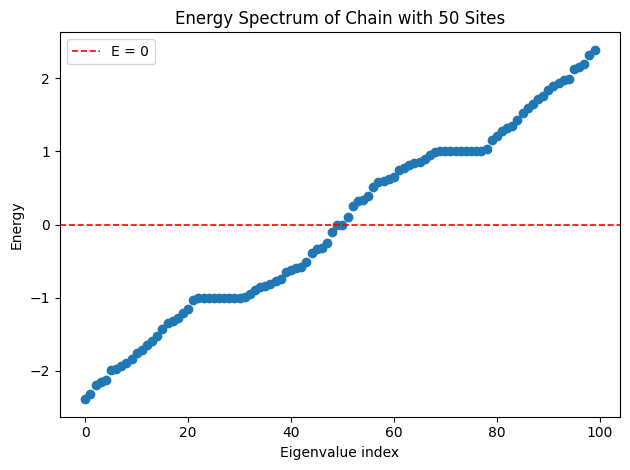

In [93]:
Hmat_3_6 = HOBC(Nsites, params_3_6)
plot_spectrum(Hmat_3_6)

In [94]:
e_threshold_3 = 1e-3
evals_3_6,evecs_3_6 = la.eigh(Hmat_3_6)
evals_3_6 = evals_3_6.real
check_zeromodes(evals_3_6, e_threshold_3)

(array([49, 50]), 2)

In [95]:
np.min(abs(evals_3_6))

np.float64(6.0205780892644124e-05)

In [96]:
zmodes_ind_3 = np.where(abs(evals_3_6) <= e_threshold_3)[0]
vec0_3_6 = evecs_3_6[:,zmodes_ind_3[0]]
vec1_3_6 = evecs_3_6[:,zmodes_ind_3[1]]
np.dot(vec0_3_6,vec1_3_6)

np.complex128(-1.0000000000000004+2.5828053999818616e-15j)

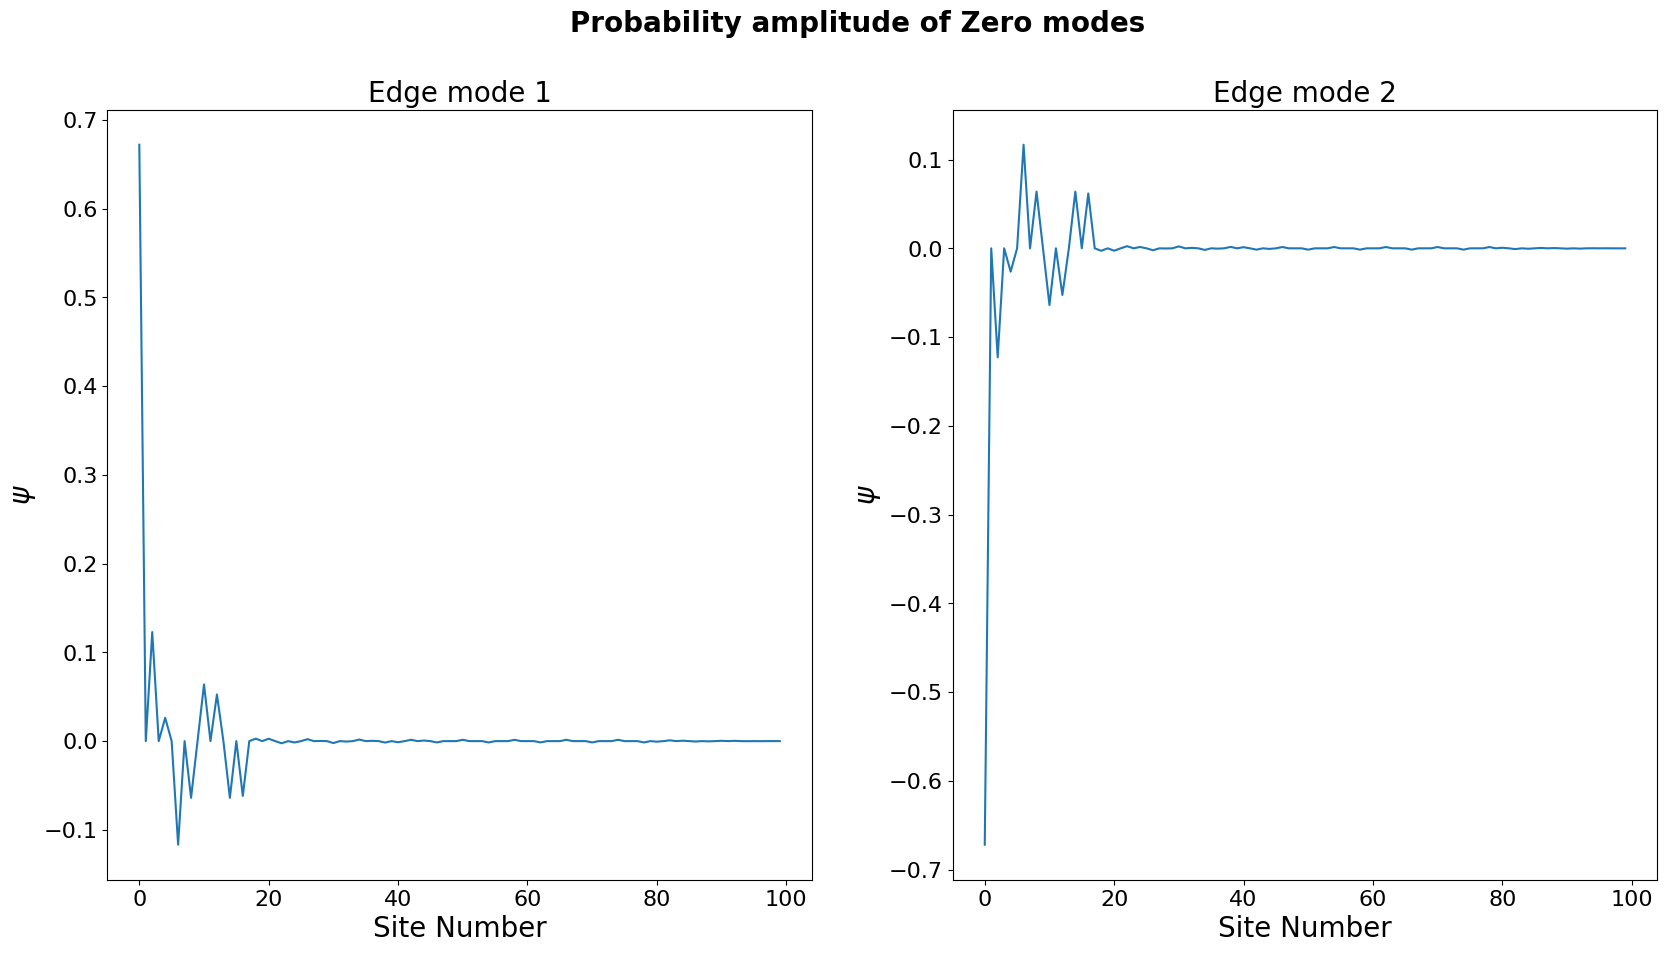

In [97]:
plot_zeromodes(evals_3_6,evecs_3_6,params_3_6, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\1916908247.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


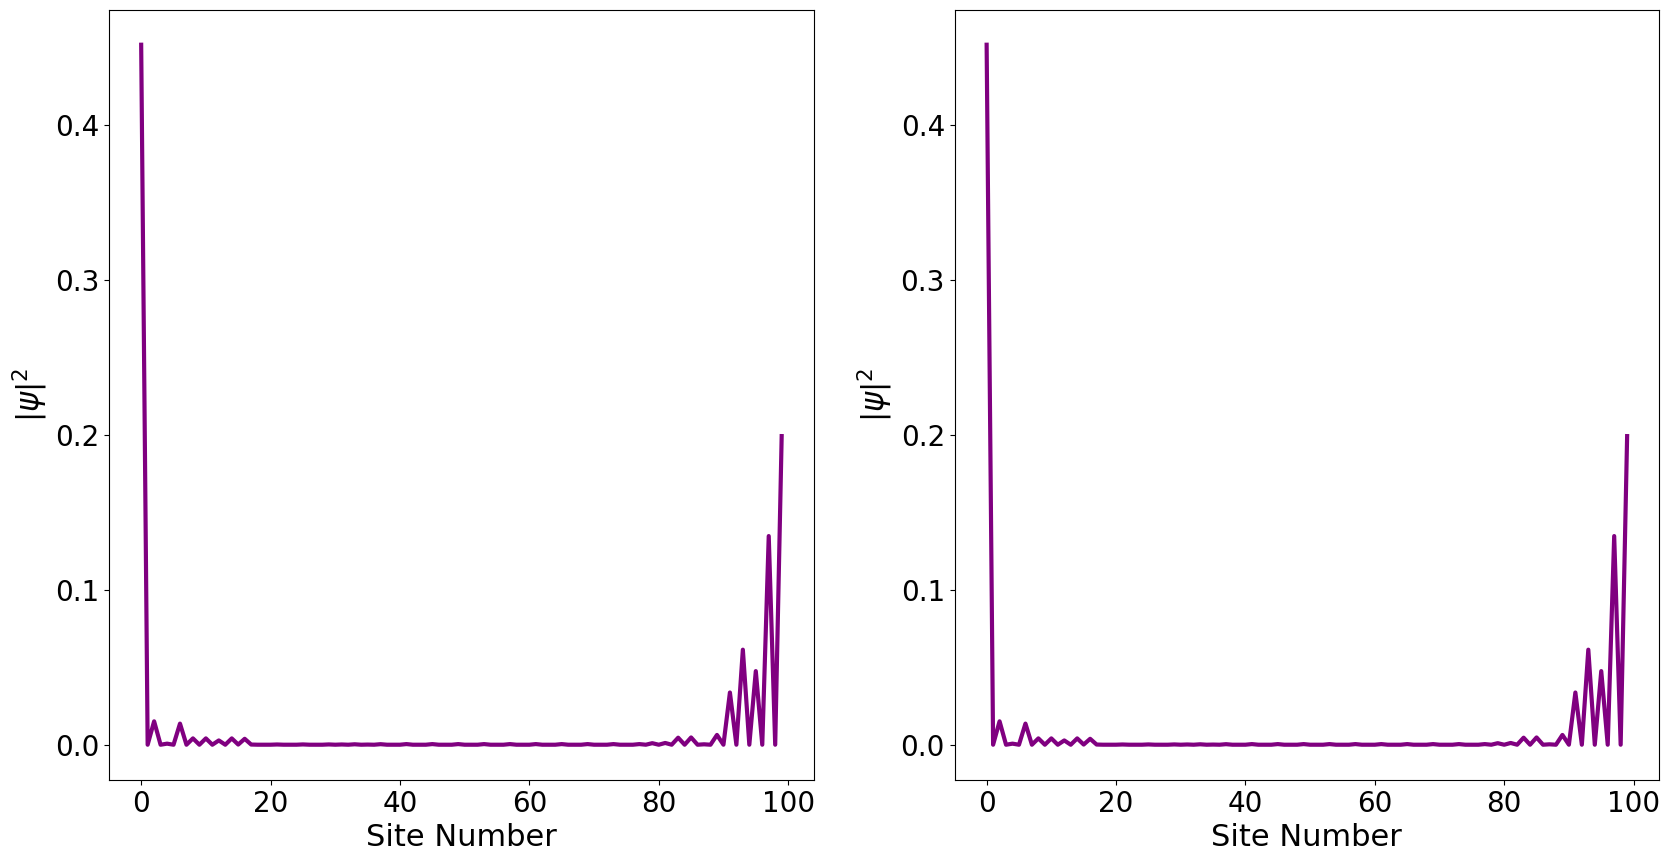

In [98]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals_3_6, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs_3_6[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.25)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [99]:
def h2(l_u1 , v1 , l_u2, v2):
    h2 = np.random.rand(Nsites)
    h2[l_u1 - 1:l_u1 + v1 - 1] = 0
    h2[l_u2 - 1:l_u2 + v2 - 1] = 0
    return h2


In [100]:
# l_u1 = even , v1 = odd , l_u2 = even, v2 = odd

l_u1 = 20
v1 = 7
l_u2 = 28
v2 = 5
h2_1 = h2(l_u1, v1, l_u2, v2)

params2_3_1 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_1 
}

J_x = params2_3_1['J_x']
J_y = params2_3_1['J_y']

In [101]:
h2_1

array([0.17704426, 0.28312708, 0.46410956, 0.74374462, 0.41665214,
       0.29785595, 0.00400703, 0.81714829, 0.30004121, 0.21570796,
       0.05015979, 0.48710833, 0.4342784 , 0.20612016, 0.05830132,
       0.90081471, 0.9678058 , 0.40917816, 0.94835621, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.61222684, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.03278432, 0.63343113, 0.30281222,
       0.65270379, 0.53506812, 0.92555061, 0.54496671, 0.52393235,
       0.53864494, 0.44878393, 0.7957719 , 0.90255526, 0.76853432,
       0.93479866, 0.28524728, 0.80286609, 0.92117532, 0.00188447])

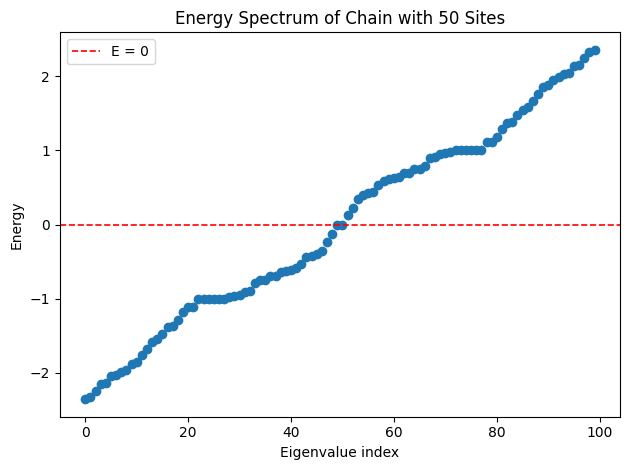

In [102]:
Hmat2_3_1 = HOBC(Nsites, params2_3_1)
plot_spectrum(Hmat2_3_1)

In [103]:
e_threshold_3 = 1e-2
evals2_3_1,evecs2_3_1 = la.eigh(Hmat2_3_1)
evals2_3_1 = evals2_3_1.real
check_zeromodes(evals2_3_1, e_threshold_3)

(array([49, 50]), 2)

In [104]:
np.min(abs(evals2_3_1))

np.float64(6.040626193538862e-08)

In [105]:
zmodes_ind_3 = np.where(abs(evals2_3_1) <= e_threshold_3)[0]
vec02_3_1 = evecs2_3_1[:,zmodes_ind_3[0]]
vec12_3_1 = evecs2_3_1[:,zmodes_ind_3[1]]
np.dot(vec02_3_1,vec12_3_1)

np.complex128(1+3.130631876873804e-16j)

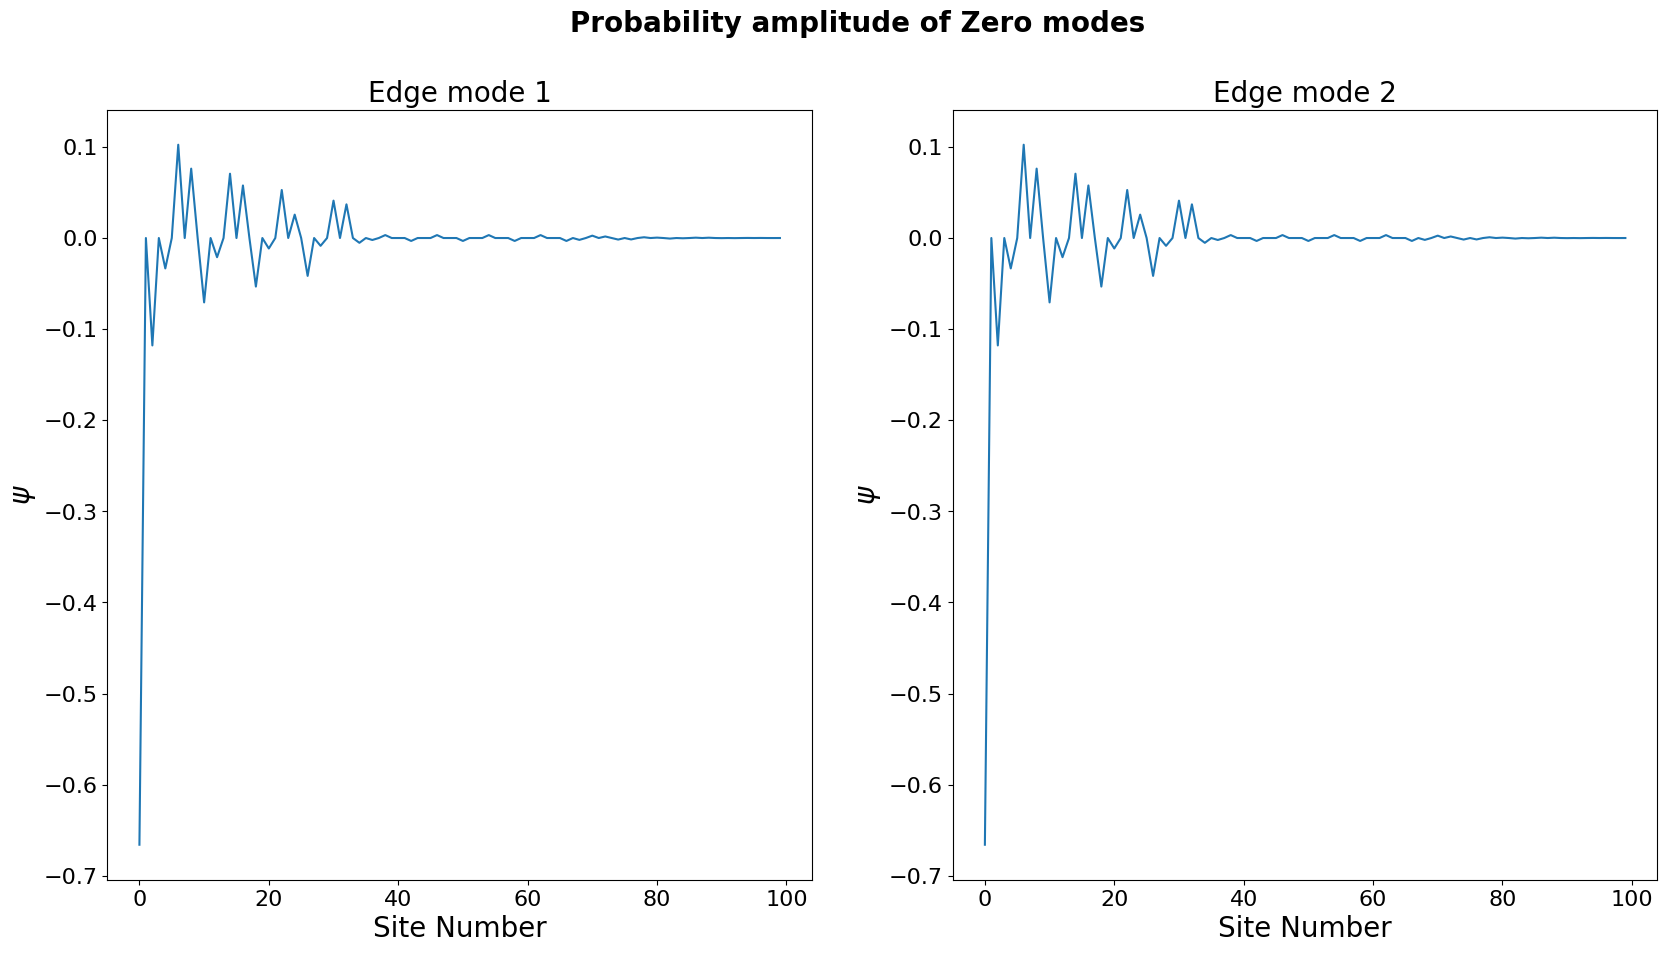

In [106]:
plot_zeromodes(evals2_3_1,evecs2_3_1,params2_3_1, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\3025998983.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


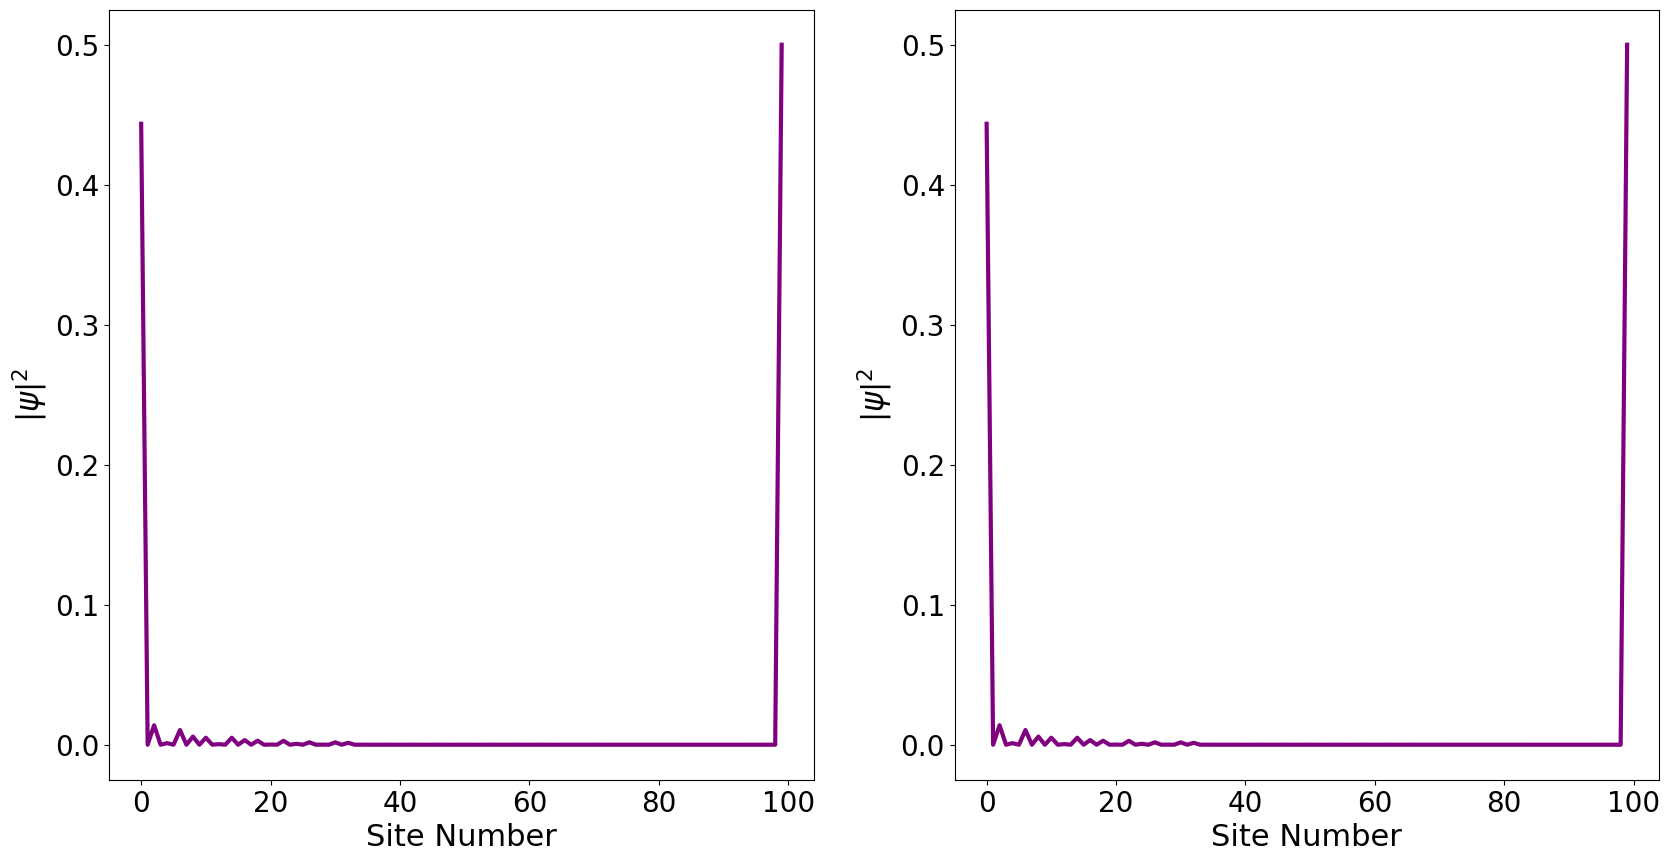

In [107]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_1, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_1[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.15)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [108]:
# l_u1 = even , v1 = odd , l_u2 = even, v2 = even

l_u1 = 20
v1 = 7
l_u2 = 28
v2 = 8
h2_2 = h2(l_u1, v1, l_u2, v2)

params2_3_2 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_2 
}

J_x = params2_3_2['J_x']
J_y = params2_3_2['J_y']

In [109]:
h2_2

array([0.94308528, 0.26185731, 0.94173128, 0.85761516, 0.68913766,
       0.80389827, 0.44774333, 0.78355759, 0.48746669, 0.28112583,
       0.59357949, 0.20070314, 0.31929934, 0.08429624, 0.81038341,
       0.63303173, 0.44314373, 0.20732607, 0.45432387, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.14182187, 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.24860062, 0.28046482, 0.69402218, 0.39265083, 0.09531729,
       0.73140749, 0.20153872, 0.79571754, 0.91040001, 0.92403816,
       0.96483864, 0.94289862, 0.43057156, 0.47191356, 0.18627414])

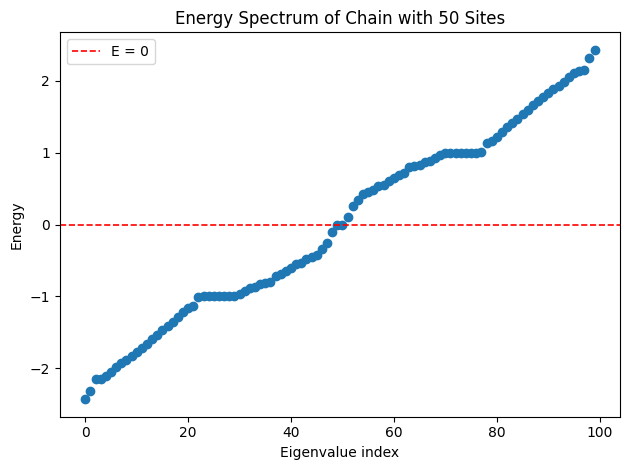

In [110]:
Hmat2_3_2 = HOBC(Nsites, params2_3_2)
plot_spectrum(Hmat2_3_2)

In [111]:
e_threshold_3 = 1e-2
evals2_3_2,evecs2_3_2 = la.eigh(Hmat2_3_2)
evals2_3_2 = evals2_3_2.real
check_zeromodes(evals2_3_2, e_threshold_3)

(array([49, 50]), 2)

In [112]:
np.min(abs(evals2_3_2))

np.float64(3.336229045896764e-05)

In [113]:
zmodes_ind_3 = np.where(abs(evals2_3_2) <= e_threshold_3)[0]
vec02_3_2 = evecs2_3_2[:,zmodes_ind_3[0]]
vec12_3_2 = evecs2_3_2[:,zmodes_ind_3[1]]
np.dot(vec02_3_2,vec12_3_2)

np.complex128(1.0000000000000004+2.351456012465445e-15j)

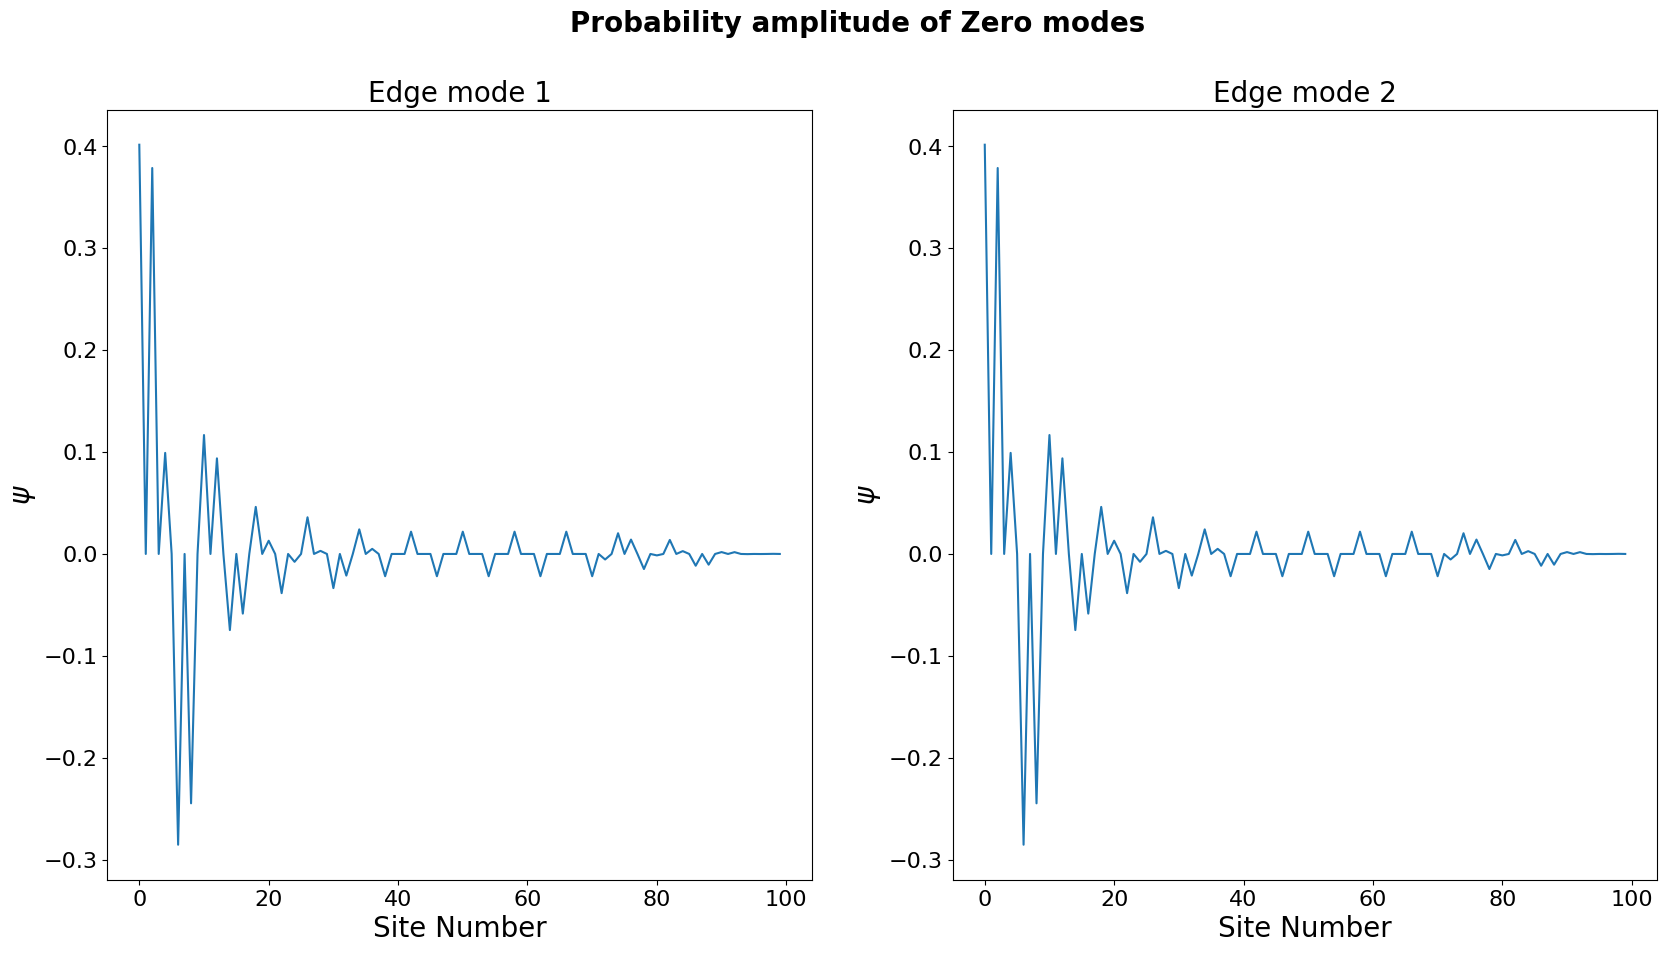

In [114]:
plot_zeromodes(evals2_3_2,evecs2_3_2,params2_3_2, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\3316958575.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


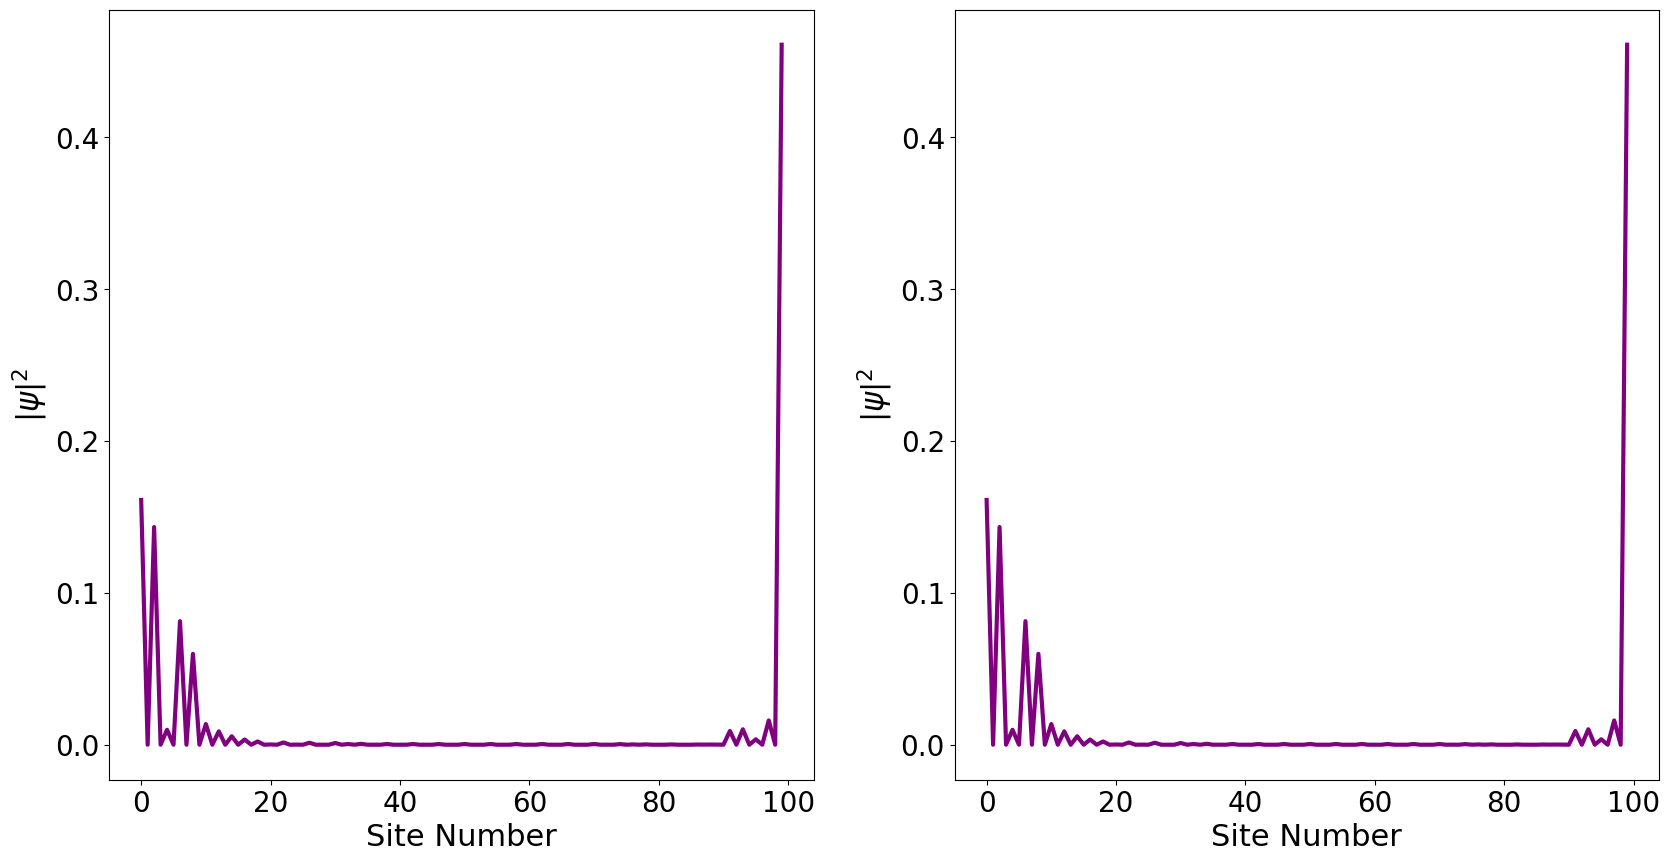

In [115]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_2, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_2[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.05)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [116]:
# l_u1 = even , v1 = even , l_u2 = odd, v2 = odd

l_u1 = 20
v1 = 8
l_u2 = 29
v2 = 7
h2_3 = h2(l_u1, v1, l_u2, v2)

params2_3_3 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_3 
}

J_x = params2_3_3['J_x']
J_y = params2_3_3['J_y']

In [117]:
h2_3

array([0.99643959, 0.19684605, 0.16491678, 0.67831809, 0.22036894,
       0.7643343 , 0.92399098, 0.9350738 , 0.65362978, 0.55194344,
       0.79842296, 0.81188912, 0.80276269, 0.85477809, 0.05202193,
       0.82570652, 0.73313911, 0.61589901, 0.56791877, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.20602898, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.49020493, 0.39840683, 0.72791123, 0.57457023, 0.96833784,
       0.42522426, 0.92721216, 0.59176153, 0.72554888, 0.5990178 ,
       0.57405413, 0.03878551, 0.93841962, 0.94356133, 0.18931952])

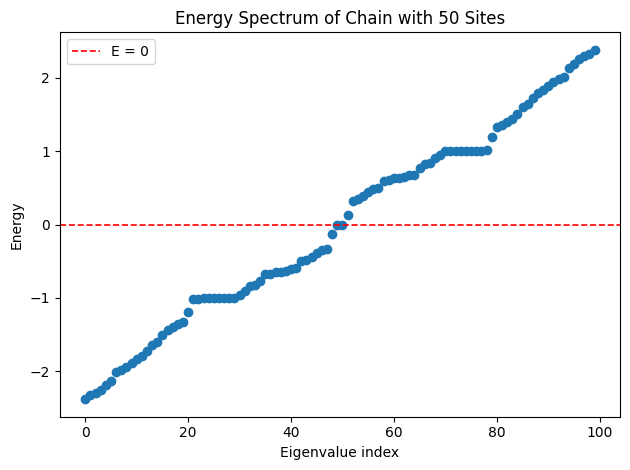

In [118]:
Hmat2_3_3 = HOBC(Nsites, params2_3_3)
plot_spectrum(Hmat2_3_3)

In [119]:
e_threshold_3 = 1e-1
evals2_3_3,evecs2_3_3 = la.eigh(Hmat2_3_3)
evals2_3_3 = evals2_3_3.real
check_zeromodes(evals2_3_3, e_threshold_3)

(array([49, 50]), 2)

In [120]:
np.min(abs(evals2_3_3))

np.float64(3.0115748809923627e-06)

In [121]:
zmodes_ind_3 = np.where(abs(evals2_3_3) <= e_threshold_3)[0]
vec02_3_3 = evecs2_3_3[:,zmodes_ind_3[0]]
vec12_3_3 = evecs2_3_3[:,zmodes_ind_3[1]]
np.dot(vec02_3_3,vec12_3_3)

np.complex128(-1-4.531436215363837e-16j)

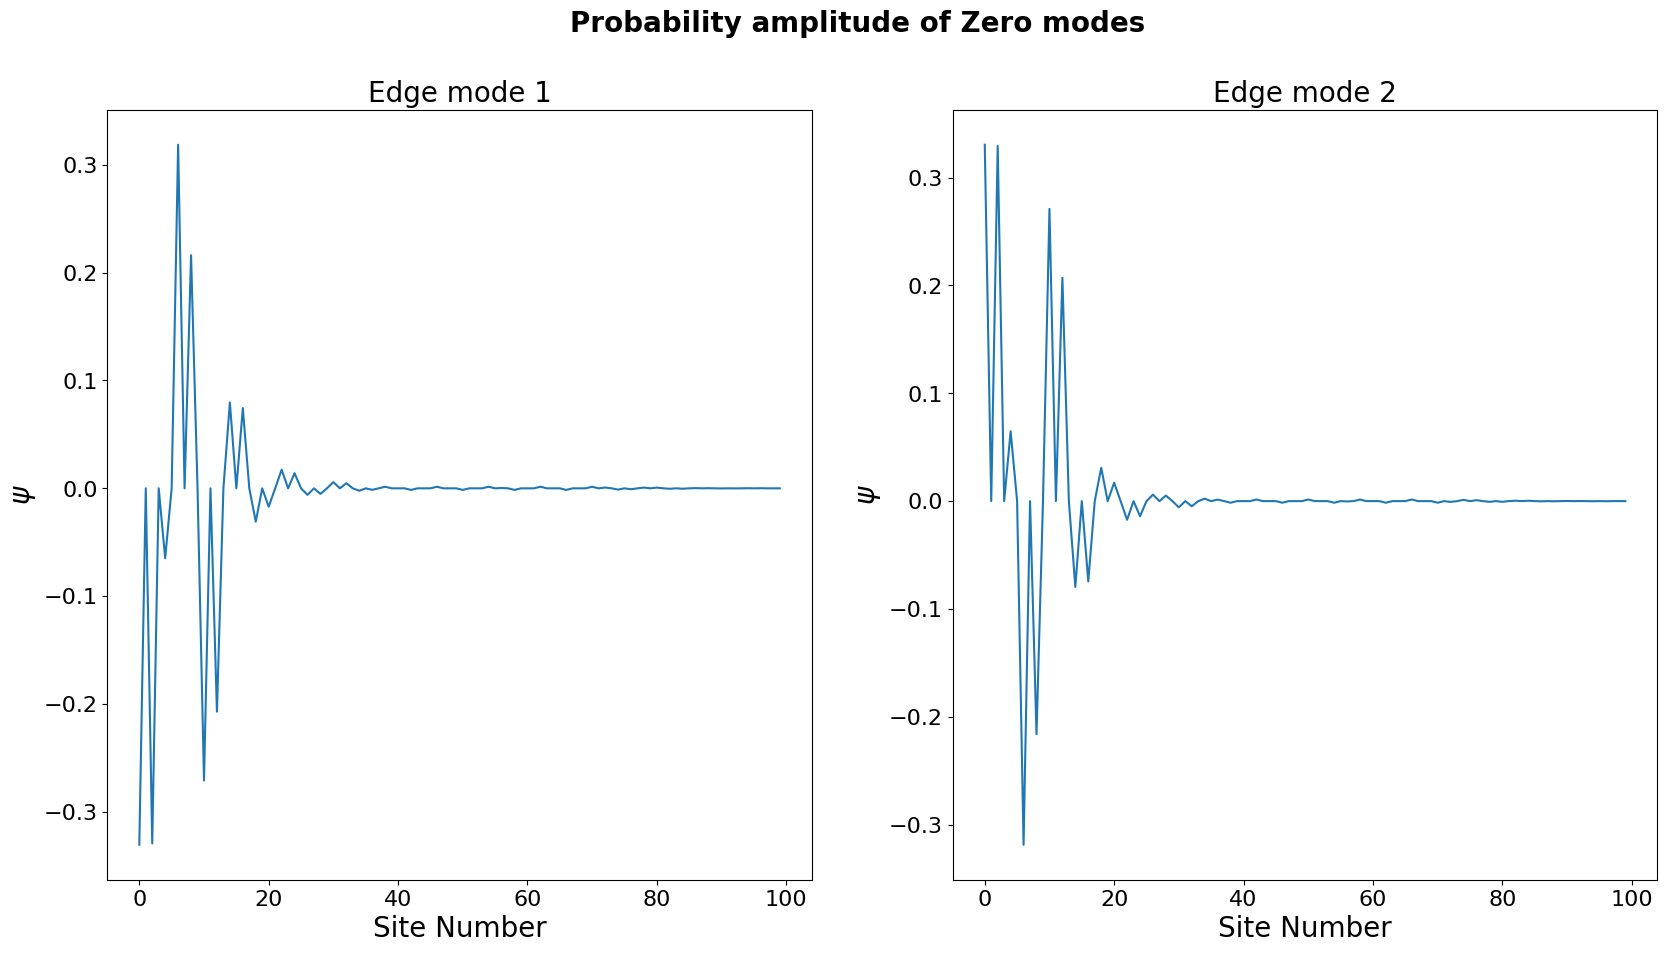

In [122]:
plot_zeromodes(evals2_3_3,evecs2_3_3,params2_3_3, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\3529214512.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


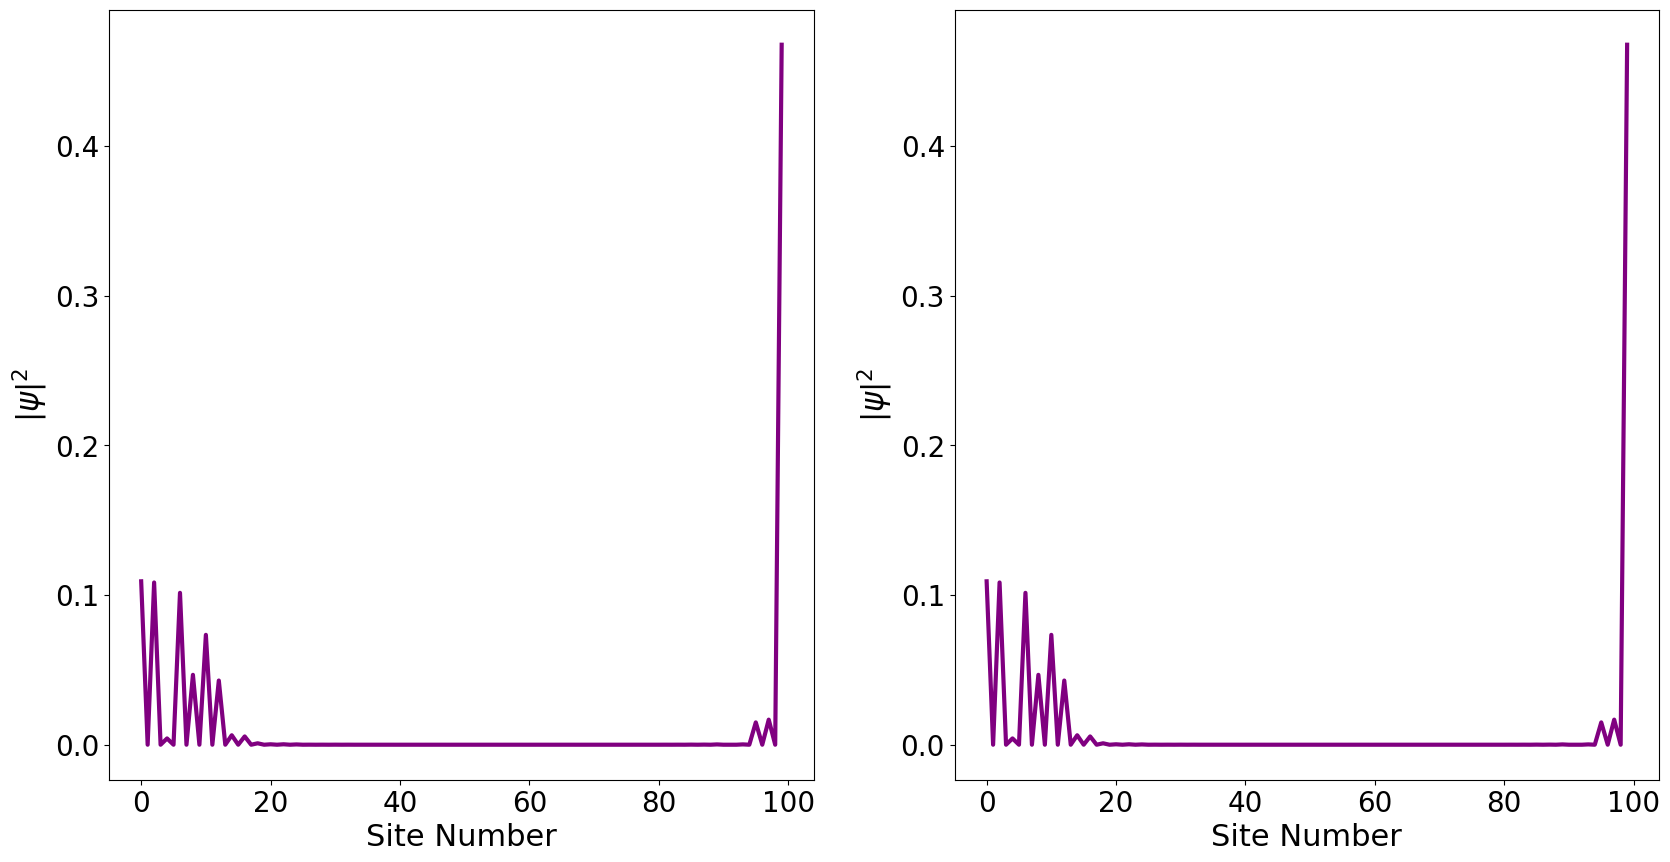

In [123]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_3, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_3[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.02)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [124]:
# l_u1 = even , v1 = even , l_u2 = odd, v2 = even

l_u1 = 20
v1 = 8
l_u2 = 29
v2 = 6
h2_4 = h2(l_u1, v1, l_u2, v2)

params2_3_4 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_4 
}

J_x = params2_3_4['J_x']
J_y = params2_3_4['J_y']

In [125]:
h2_4

array([0.55300101, 0.53871641, 0.16502833, 0.03344014, 0.1896924 ,
       0.55268128, 0.63263357, 0.41822778, 0.63112967, 0.05388238,
       0.6787937 , 0.19661558, 0.97081048, 0.44328012, 0.41913486,
       0.92205434, 0.81405555, 0.97871223, 0.71308237, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.18715469, 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.38030844,
       0.0057388 , 0.08961436, 0.73017005, 0.59172132, 0.39386367,
       0.57976693, 0.7239554 , 0.52281253, 0.56841595, 0.10058068,
       0.36726711, 0.46690982, 0.91116174, 0.01529954, 0.09639919])

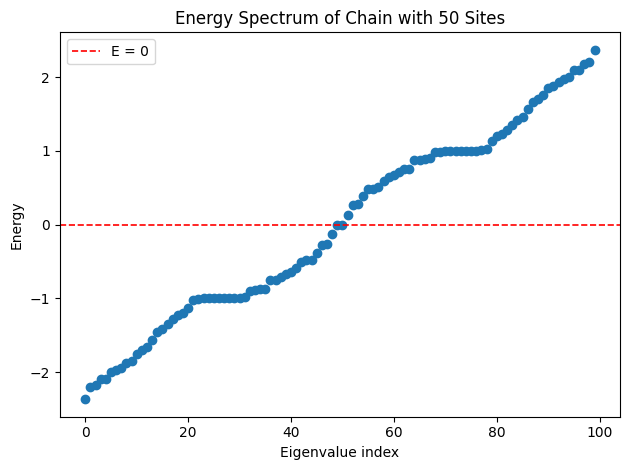

In [126]:
Hmat2_3_4 = HOBC(Nsites, params2_3_4)
plot_spectrum(Hmat2_3_4)

In [127]:
e_threshold_3 = 1e-3
evals2_3_4,evecs2_3_4 = la.eigh(Hmat2_3_4)
evals2_3_4 = evals2_3_4.real
check_zeromodes(evals2_3_4, e_threshold_3)

(array([49, 50]), 2)

In [128]:
np.min(abs(evals2_3_4))

np.float64(0.000149524057438533)

In [129]:
zmodes_ind_3 = np.where(abs(evals2_3_4) <= e_threshold_3)[0]
vec02_3_4 = evecs2_3_4[:,zmodes_ind_3[0]]
vec12_3_4 = evecs2_3_4[:,zmodes_ind_3[1]]
np.dot(vec02_3_4,vec12_3_4)

np.complex128(-1.0000000000000007-1.073901395630221e-15j)

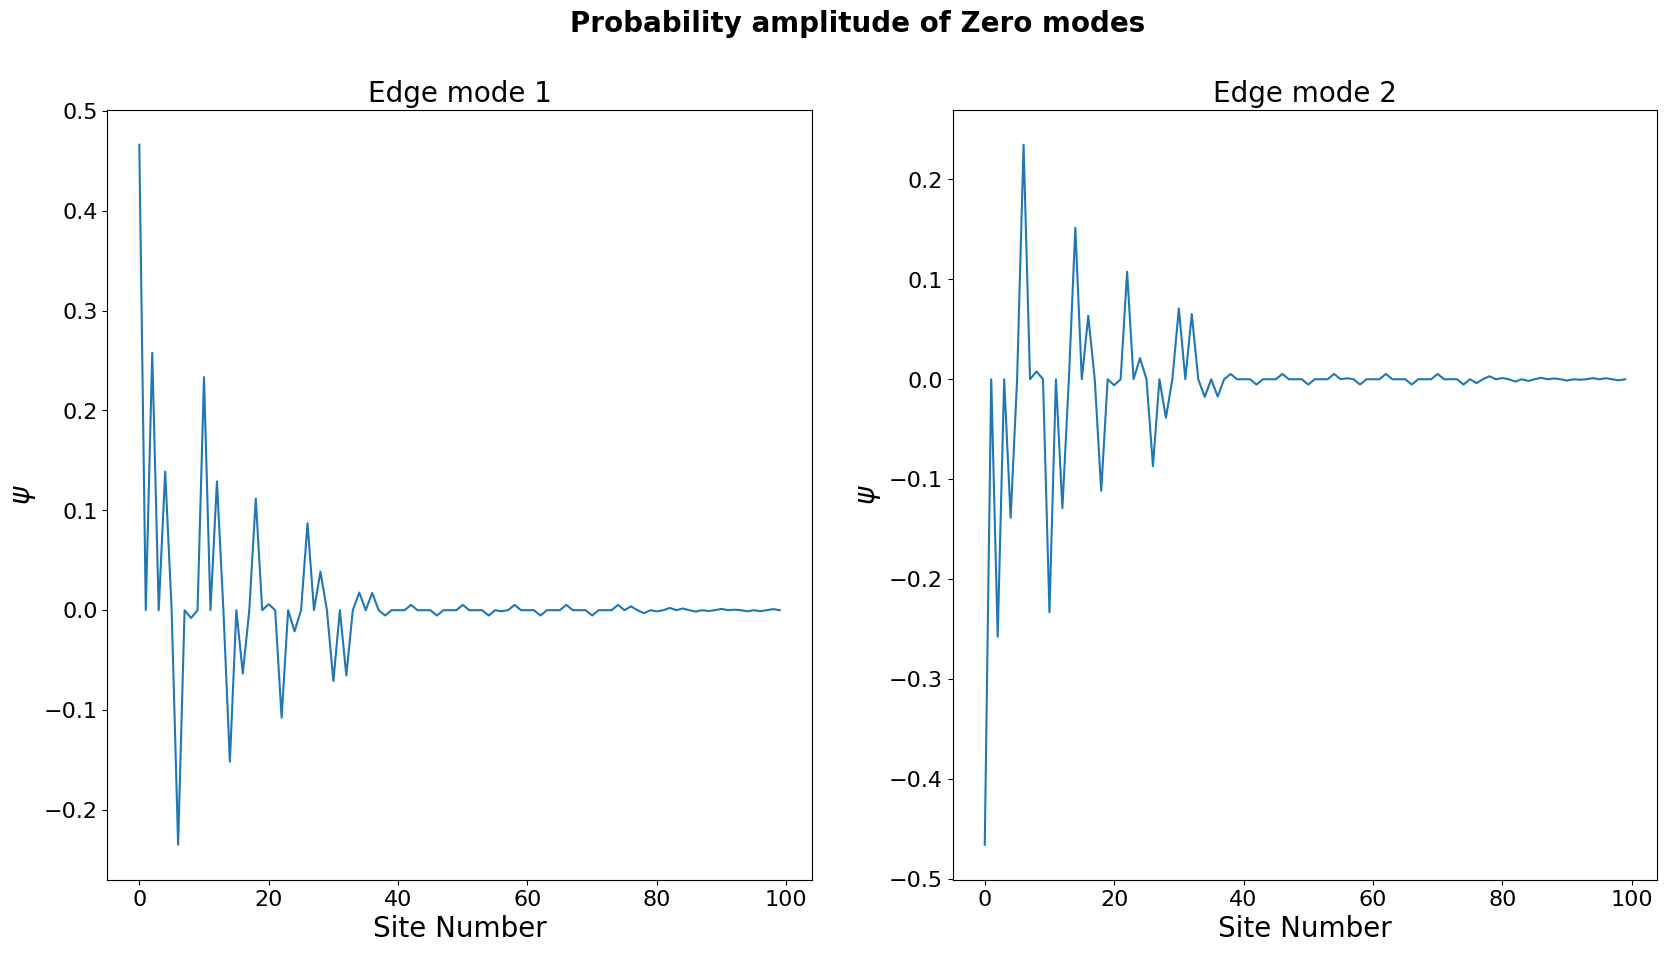

In [130]:
plot_zeromodes(evals2_3_4,evecs2_3_4,params2_3_4, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\106361105.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


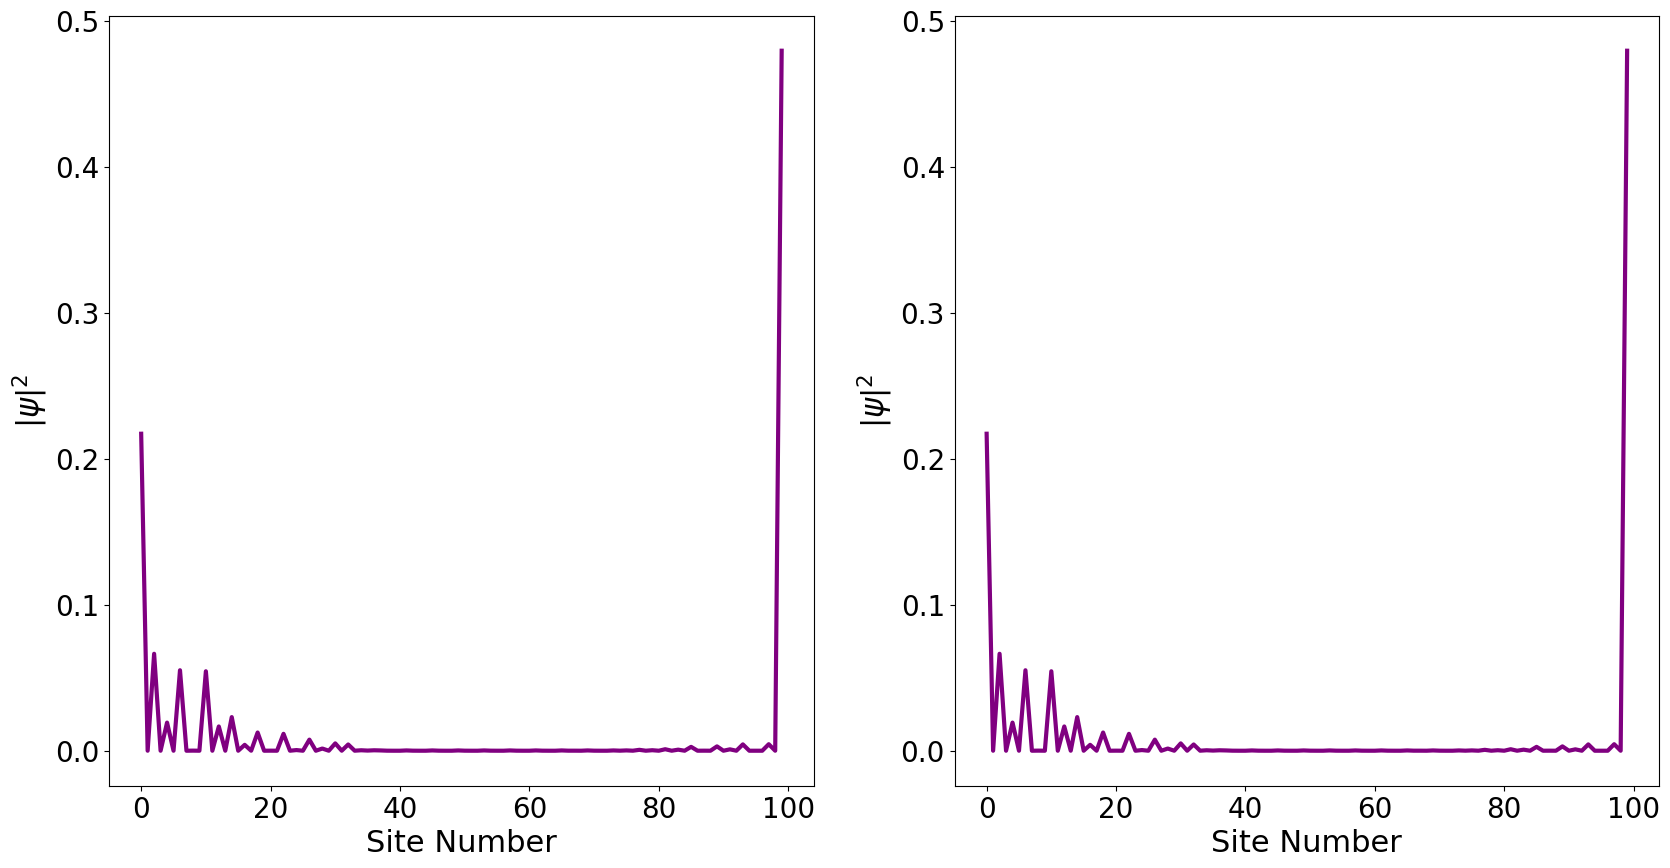

In [131]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_4, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_4[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.1)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [132]:
# l_u1 = odd , v1 = odd , l_u2 = odd, v2 = odd

l_u1 = 21
v1 = 9
l_u2 = 31
v2 = 7
h2_5 = h2(l_u1, v1, l_u2, v2)

params2_3_5 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_5 
}

J_x = params2_3_5['J_x']
J_y = params2_3_5['J_y']

In [133]:
h2_5

array([0.01062772, 0.32000414, 0.07710052, 0.35227031, 0.54886084,
       0.77745452, 0.87527967, 0.35367573, 0.42763311, 0.70049686,
       0.58429816, 0.12343161, 0.43621253, 0.30024626, 0.26620443,
       0.85926401, 0.79661307, 0.7515538 , 0.67520601, 0.35964115,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.43865352,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.71718806, 0.78070403, 0.61516177,
       0.89406267, 0.81313263, 0.04412592, 0.73042882, 0.22791296,
       0.68062447, 0.52375358, 0.53331409, 0.6617226 , 0.32618971])

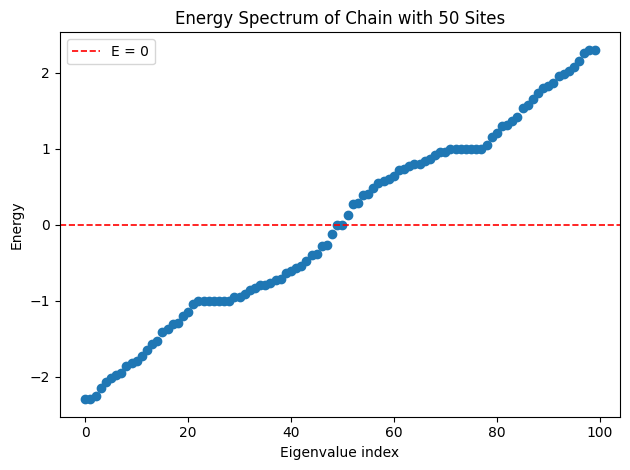

In [134]:
Hmat2_3_5 = HOBC(Nsites, params2_3_5)
plot_spectrum(Hmat2_3_5)

In [135]:
e_threshold_3 = 1e-2
evals2_3_5,evecs2_3_5 = la.eigh(Hmat2_3_5)
evals2_3_5 = evals2_3_5.real
check_zeromodes(evals2_3_5, e_threshold_3)

(array([49, 50]), 2)

In [136]:
np.min(abs(evals2_3_5))

np.float64(3.4717543031408157e-06)

In [137]:
zmodes_ind_3 = np.where(abs(evals2_3_5) <= e_threshold_3)[0]
vec02_3_5 = evecs2_3_5[:,zmodes_ind_3[0]]
vec12_3_5 = evecs2_3_5[:,zmodes_ind_3[1]]
np.dot(vec02_3_5,vec12_3_5)

np.complex128(-1.0000000000000004-2.5025546313421663e-15j)

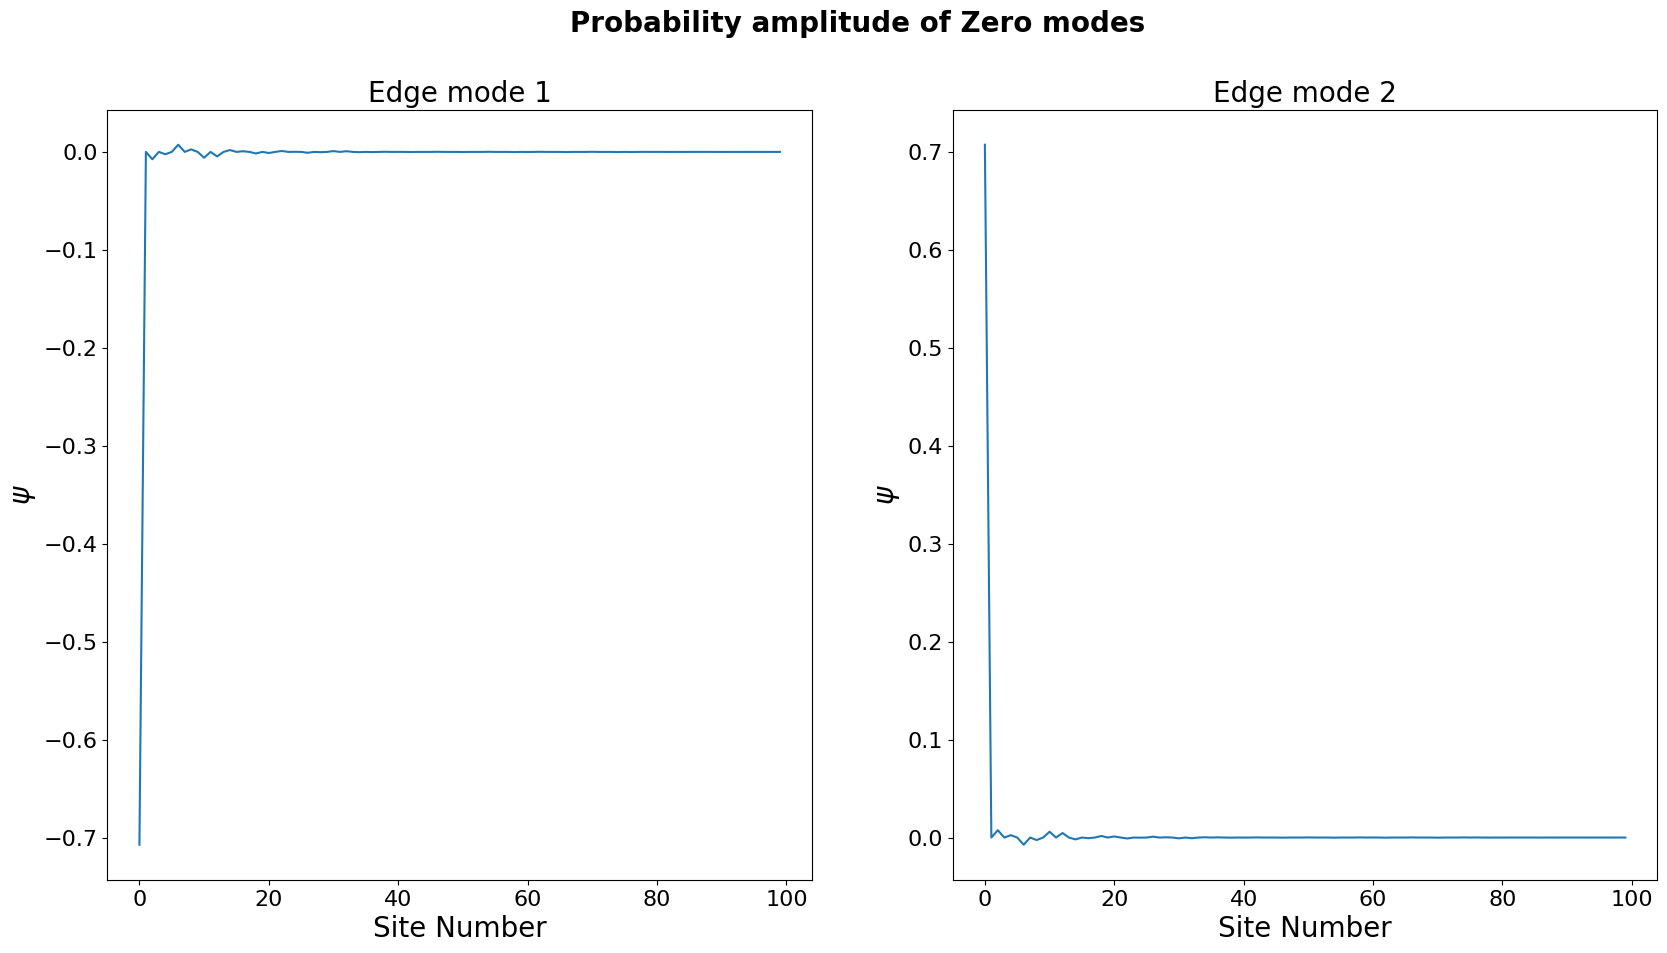

In [138]:
plot_zeromodes(evals2_3_5,evecs2_3_5,params2_3_5, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\2317615210.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


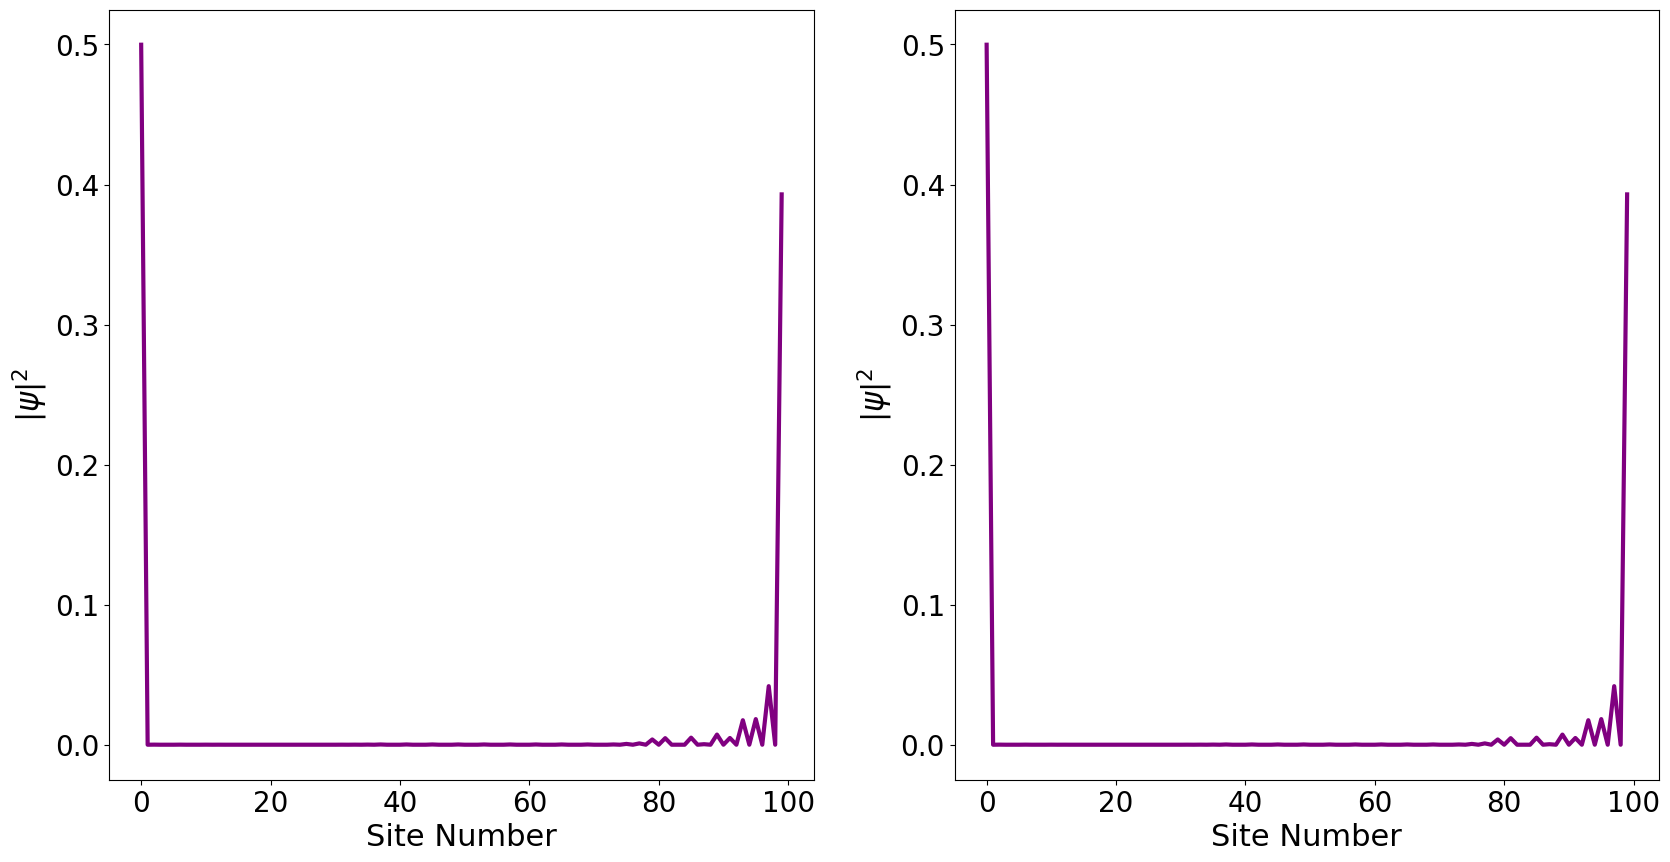

In [139]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_5, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_5[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.05)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [140]:
# l_u1 = odd , v1 = odd , l_u2 = odd, v2 = even

l_u1 = 21
v1 = 9
l_u2 = 31
v2 = 6
h2_6 = h2(l_u1, v1, l_u2, v2)

params2_3_6 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_6 
}

J_x = params2_3_6['J_x']
J_y = params2_3_6['J_y']

In [141]:
h2_6

array([8.96751408e-01, 8.44004201e-01, 9.11448444e-01, 6.82288140e-01,
       4.62512314e-01, 6.37593042e-01, 6.47501482e-01, 7.95772830e-02,
       3.33459599e-02, 4.87306530e-01, 6.45352777e-01, 1.27122671e-01,
       7.50276191e-01, 3.94403246e-01, 1.38608488e-01, 4.89724083e-04,
       6.43619401e-01, 6.23118448e-01, 3.86193366e-01, 1.55006154e-01,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 2.81320467e-01, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       6.24934854e-01, 6.23548967e-01, 1.62396118e-01, 5.21200177e-01,
       8.09664609e-01, 3.69666659e-01, 2.43329022e-02, 6.59676139e-02,
       5.44786714e-01, 9.77400264e-01, 8.93397011e-01, 7.62969297e-01,
       2.80158502e-01, 2.68860893e-01])

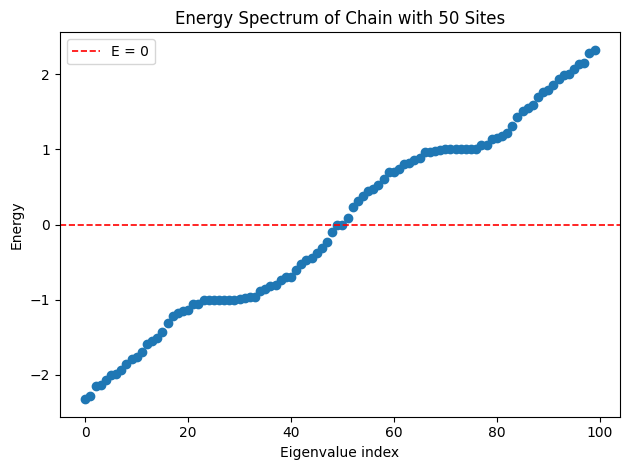

In [142]:
Hmat2_3_6 = HOBC(Nsites, params2_3_6)
plot_spectrum(Hmat2_3_6)

In [143]:
e_threshold_3 = 1e-2
evals2_3_6,evecs2_3_6 = la.eigh(Hmat2_3_6)
evals2_3_6 = evals2_3_6.real
check_zeromodes(evals2_3_6, e_threshold_3)

(array([49, 50]), 2)

In [144]:
np.min(abs(evals2_3_6))

np.float64(0.00028711118932209153)

In [145]:
zmodes_ind_3 = np.where(abs(evals2_3_6) <= e_threshold_3)[0]
vec02_3_6 = evecs2_3_6[:,zmodes_ind_3[0]]
vec12_3_6 = evecs2_3_6[:,zmodes_ind_3[1]]
np.dot(vec02_3_6,vec12_3_6)

np.complex128(-0.9999999999999999-4.001441349466436e-16j)

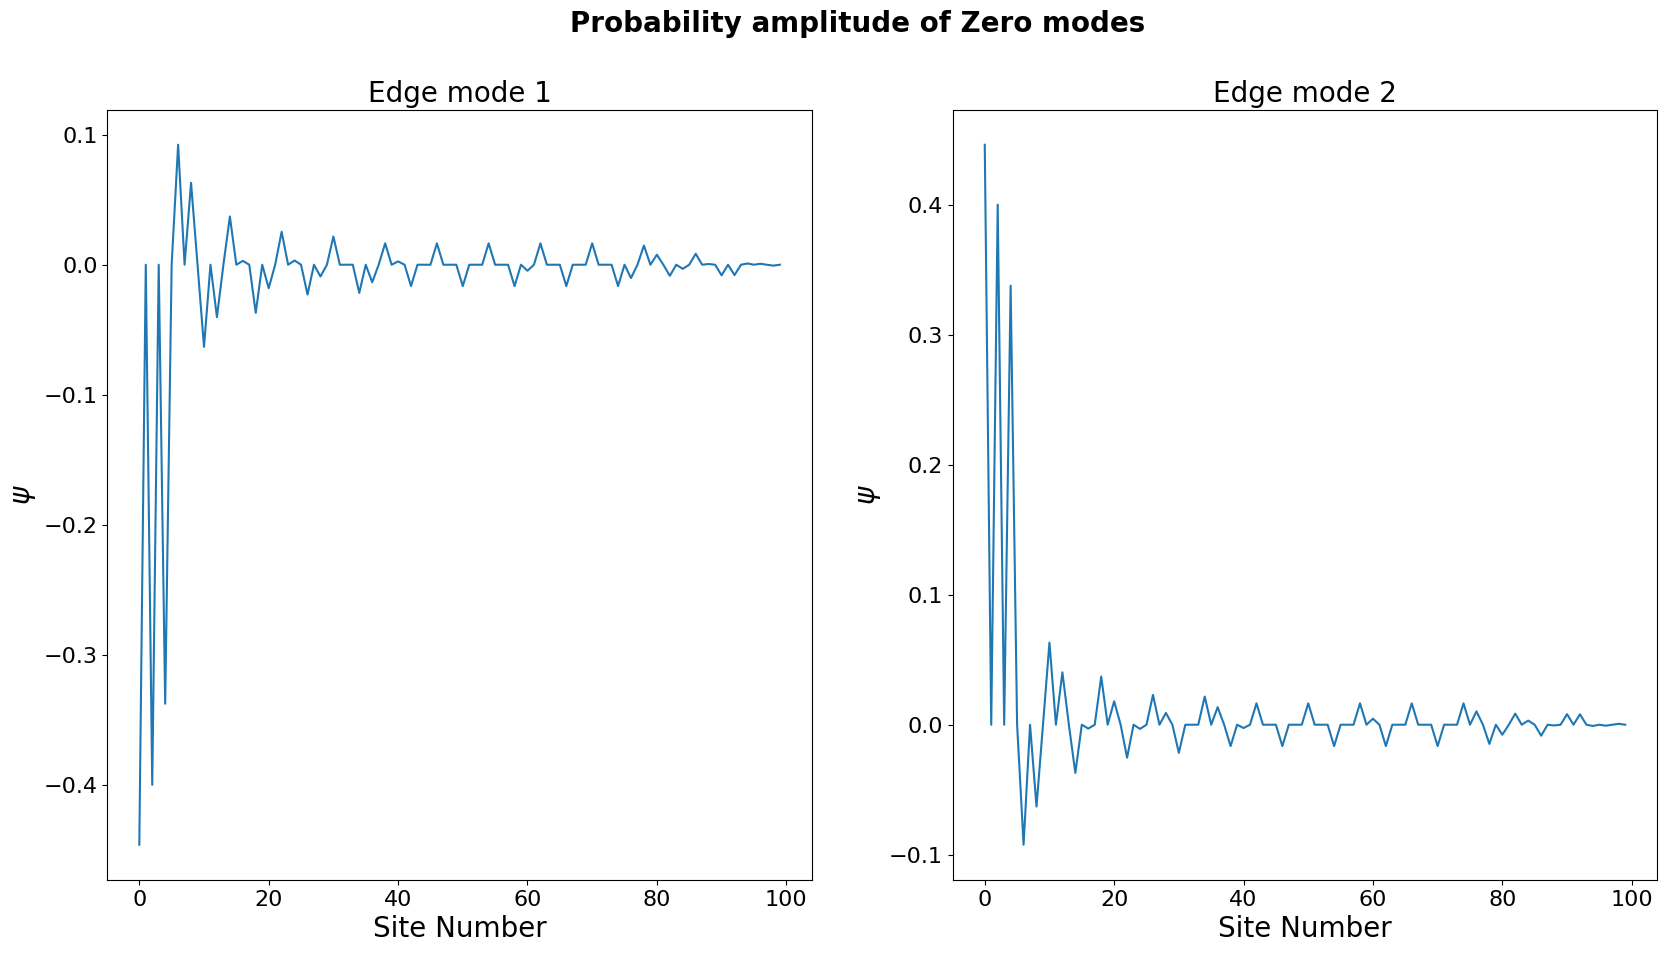

In [146]:
plot_zeromodes(evals2_3_6,evecs2_3_6,params2_3_6, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\1709847519.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


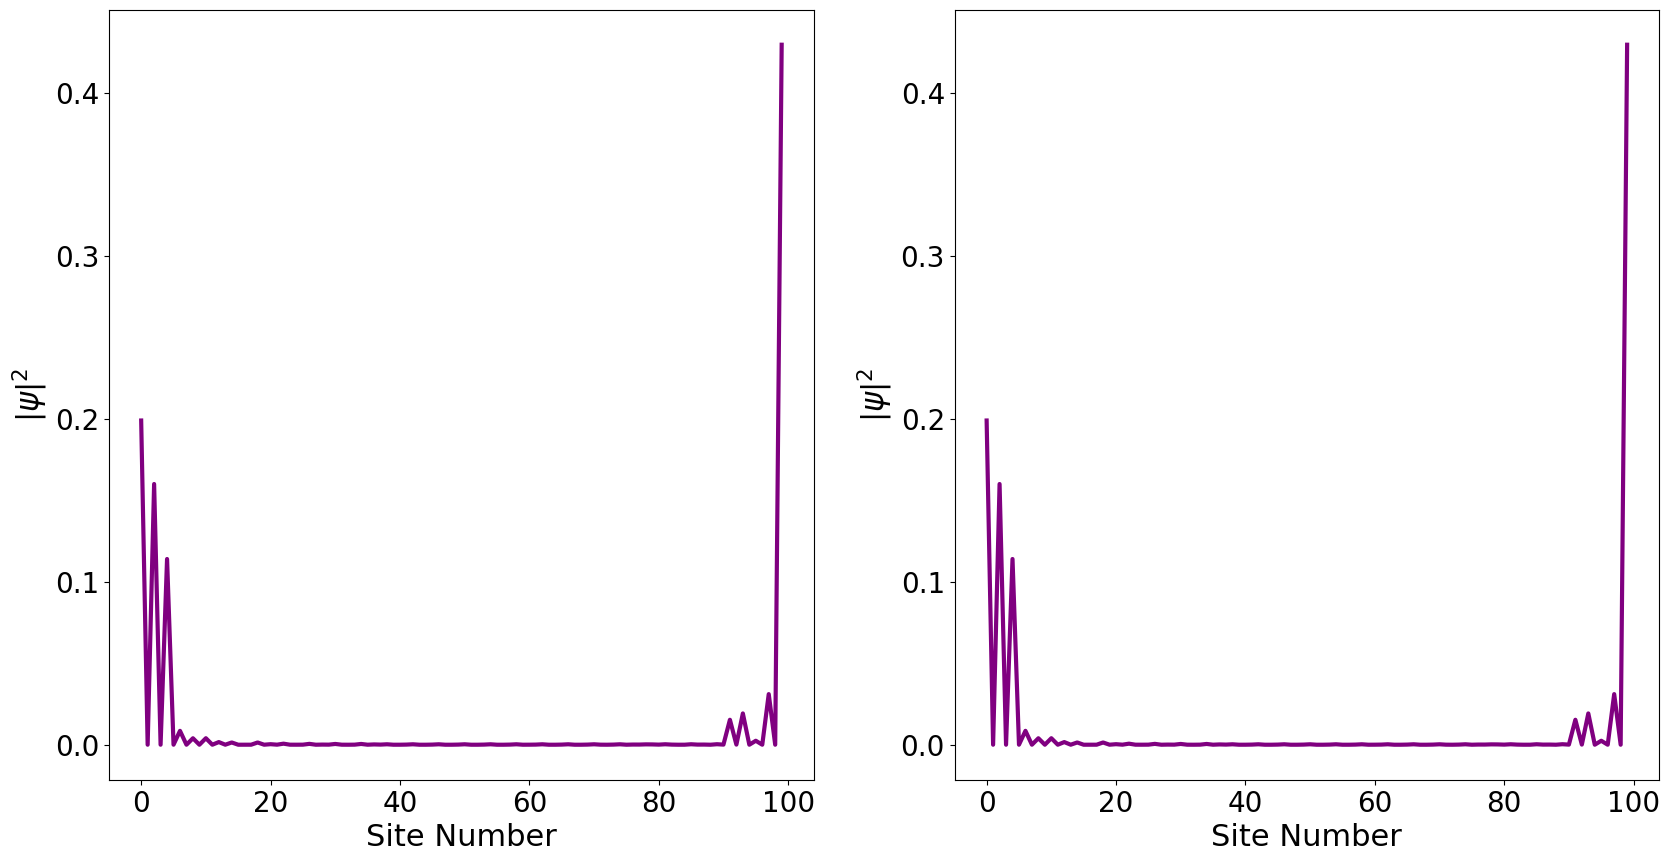

In [147]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_6, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_6[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.1)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [148]:
# l_u1 = odd , v1 = even , l_u2 = even, v2 = odd

l_u1 = 21
v1 = 8
l_u2 = 30
v2 = 5
h2_7 = h2(l_u1, v1, l_u2, v2)

params2_3_7 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_7 
}

J_x = params2_3_7['J_x']
J_y = params2_3_7['J_y']

In [149]:
h2_7

array([0.9360592 , 0.98503601, 0.17302089, 0.8617137 , 0.08402155,
       0.80302776, 0.30888396, 0.33980918, 0.92983902, 0.16144782,
       0.08093295, 0.20051024, 0.36169992, 0.67707244, 0.15884993,
       0.54240486, 0.23638058, 0.17619974, 0.36480134, 0.07468939,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.64034199, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.39379419,
       0.68522127, 0.6915297 , 0.24567352, 0.19075147, 0.78890302,
       0.20446481, 0.63537048, 0.28154494, 0.97296276, 0.59996031,
       0.32537052, 0.50359582, 0.47225438, 0.55575783, 0.23154803])

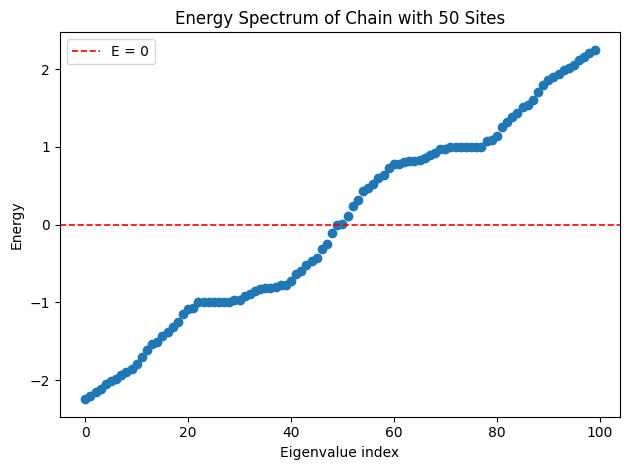

In [150]:
Hmat2_3_7 = HOBC(Nsites, params2_3_7)
plot_spectrum(Hmat2_3_7)

In [151]:
e_threshold_3 = 1e-2
evals2_3_7,evecs2_3_7 = la.eigh(Hmat2_3_7)
evals2_3_7 = evals2_3_7.real
check_zeromodes(evals2_3_7, e_threshold_3)

(array([49, 50]), 2)

In [152]:
np.min(abs(evals2_3_7))

np.float64(0.0018913043167323737)

In [153]:
zmodes_ind_3 = np.where(abs(evals2_3_7) <= e_threshold_3)[0]
vec02_3_7 = evecs2_3_7[:,zmodes_ind_3[0]]
vec12_3_7 = evecs2_3_7[:,zmodes_ind_3[1]]
np.dot(vec02_3_7,vec12_3_7)

np.complex128(-1-2.0286253494703608e-15j)

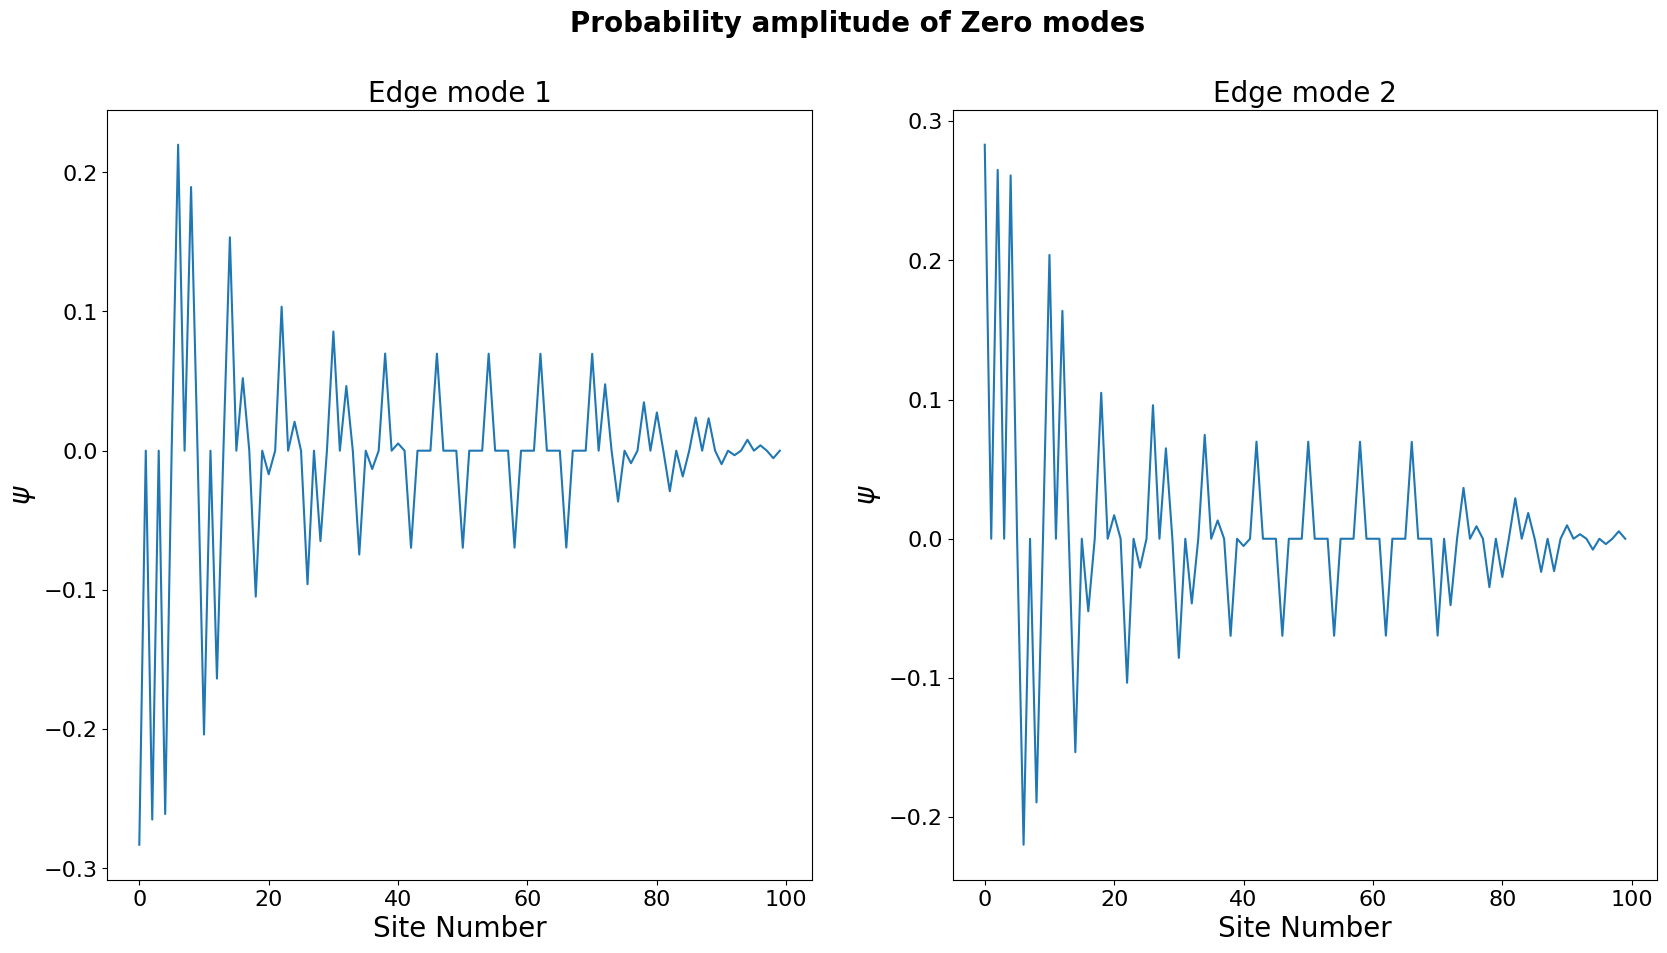

In [154]:
plot_zeromodes(evals2_3_7,evecs2_3_7,params2_3_7, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\1580156458.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


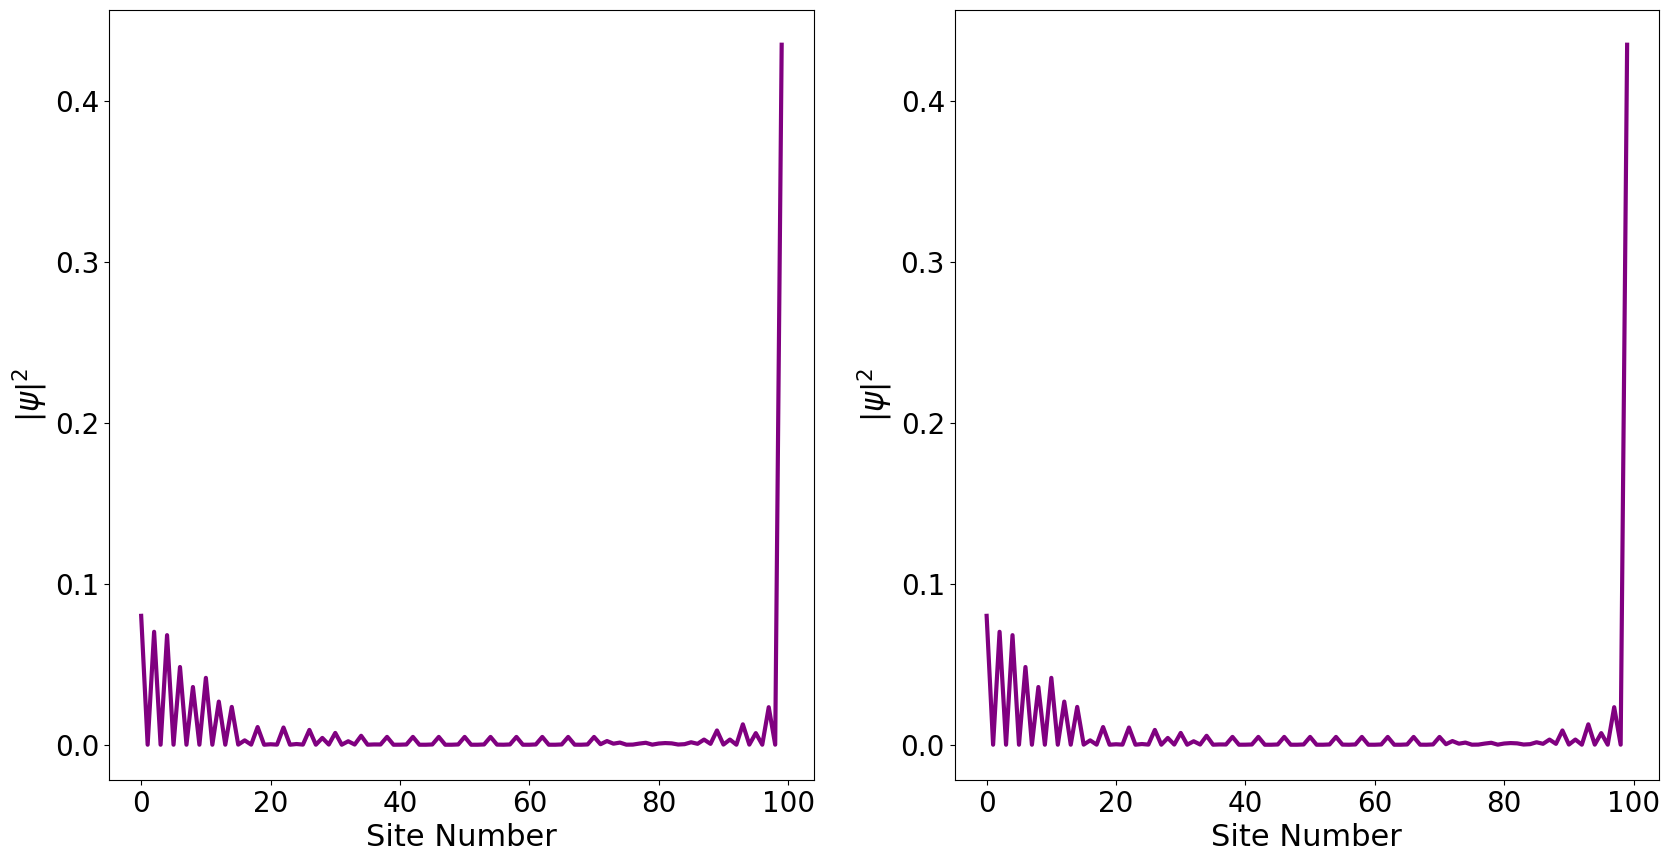

In [155]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_7, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_7[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.08)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()

In [156]:
# l_u1 = odd , v1 = even , l_u2 = even, v2 = even

l_u1 = 21
v1 = 8
l_u2 = 30
v2 = 6
h2_8 = h2(l_u1, v1, l_u2, v2)

params2_3_8 = {
    # 'J_x' : np.random.rand(Nsites-1),
    # 'J_y' : np.random.rand(int(Nsites/2)-1),
    'J_x' : np.ones(Nsites-1),
    'J_y' : np.ones(int(Nsites/2)-1),
    'h' : h2_8 
}

J_x = params2_3_8['J_x']
J_y = params2_3_8['J_y']

In [157]:
h2_8

array([0.75442865, 0.26686086, 0.53311644, 0.3741328 , 0.66335429,
       0.71708578, 0.39107171, 0.6551133 , 0.37581313, 0.3798637 ,
       0.35846609, 0.68892778, 0.70819559, 0.42687207, 0.6551448 ,
       0.50527681, 0.38611092, 0.93850768, 0.18337164, 0.89114821,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.92927929, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.36134323, 0.31495007, 0.81665019, 0.4658162 , 0.41703602,
       0.48456064, 0.57629668, 0.59244037, 0.90354839, 0.32383852,
       0.40318791, 0.20881616, 0.782693  , 0.92172627, 0.7831102 ])

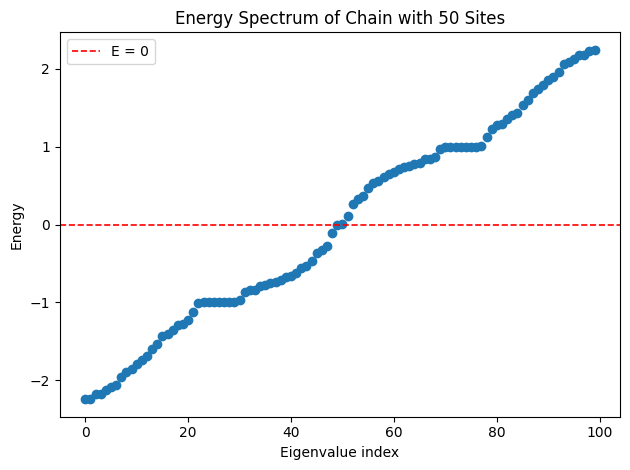

In [158]:
Hmat2_3_8 = HOBC(Nsites, params2_3_8)
plot_spectrum(Hmat2_3_8)

In [159]:
e_threshold_3 = 1e-3
evals2_3_8,evecs2_3_8 = la.eigh(Hmat2_3_8)
evals2_3_8 = evals2_3_8.real
check_zeromodes(evals2_3_8, e_threshold_3)

(array([49, 50]), 2)

In [160]:
np.min(abs(evals2_3_8))

np.float64(0.0008938954282989891)

In [161]:
zmodes_ind_3 = np.where(abs(evals2_3_8) <= e_threshold_3)[0]
vec02_3_8 = evecs2_3_8[:,zmodes_ind_3[0]]
vec12_3_8 = evecs2_3_8[:,zmodes_ind_3[1]]
np.dot(vec02_3_8,vec12_3_8)

np.complex128(1.0000000000000004+8.376476545704246e-16j)

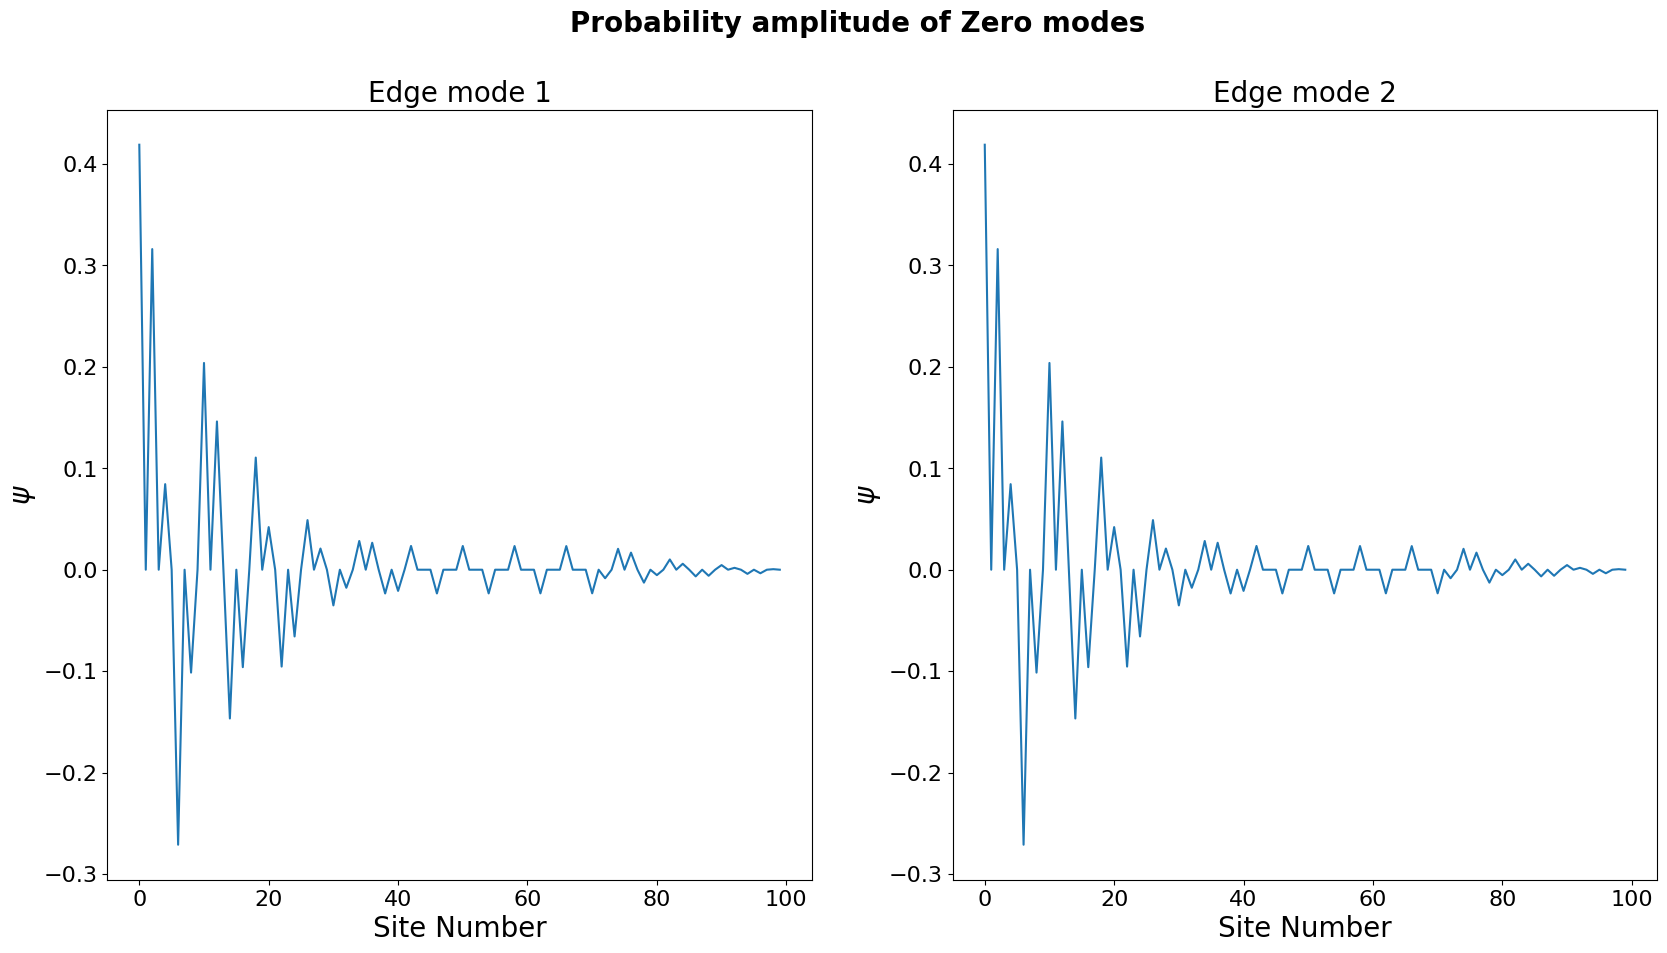

In [162]:
plot_zeromodes(evals2_3_8,evecs2_3_8,params2_3_8, e_threshold_3)

<>:8: SyntaxWarning: invalid escape sequence '\p'
<>:8: SyntaxWarning: invalid escape sequence '\p'
C:\Users\gupt1\AppData\Local\Temp\ipykernel_37676\1892873196.py:8: SyntaxWarning: invalid escape sequence '\p'
  ax1.set_ylabel('$|\psi|^2$',fontsize=22)


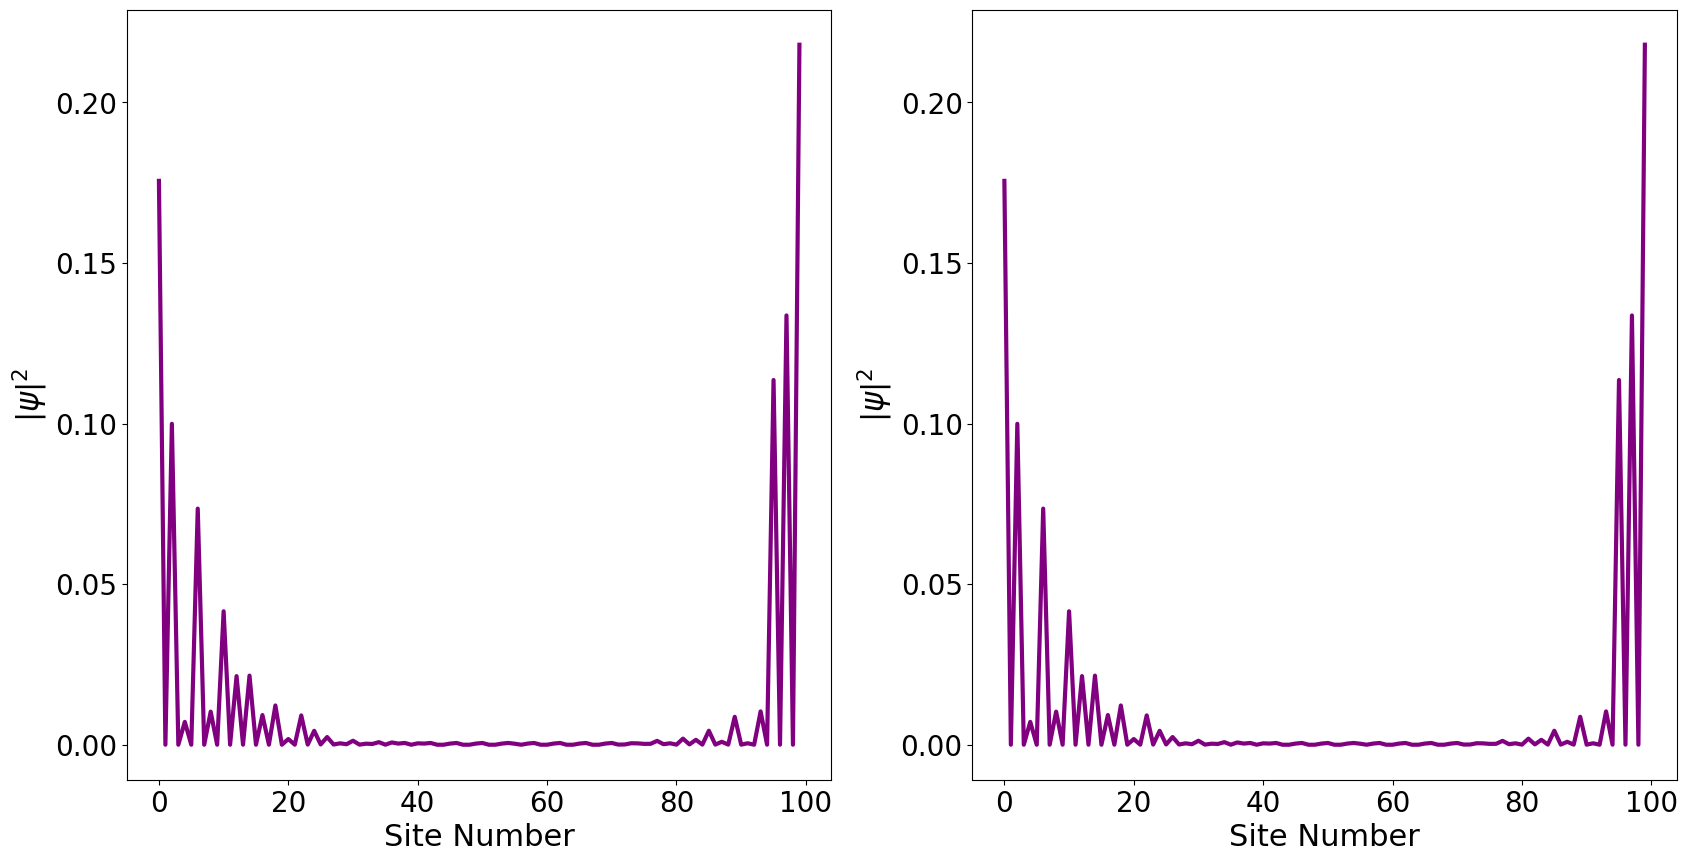

In [163]:
zmodes_ind_3,cnt_zmodes_3 = check_zeromodes(evals2_3_8, e_threshold_3)
if cnt_zmodes_3 > 0:
    fig,ax = plt.subplots(1,cnt_zmodes_3,figsize=(20, 10))
    for cnt in range(cnt_zmodes_3):
        ax1 = ax[cnt]
        ax1.plot(np.abs(evecs2_3_8[:,zmodes_ind_3[cnt]])**2,lw=3,color='purple')
        ax1.set_xlabel('Site Number',fontsize=22)
        ax1.set_ylabel('$|\psi|^2$',fontsize=22)
        # ax1.set_ylim(0,0.08)
        # ax1.text(0.43, 0.95, '$h=%.2f$' % (params['h']), transform=ax1.transAxes, fontsize=20,
        # verticalalignment='top', bbox=dict(boxstyle="square",facecolor="white"))
        ax1.tick_params(axis='both', which='major', labelsize=20)

    plt.show()